# ADA project: a good developmental index to choose how to live in the USA

## Milestone 2: cleaning all the obtained datasets

In [1]:
#We import our packages
import pandas as pd
import numpy as np
import re
from matplotlib.ticker import MaxNLocator
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the first dataset: Life expectancy at birth
We use the first csv dataset to calculate the **life expectancy** at birth in each state of USA in 2015.
We will need to clean our dataset in order to extract, from data related to the different counties, the *average life expectancy* in each state of US.

In [2]:
#We load our dataset
life_expectancy_original = pd.read_csv("Data/U.S._Life_Expectancy_at_Birth_by_State_and_Census_Tract_-_2010-2015.csv")
life_expectancy_original.head()

State          County  Census Tract Number  Life Expectancy  \
0  Alabama  Autauga County                201.0             73.1   
1  Alabama  Autauga County                202.0             76.9   
2  Alabama  Autauga County                204.0             75.4   
3  Alabama  Autauga County                205.0             79.4   
4  Alabama  Autauga County                206.0             73.1   

  Life Expectancy Range  Life Expectancy Standard Error  
0           56.3 - 75.0                          2.2348  
1           75.1 - 77.4                          3.3453  
2           75.1 - 77.4                          1.0216  
3           77.5 - 79.4                          1.1768  
4           56.3 - 75.0                          1.5519

In [3]:
# Just a random element which has some NaN values.
life_expectancy_original.iloc[73108]

State                                 Wyoming
County                                    NaN
Census Tract Number                       NaN
Life Expectancy                          78.8
Life Expectancy Range             77.5 - 79.4
Life Expectancy Standard Error         0.0996
Name: 73108, dtype: object

We can notice how some values are missing. 
We have different situations in different rows:
1. The data for County and Census Tract are present, but not the data about life expectancy.
In this case, the problem could be linked to missing data in collecting them in different Census Tracts. We decide to ignore these data, dropping them so that they will not affect our analysis.
2. The data for County are present, with relative life expectancy, but not the related Census Tract Number.
Why? We hypotise this data could be the average value of life expectancy per county, but our source do not specify it! In the database description it is only mentioned "the life expectancy per Census Tract", not that it contained further analysis! We decide to drop them and do our analysis without them.
3. The data for State are present, with relative life expectancy, but not the related County and Census Tract Number.
Same as before!
4. Wisconsin and Maine have no data! We will need to consider these missing data!

**Attention!:** in doing this, we are probably introducing some errors, and as we will consider some approximations, if the data 2. and 3. were the hypotised ones, they probably would be more accurate! But we don't know it, so we decide to go further with our analysis and the remaining data.

In [4]:
life_expectancy_original = life_expectancy_original.dropna()
life_expectancy_original.head()

State          County  Census Tract Number  Life Expectancy  \
0  Alabama  Autauga County                201.0             73.1   
1  Alabama  Autauga County                202.0             76.9   
2  Alabama  Autauga County                204.0             75.4   
3  Alabama  Autauga County                205.0             79.4   
4  Alabama  Autauga County                206.0             73.1   

  Life Expectancy Range  Life Expectancy Standard Error  
0           56.3 - 75.0                          2.2348  
1           75.1 - 77.4                          3.3453  
2           75.1 - 77.4                          1.0216  
3           77.5 - 79.4                          1.1768  
4           56.3 - 75.0                          1.5519

In [5]:
life_expectancy_columns = life_expectancy_original[['State','County','Census Tract Number','Life Expectancy']]
life_expectancy_columns.head()
# We drop the column about the Life Expectancy Range, as we need a precise calculation of our value 
# and not a range, while we effectuate our analysis about the average life expectancy, and do not care
# about the standard error for each Census Tract

State          County  Census Tract Number  Life Expectancy
0  Alabama  Autauga County                201.0             73.1
1  Alabama  Autauga County                202.0             76.9
2  Alabama  Autauga County                204.0             75.4
3  Alabama  Autauga County                205.0             79.4
4  Alabama  Autauga County                206.0             73.1

#### What is a census tract? (From https://en.wikipedia.org/wiki/Census_tract)
A *census tract*, census area, census district or meshblock is a geographic region defined for the purpose of taking a census. Sometimes these coincide with the limits of cities, towns or other administrative areas and several tracts commonly exist within a county. In unincorporated areas of the United States these are often arbitrary, except for coinciding with political lines.
Census tracts represent the **smallest territorial entity for which population data are available in many countries**. In the United States, census tracts are subdivided into block groups and census blocks. In Canada they are divided into dissemination areas. In the U.S., census tracts are "designed to be relatively homogeneous units with respect to population characteristics, economic status, and living conditions" and "average about 4,000 inhabitants".

#### How will it be useful for our calculations?
From our dataset, we can see how different counties have different numbers of census tracts.
To calculate our value of life expectancy for each state, we should know how many people are in each census tract, and calculate the weighted average.
But we do not have this information!

*Census tracts generally contain between 1,000 and 8,000 people with an optimum size of 4,000 people. Census tract boundaries are delineated with the intention of being stable over many decades, so they generally follow relatively permanent visible features.* (From https://pitt.libguides.com/uscensus/understandinggeography)
They are made in order to be **more or less all of the same dimension!**
Calculating the average of all the census tract values should not affect that much our analysis!

In [6]:
#We group our data per state
life_expectancy_grouped = life_expectancy_columns.groupby(life_expectancy_columns.State)
life_expectancy_grouped.head()

State          County  Census Tract Number  Life Expectancy
0      Alabama  Autauga County                201.0             73.1
1      Alabama  Autauga County                202.0             76.9
2      Alabama  Autauga County                204.0             75.4
3      Alabama  Autauga County                205.0             79.4
4      Alabama  Autauga County                206.0             73.1
...        ...             ...                  ...              ...
67349  Wyoming   Albany County               9627.0             80.4
67350  Wyoming   Albany County               9628.0             82.0
67351  Wyoming   Albany County               9629.0             81.1
67352  Wyoming   Albany County               9630.0             76.8
67353  Wyoming   Albany County               9631.0             81.0

[245 rows x 4 columns]

In [7]:
#We calculate the mean 
life_expectancy = life_expectancy_grouped.mean()[['Life Expectancy']]
life_expectancy.columns=['Life_Expectancy']
life_expectancy.head()

Life_Expectancy
State                      
Alabama           74.813987
Alaska            78.915541
Arizona           78.364742
Arkansas          75.626900
California        80.231014

We manage to find data about Maine and Winconsin on this site: https://www.worldlifeexpectancy.com/usa/maine-life-expectancy
The data are related to 2014, but they can be compared to the the data about the following year, and are of course still better than a missing data!
We decide to append them to our Dataframe!

In [8]:
df1=pd.DataFrame([{'State': 'Maine', 'Life_Expectancy': 79.19},
                  {'State': 'Wisconsin', 'Life_Expectancy': 79.98}])
df1.set_index('State',inplace=True)
df1

Life_Expectancy
State                     
Maine                79.19
Wisconsin            79.98

In [9]:
life_expectancy = pd.concat([life_expectancy, df1], axis=0)
life_expectancy.head()

Life_Expectancy
State                      
Alabama           74.813987
Alaska            78.915541
Arizona           78.364742
Arkansas          75.626900
California        80.231014

In [10]:
# We reorder the dataframe sorting on the state
life_expectancy = life_expectancy.sort_values('State')
life_expectancy.head()

Life_Expectancy
State                      
Alabama           74.813987
Alaska            78.915541
Arizona           78.364742
Arkansas          75.626900
California        80.231014

We finally have the first information we need: the **life expectancy in every state of USA.**
We plot our obtained data in order to identify outliers and evaluate wheter we need to do something else.

Text(0,0.5,'Number of states')

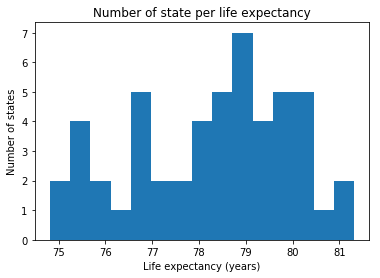

In [11]:
plt.hist(life_expectancy.Life_Expectancy, bins=15)
plt.title("Number of state per life expectancy")
plt.xlabel("Life expectancy (years)")
plt.ylabel("Number of states")

We can see how data seem to be quite homogeneous! Our work seems to be fine!

In [12]:
# We sort our data to see which state is the "Life Expectancy Champion!"
life_expectancy.sort_values('Life_Expectancy', ascending=False).head()

Life_Expectancy
State                         
Hawaii               81.314894
Vermont              81.022286
Minnesota            80.468912
Massachusetts        80.340246
New York             80.326875

In [13]:
# We sort them in ascending order (the first will be the worst)
life_expectancy.sort_values('Life_Expectancy', ascending=True).head()

Life_Expectancy
State                       
Alabama            74.813987
Mississippi        75.026941
Louisiana          75.372675
Tennessee          75.530325
Kentucky           75.564402

**Hawaii  is the life expectancy champion!** We will expect in our final analysis that this state (with other like Vermont or Minnesota) will have high rates when giving importance to the quality of life, while states like Louisiana, Mississippi or Alabama will be less rated.

### Loading the second dataset: Disposable personal income
Our second csv dataset regards the disposable personal income! Let's import it, in order to see how it is structured!

In [14]:
#We load our dataset
income_original = pd.read_csv("Data/personal_income_and_population.csv", sep=',', skiprows=4)
income_original
#We skip the first 4 rows, as they just are a description of what the dataset is about

GeoFips         GeoName  \
0                                                00000  United States*   
1                                                00000  United States*   
2                                                00000  United States*   
3                                                01000         Alabama   
4                                                01000         Alabama   
..                                                 ...             ...   
181  1/ Census Bureau midyear population estimate. ...             NaN   
182  2/ Per capita disposable personal income is to...             NaN   
183  * Alaska and Hawaii are included in the U.S. a...             NaN   
184  Note-- All dollar estimates are in millions of...             NaN   
185  Last updated: September 24, 2019-- revised sta...             NaN   

     LineCode                                        Description         2018  
0        51.0   Disposable personal income (millions of dollars)   15737171.0  
1        52.0                            Population (persons) 1/  327167434.0  
2        53.0  Per capita disposable personal income (dollars...      48101.0  
3        51.0   Disposable personal income (millions of dollars)     186791.1  
4        52.0                            Population (persons) 1/    4887871.0  
..        ...                                                ...          ...  
181       NaN                                                NaN          NaN  
182       NaN                                                NaN          NaN  
183       NaN                                                NaN          NaN  
184       NaN                                                NaN          NaN  
185       NaN                                                NaN          NaN  

[186 rows x 5 columns]

In [15]:
# Also the last 6 rows are just a legend of the dataset! We can drop them!
income_original = income_original.drop([180, 181, 182, 183, 184, 185])
income_original.head()

GeoFips         GeoName  LineCode  \
0   00000  United States*      51.0   
1   00000  United States*      52.0   
2   00000  United States*      53.0   
3   01000         Alabama      51.0   
4   01000         Alabama      52.0   

                                         Description         2018  
0   Disposable personal income (millions of dollars)   15737171.0  
1                            Population (persons) 1/  327167434.0  
2  Per capita disposable personal income (dollars...      48101.0  
3   Disposable personal income (millions of dollars)     186791.1  
4                            Population (persons) 1/    4887871.0

Our dataset is a **long dataframe** where each geographic region has 3 values:
1. Disposable personal income (millions of dollars) --> LineCode==51.0
2. Population --> LineCode==52.0
3. Per capita personal income (dollars) --> LineCode==53.0

We are interested in the *per capita personal income*, that is to say an individual's total earnings from wages, investment enterprises, and other ventures. We could describe it as the money every person disposes for its necessities.
However, the population of each state could probably be really useful for our analysis in the further stages of it.
We want to build a **large dataframe** where every geographic region involved has 2 parameters: Per capita personal income and population.

In [16]:
# We create a DataFrame for the personal income
personal_income = income_original[[x == 53.0 for x in income_original.LineCode]]

#We keep of this DataFrame just the informations we need, rename the columns and set the state as the index
personal_income = personal_income[['GeoName','2018']]
personal_income.columns = ['State','Per_capita_income']
personal_income.set_index('State', inplace=True)
personal_income.head()

Per_capita_income
State                            
United States*            48101.0
Alabama                   38215.0
Alaska*                   54430.0
Arizona                   39955.0
Arkansas                  39171.0

In [17]:
# We do the same for the population!
population=income_original[[x==52.0 for x in income_original.LineCode]]
population=population[['GeoName','2018']]
population.columns=['State','Population']
population.set_index('State', inplace=True)
population.head()

Population
State                      
United States*  327167434.0
Alabama           4887871.0
Alaska*            737438.0
Arizona           7171646.0
Arkansas          3013825.0

#### We have now 3 DataFrame
1. **life_expectancy**
2. **personal_income**
3. **population**

All the 3 have "State" as index!
But we can notice that in the last 2 we have more geographical areas than the needed States!
Moreover, some of these geographical areas have an asterisk at the end of the name!
1. We need to solve the second problem
2. When solved, we can just perform an inner join between the first dataset and the following 2 in order to have just the States we need! In fact, life_expectancy just have our States!

In [18]:
# We start merging population and personal_income that have the same index
pop_inc = pd.merge(population, personal_income, left_index=True, right_index=True)
pop_inc.head()

Population  Per_capita_income
State                                         
United States*  327167434.0            48101.0
Alabama           4887871.0            38215.0
Alaska*            737438.0            54430.0
Arizona           7171646.0            39955.0
Arkansas          3013825.0            39171.0

In [19]:
# We remove the star character at the end of the names that have it.
pop_inc_c = pop_inc.copy()  # First we reset the index
pop_inc_c.reset_index(inplace=True)
for i, row in pop_inc_c.iterrows():
    if pop_inc_c.State[i].endswith('*'):  # if the state ends with *
        pop_inc_c.loc[i, "State"] = pop_inc_c.State[i].split("*")[0:-1]  # we just don't consider the asterisk
pop_inc = pop_inc_c 
pop_inc.head()

State   Population  Per_capita_income
0  United States  327167434.0            48101.0
1        Alabama    4887871.0            38215.0
2         Alaska     737438.0            54430.0
3        Arizona    7171646.0            39955.0
4       Arkansas    3013825.0            39171.0

In [20]:
pop_inc.set_index('State', inplace=True)  # We reset the index to the states

# We merge the pop_inc and the life_expectancy dataset, on the index (State) column
pop_inc_exp = pd.merge(pop_inc, life_expectancy, left_index=True, right_index=True) 
pop_inc_exp.head()

Population  Per_capita_income  Life_Expectancy
State                                                     
Alabama      4887871.0            38215.0        74.813987
Alaska        737438.0            54430.0        78.915541
Arizona      7171646.0            39955.0        78.364742
Arkansas     3013825.0            39171.0        75.626900
California  39557045.0            54800.0        80.231014

In [21]:
# Let's see how the personal income goes!
pop_inc_exp.sort_values('Per_capita_income', ascending=False).head()

Population  Per_capita_income  Life_Expectancy
State                                                               
District of Columbia    702455.0            70167.0        76.407879
Connecticut            3572665.0            65063.0        80.101405
Massachusetts          6902149.0            61147.0        80.340246
New Jersey             8908520.0            59180.0        79.590645
New York              19542209.0            58005.0        80.326875

In [22]:
# And the worst ones.
pop_inc_exp.sort_values('Per_capita_income', ascending=True).head()

Population  Per_capita_income  Life_Expectancy
State                                                        
Mississippi     2986530.0            34752.0        75.026941
West Virginia   1805832.0            37061.0        75.691006
New Mexico      2095428.0            38068.0        78.546753
Kentucky        4468402.0            38075.0        75.564402
Alabama         4887871.0            38215.0        74.813987

Text(0,0.5,'Number of states')

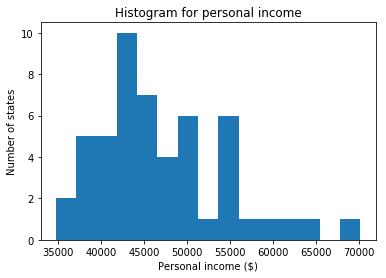

In [23]:
plt.hist(pop_inc_exp.Per_capita_income, bins=15)
plt.title("Histogram for personal income")
plt.xlabel("Personal income ($)")
plt.ylabel("Number of states")

Mississippi seems to be a again one of the worst places in US to leave, but incomes are low also in West Virginia and New Mexico. D.C., Connecticut and Massachussets are the best ranked states per personal income!

pop_inc_exp is our actual DataFrame containing information from the first 2 csv datasets. Now we need to continue adding other data. The next datasets regard the level of education of each state!

### Loading other three dataset: education field

#### First dataset: colleges and universities

The colleges and university dataset is composed of all Post Secondary Education facilities as defined by the **Integrated Post Secondary Education System (IPEDS)**, National Center for Education Statistics, US Department of Education. Included are Doctoral/Research Universities, Masters Colleges and Universities, Baccalaureate Colleges, Associates Colleges, Theological seminaries, Medical Schools and other health care professions, Schools of engineering and technology, business and management, art, music, design, Law schools, Teachers colleges, Tribal colleges, and other specialized institutions.

In [24]:
#We load our dataset
colleges_universities_or = pd.read_csv("Data/Colleges_and_Universities.csv")
colleges_universities_or.head()

X          Y  OBJECTID  IPEDSID  \
0 -115.210504  36.158505      7001   181880   
1 -115.046158  36.037585      7002   182148   
2  -75.909212  42.135320      7003   189547   
3  -78.180099  42.997351      7004   190309   
4  -77.073708  42.117240      7005   190442   

                                           NAME  \
0              ACADEMY OF HAIR DESIGN-LAS VEGAS   
1             ALTIERUS CAREER COLLEGE-HENDERSON   
2                 SUNY BROOME COMMUNITY COLLEGE   
3  CONTINENTAL SCHOOL OF BEAUTY CULTURE-BATAVIA   
4                     CORNING COMMUNITY COLLEGE   

                         ADDRESS        CITY STATE    ZIP           ZIP4  ...  \
0       5191 W. CHARLESTON, #150   LAS VEGAS    NV  89146  NOT AVAILABLE  ...   
1  170 NORTH STEPHAINE SUITE 145   HENDERSON    NV  89074           8811  ...   
2             907 UPPER FRONT ST  BINGHAMTON    NY  13905  NOT AVAILABLE  ...   
3                 215 E. MAIN ST     BATAVIA    NY  14020  NOT AVAILABLE  ...   
4                  1 ACADEMIC DR     CORNING    NY  14830  NOT AVAILABLE  ...   

           ALIAS  SIZE_SET INST_SIZE  PT_ENROLL FT_ENROLL TOT_ENROLL HOUSING  \
0  NOT AVAILABLE        -2         1       -999       239        239       2   
1  NOT AVAILABLE         2         1        100       172        272       2   
2  NOT AVAILABLE         3         3       1549      4075       5624       1   
3  NOT AVAILABLE        -2         1       -999        26         26       2   
4  NOT AVAILABLE         3         2       1997      1837       3834       1   

   DORM_CAP  TOT_EMP     SHELTER_ID  
0      -999       23  NOT AVAILABLE  
1      -999       26  NOT AVAILABLE  
2       360      819  NOT AVAILABLE  
3      -999        3  NOT AVAILABLE  
4       270      384  NOT AVAILABLE  

[5 rows x 45 columns]

This dataset contains tons of data about educational institutions of USA. What can we extract form it?

- Name of each institution
- State
- NAICS code and description of each institution: in particular we have different codes!

We can extract, for each state and each type of institution, the number of institutions!

In [25]:
colleges_universities_columns = colleges_universities_or[['NAME','STATE','NAICS_CODE','NAICS_DESC']]
colleges_universities_columns.head()

NAME STATE  NAICS_CODE  \
0              ACADEMY OF HAIR DESIGN-LAS VEGAS    NV      611511   
1             ALTIERUS CAREER COLLEGE-HENDERSON    NV      611210   
2                 SUNY BROOME COMMUNITY COLLEGE    NY      611210   
3  CONTINENTAL SCHOOL OF BEAUTY CULTURE-BATAVIA    NY      611511   
4                     CORNING COMMUNITY COLLEGE    NY      611210   

                       NAICS_DESC  
0  COSMETOLOGY AND BARBER SCHOOLS  
1                 JUNIOR COLLEGES  
2                 JUNIOR COLLEGES  
3  COSMETOLOGY AND BARBER SCHOOLS  
4                 JUNIOR COLLEGES

We can see different NAICS code for different institutions; in particular we have:

- 611310: colleges, universities and professional schools
- 611210: junior colleges
- 611511/611519: cosmetology, technical, trade schools

In [26]:
# We calculate how many colleges, universities and professional schools are there in each state
colleges_universities_grouped = colleges_universities_columns[[x == 611310 for x in colleges_universities_columns.NAICS_CODE]].groupby('STATE')
colleges_universities = colleges_universities_grouped.count()[['NAME']]
colleges_universities.columns = ['N_of_colleges_universities']
colleges_universities.head()

N_of_colleges_universities
STATE                            
AK                              6
AL                             42
AR                             26
AZ                             46
CA                            264

In [27]:
# We do the same for junior colleges...
junior_colleges_grouped = colleges_universities_columns[[x == 611210 for x in colleges_universities_columns.NAICS_CODE]].groupby('STATE')
junior_colleges = junior_colleges_grouped.count()[['NAME']]
junior_colleges.columns = ['N_of_junior_colleges']
junior_colleges.head()

N_of_junior_colleges
STATE                      
AK                        1
AL                       36
AR                       26
AS                        1
AZ                       43

In [28]:
#... and trade and technical schools
technical_schools_grouped = colleges_universities_columns[
    [x == 611511 or x == 611519 for x in colleges_universities_columns.NAICS_CODE]
].groupby('STATE')
technical_schools = technical_schools_grouped.count()[['NAME']]
technical_schools.columns = ['N_of_technical_trade_schools']
technical_schools.head()

N_of_technical_trade_schools
STATE                              
AK                                2
AL                               16
AR                               32
AZ                               42
CA                              239

In [29]:
# Now we merge the obtained informations
number_of_institutions1 = pd.merge(colleges_universities, junior_colleges, left_index=True, right_index=True, how='outer')
number_of_institutions = pd.merge(number_of_institutions1, technical_schools, left_index=True, right_index=True, how='outer')
number_of_institutions.head()

N_of_colleges_universities  N_of_junior_colleges  \
STATE                                                     
AK                            6.0                   1.0   
AL                           42.0                  36.0   
AR                           26.0                  26.0   
AS                            NaN                   1.0   
AZ                           46.0                  43.0   

       N_of_technical_trade_schools  
STATE                                
AK                              2.0  
AL                             16.0  
AR                             32.0  
AS                              NaN  
AZ                             42.0

In [30]:
# The NaN are present if there is no count of that kind of school in that state! We need to
# substitute them with 0
number_of_institutions = number_of_institutions.fillna(0)
number_of_institutions.head()

N_of_colleges_universities  N_of_junior_colleges  \
STATE                                                     
AK                            6.0                   1.0   
AL                           42.0                  36.0   
AR                           26.0                  26.0   
AS                            0.0                   1.0   
AZ                           46.0                  43.0   

       N_of_technical_trade_schools  
STATE                                
AK                              2.0  
AL                             16.0  
AR                             32.0  
AS                              0.0  
AZ                             42.0

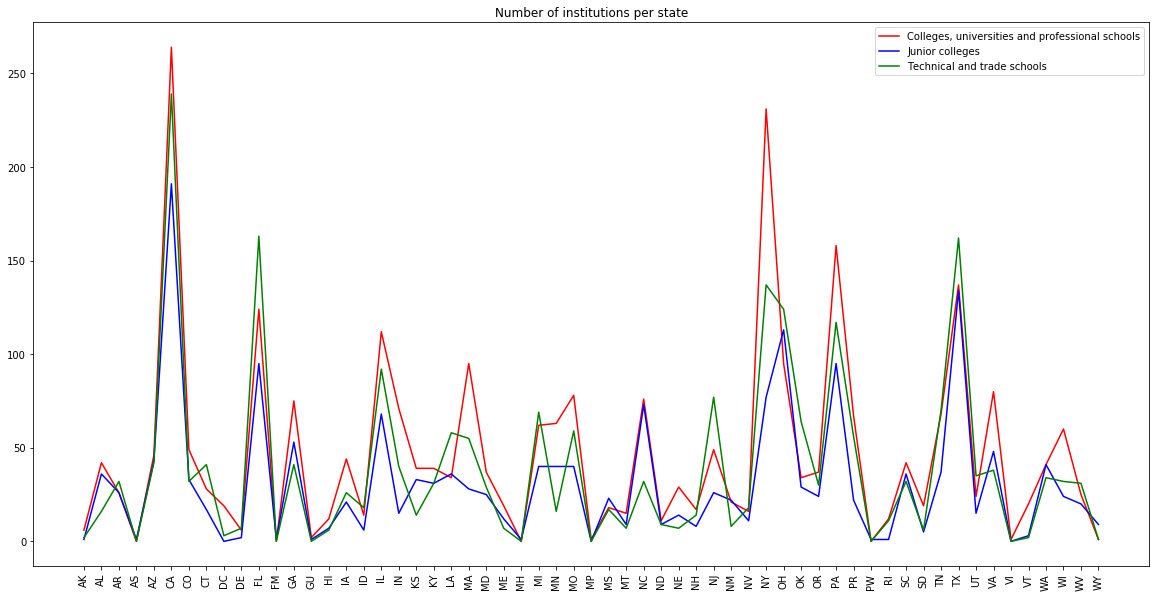

In [31]:
# We plot the informations obtained
plt.figure(figsize=(20,10))
plt.xticks(rotation='vertical')
plt.title("Number of institutions per state")
plt.plot(number_of_institutions.index, number_of_institutions.N_of_colleges_universities, 'r') 
plt.plot(number_of_institutions.index, number_of_institutions.N_of_junior_colleges, 'b') 
plt.plot(number_of_institutions.index, number_of_institutions.N_of_technical_trade_schools, 'g') 
plt.gca().legend(('Colleges, universities and professional schools', 'Junior colleges', 'Technical and trade schools'))

#### Second dataset: colleges and universities' details

The second dataset we have gives us a deep insight of colleges and universities!
In this dataset we have lots of informations about the listed institutions!
Let's see what we can obtain from it!

In [32]:
institutions_or = pd.read_excel("Data/cc_institution_details.xlsx", skiprows=1)
institutions_or.head()

unitid                            chronname        city    state   level  \
0  100654               Alabama A&M University      Normal  Alabama  4-year   
1  100663  University of Alabama at Birmingham  Birmingham  Alabama  4-year   
2  100690                   Amridge University  Montgomery  Alabama  4-year   
3  100706  University of Alabama at Huntsville  Huntsville  Alabama  4-year   
4  100724             Alabama State University  Montgomery  Alabama  4-year   

                  control                                              basic  \
0                  Public  Masters Colleges and Universities--larger prog...   
1                  Public  Research Universities--very high research acti...   
2  Private not-for-profit            Baccalaureate Colleges--Arts & Sciences   
3                  Public  Research Universities--very high research acti...   
4                  Public  Masters Colleges and Universities--larger prog...   

  hbcu flagship     long_x  ...  vsa_grad_after6_transfer  \
0    X      NaN -86.568502  ...                      36.4   
1  NaN      NaN -86.809170  ...                       NaN   
2  NaN      NaN -86.174010  ...                       NaN   
3  NaN      NaN -86.638420  ...                       0.0   
4    X      NaN -86.295677  ...                       NaN   

  vsa_grad_elsewhere_after6_transfer  vsa_enroll_after6_transfer  \
0                                5.6                        17.2   
1                                NaN                         NaN   
2                                NaN                         NaN   
3                                0.0                         0.0   
4                                NaN                         NaN   

   vsa_enroll_elsewhere_after6_transfer  \
0                                  11.1   
1                                   NaN   
2                                   NaN   
3                                   0.0   
4                                   NaN   

                                             similar  state_sector_ct  \
0  232937|100724|405997|113607|139533|144005|2285...               13   
1  196060|180461|201885|145600|209542|236939|1268...               13   
2  217925|441511|205124|247825|197647|221856|1353...               16   
3  232186|133881|196103|196413|207388|171128|1900...               13   
4  100654|232937|242617|243197|144005|241739|2354...               13   

   carnegie_ct  counted_pct  nicknames  cohort_size  
0          386      99.7|07        NaN        882.0  
1          106      56.0|07        UAB       1376.0  
2          252     100.0|07        NaN          3.0  
3          106      43.1|07        UAH        759.0  
4          386      88.0|07        ASU       1351.0  

[5 rows x 62 columns]

We can see some columns that collect "efficiency measures", as reported by the dataset description.

**Awards per 100 full-time undergraduate students** includes all undergraduate-level completions reported by the institution to the NCES: bachelor’s degrees, associate degrees, and certificate programs of less than four years in length. Full-time-equivalent undergraduates are estimated from the number of credit hours taken at the institution in an academic year. To account for changes in enrollment, the resulting metric is a three-year average of data from 2011, 2012, and 2013.

**Expenditure categories** are slightly different depending on whether the institution is public, private non-profit, or private for-profit. The spending types considered to be educational in nature, either directly or indirectly, are: instruction, research, public service, student services, academic support, institutional support, operations, and maintenance. Because separate spending figures are not available for only undergraduate students, the measure includes graduate degrees, post-master’s certificates, and all doctorates.

Let's use these measures to evaluate the level of the universities of each state!

In [33]:
institutions_columns = institutions_or[['chronname', 'state', 'awards_per_value', 'exp_award_value']]
institutions_columns.head()

chronname    state  awards_per_value  \
0               Alabama A&M University  Alabama              14.2   
1  University of Alabama at Birmingham  Alabama              20.9   
2                   Amridge University  Alabama              29.9   
3  University of Alabama at Huntsville  Alabama              20.9   
4             Alabama State University  Alabama              11.6   

   exp_award_value  
0           105331  
1           136546  
2            58414  
3            64418  
4           132407

We can now calculate, for each state, the mean of these two values.
States with a better level of education should have both indexes high, in fact:
- high award index underlines the efficiency of each institution to lead its students to a successful completion of the studies;
- high expenditure levels mean (or at least should mean) a higher level of the listed educational services!

In [34]:
institutions_grouped = institutions_columns.groupby('state')
institutions_levels = institutions_grouped.mean()[['awards_per_value','exp_award_value']]
institutions_levels.head()

awards_per_value  exp_award_value
state                                        
Alabama            19.514493     63013.173913
Alaska             18.414286    141431.142857
Arizona            25.563492     47830.888889
Arkansas           21.970833     51132.479167
California         22.771429     63022.202857

Text(0,0.5,'awards per 100 full time students')

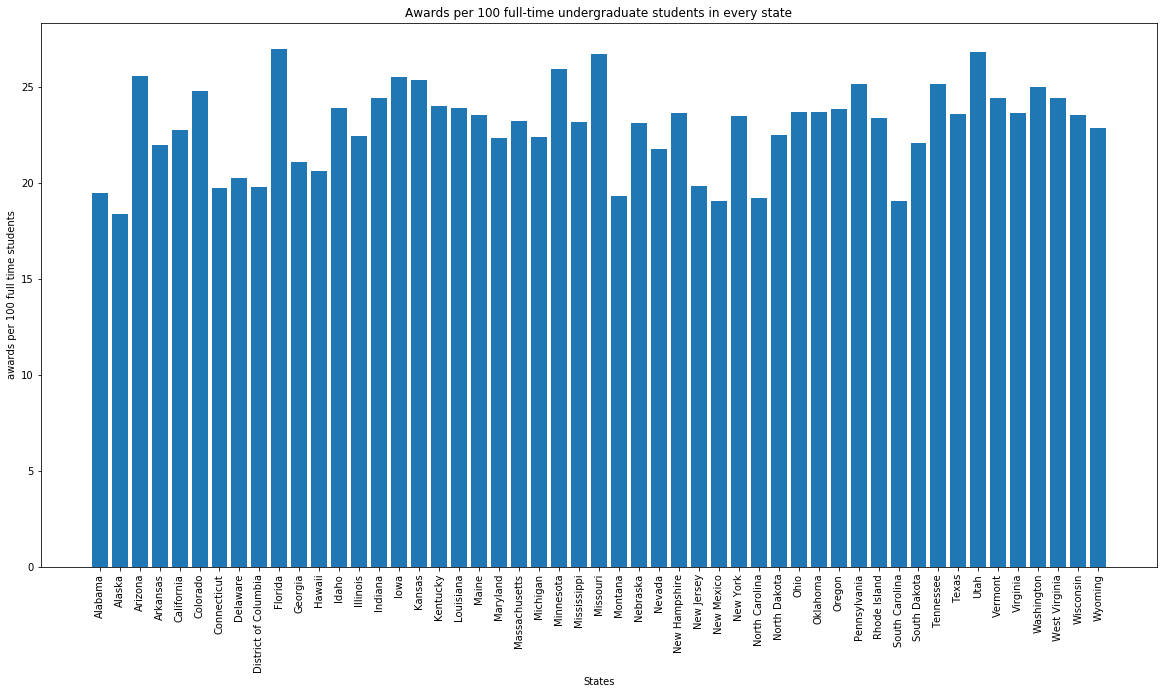

In [35]:
#We plot the informations obtained
plt.figure(figsize=(20,10))
plt.xticks(rotation='vertical')
plt.title("Awards per 100 full-time undergraduate students in every state")
plt.bar(institutions_levels.index, institutions_levels.awards_per_value)
plt.xlabel("States")
plt.ylabel("awards per 100 full time students")

Text(0,0.5,'Expenditure ($) per each award')

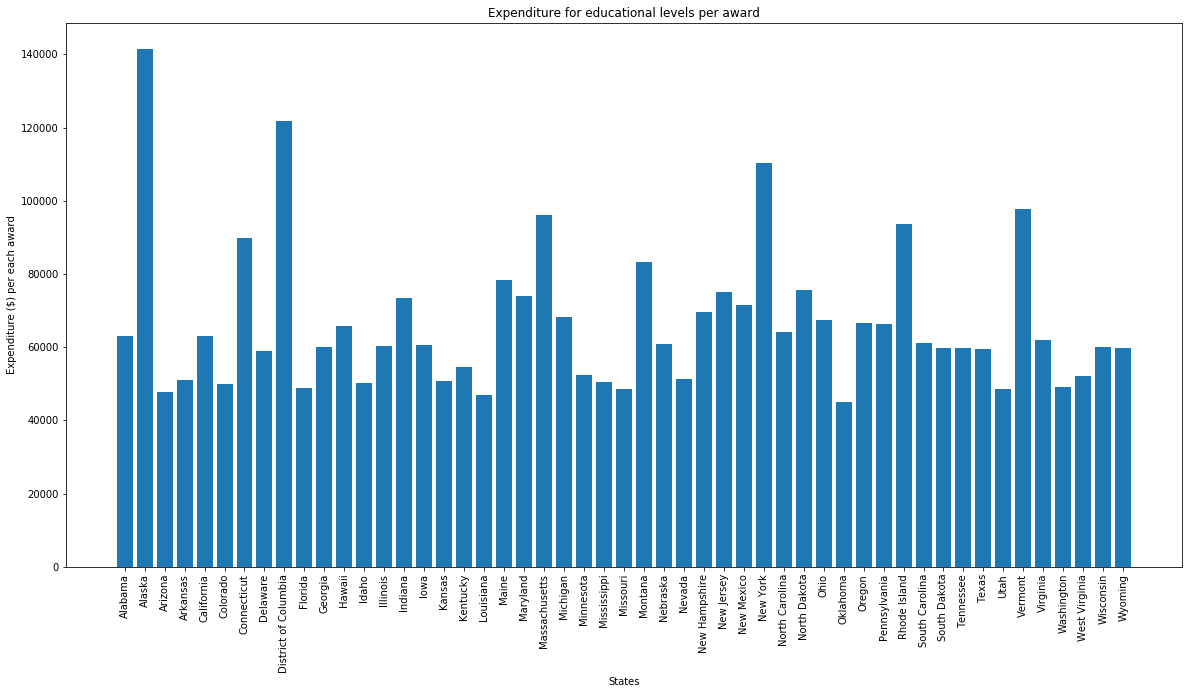

In [36]:
plt.figure(figsize=(20,10))
plt.xticks(rotation='vertical')
plt.bar(institutions_levels.index, institutions_levels.exp_award_value)
plt.title(('Expenditure for educational levels per award'))
plt.xlabel("States")
plt.ylabel("Expenditure ($) per each award")

#### Third dataset: university ranking

Our third dataset reports the first 230 universities in US. Let's take a look!

In [37]:
univ_ranking_or = pd.read_excel("Data/National_University_Ranking.xlsx", skiprows=1)
univ_ranking_or.head()

Name       Location  Rank  \
0   Princeton University  Princeton, NJ     1   
1     Harvard University  Cambridge, MA     2   
2  University of Chicago    Chicago, IL     3   
3        Yale University  New Haven, CT     3   
4    Columbia University   New York, NY     5   

                                         Description Tuition and fees  \
0  Princeton, the fourth-oldest college in the Un...          $45,320   
1  Harvard is located in Cambridge, Massachusetts...          $47,074   
2  The University of Chicago, situated in Chicago...          $52,491   
3  Yale University, located in New Haven, Connect...          $49,480   
4  Columbia University, located in Manhattan's Mo...          $55,056   

  In-state  Undergrad Enrollment  
0      NaN                 5.402  
1      NaN                 6.699  
2      NaN                 5.844  
3      NaN                 5.532  
4      NaN                 6.102

We can use this dataset to calculate how many top universities are there in each state, and how high are they ranked.
For example, we could attribute the highest value to the best ranked university and so on!
Let's process our dataset to evaluate this!

In [38]:
# We use just the columns we need
univ_ranking_columns = univ_ranking_or[['Name', 'Location', 'Rank']]
univ_ranking_columns.head()

Name       Location  Rank
0   Princeton University  Princeton, NJ     1
1     Harvard University  Cambridge, MA     2
2  University of Chicago    Chicago, IL     3
3        Yale University  New Haven, CT     3
4    Columbia University   New York, NY     5

In [39]:
#We explode the "Location" column to calculate the state
univ_state = pd.Series([])
univ_state_col = univ_ranking_columns.Location
for i in range(0, 231):
    univ_state[i] = univ_state_col[i][-2:]
univ_state.name = ('State')
univ_state.head()

0    NJ
1    MA
2    IL
3    CT
4    NY
Name: State, dtype: object

In [40]:
#Now we add the column to the dataframe
ranking_columns_xy = univ_ranking_columns.merge(univ_state, left_index=True, right_index=True)
ranking_columns_xy.head()

Name       Location  Rank State
0   Princeton University  Princeton, NJ     1    NJ
1     Harvard University  Cambridge, MA     2    MA
2  University of Chicago    Chicago, IL     3    IL
3        Yale University  New Haven, CT     3    CT
4    Columbia University   New York, NY     5    NY

In [41]:
# We use the right column and rename it, and leave the Tuition_and_fees column without the dollar sign
ranking_columns_state = ranking_columns_xy[['State', 'Name', 'Rank']]
ranking_columns_state.head()

State                   Name  Rank
0    NJ   Princeton University     1
1    MA     Harvard University     2
2    IL  University of Chicago     3
3    CT        Yale University     3
4    NY    Columbia University     5

In [42]:
# We calculate a column with a "ranking value": as the ranked universities are 230, we can calculate
# the points for each university in the following way
ranking_point = pd.Series([])
for i in range(0,231):
    # We assign a higher score to universities which are higher in the standings.
    ranking_point[i] = (231 - ranking_columns_state.Rank[i])  
ranking_point.name = 'Ranking_points'
ranking_point

0      230
1      229
2      228
3      228
4      226
      ... 
226     11
227     11
228     11
229     11
230     11
Name: Ranking_points, Length: 231, dtype: int64

In [43]:
# Now we add the column to the dataframe
ranking_columns = ranking_columns_state.merge(ranking_point, left_index=True, right_index=True)
ranking_columns.head()

State                   Name  Rank  Ranking_points
0    NJ   Princeton University     1             230
1    MA     Harvard University     2             229
2    IL  University of Chicago     3             228
3    CT        Yale University     3             228
4    NY    Columbia University     5             226

At this point, we can calculate for each state:
- **top_230_state_score**: for each state, cumulative ranking points, so that we take into how account how many top universities are there in each state, and how "top" they are.

In [44]:
# We group our data by State
ranking_grouped = ranking_columns.groupby('State')

In [45]:
#We calculate the top_230_ranking_score
ranking_score = ranking_grouped.sum()[['Ranking_points']]  # We sum the scores related to the same states.
ranking_score.columns = ['top_230_ranking_score']
ranking_score.head()

top_230_ranking_score
State                       
AK                        29
AL                       366
AR                        96
AZ                       209
CA                      3064

Text(0,0.5,'Top 230 score')

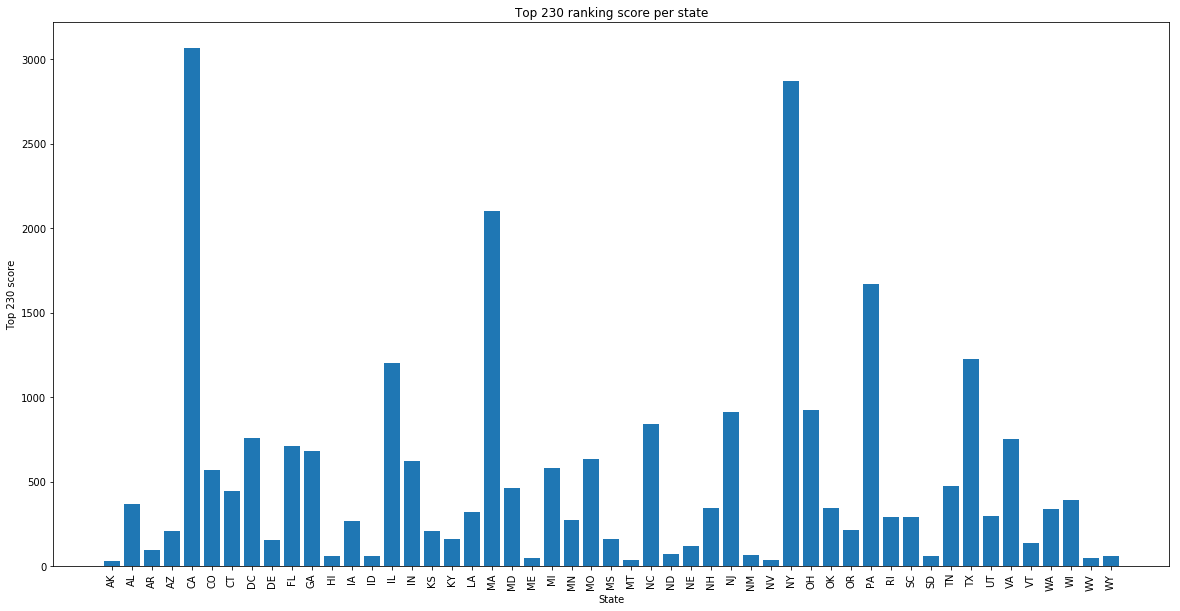

In [46]:
#We plot our result
plt.figure(figsize=(20,10))
plt.xticks(rotation='vertical')
plt.bar(ranking_score.index, ranking_score.top_230_ranking_score)
plt.title(('Top 230 ranking score per state'))
plt.xlabel("State")
plt.ylabel("Top 230 score")

Now we have 3 dataset about education:
- number_of_institutions
- institutions_levels
- ranking_score
We can merge it in order to obtain a final dataset about education!

But there is a problem!
- number_of_institutions and ranking_score have the state as a code
- institutions_level has the full name of the state!

In [47]:
# We import the csv that collects states and abbreviation
abbreviation = pd.read_csv("Data/state-abbrevs.csv")
abbreviation.head()

state abbreviation
0     Alabama           AL
1      Alaska           AK
2     Arizona           AZ
3    Arkansas           AR
4  California           CA

In [48]:
# We merge this dataframe with the institutions_level one
education1 = institutions_levels.merge(abbreviation, left_index=True, right_on=abbreviation.state, how='inner')
education2 = education1.pop('key_0')  # We pop the 'key_0' column
education1.head()

awards_per_value  exp_award_value       state abbreviation
0         19.514493     63013.173913     Alabama           AL
1         18.414286    141431.142857      Alaska           AK
2         25.563492     47830.888889     Arizona           AZ
3         21.970833     51132.479167    Arkansas           AR
4         22.771429     63022.202857  California           CA

In [49]:
# Now we merge the other 2 dataframes
education3 = education1.merge(number_of_institutions, left_on=education1.abbreviation, right_index=True)
education4 = education3.pop('key_0')  # We pop the 'key_0' column
education3.head()

awards_per_value  exp_award_value       state abbreviation  \
0         19.514493     63013.173913     Alabama           AL   
1         18.414286    141431.142857      Alaska           AK   
2         25.563492     47830.888889     Arizona           AZ   
3         21.970833     51132.479167    Arkansas           AR   
4         22.771429     63022.202857  California           CA   

   N_of_colleges_universities  N_of_junior_colleges  \
0                        42.0                  36.0   
1                         6.0                   1.0   
2                        46.0                  43.0   
3                        26.0                  26.0   
4                       264.0                 191.0   

   N_of_technical_trade_schools  
0                          16.0  
1                           2.0  
2                          42.0  
3                          32.0  
4                         239.0

In [50]:
education5 = education3.merge(ranking_score, left_on=education3.abbreviation, right_index=True)
education6 = education5.pop('key_0')
education5.head()

awards_per_value  exp_award_value       state abbreviation  \
0         19.514493     63013.173913     Alabama           AL   
1         18.414286    141431.142857      Alaska           AK   
2         25.563492     47830.888889     Arizona           AZ   
3         21.970833     51132.479167    Arkansas           AR   
4         22.771429     63022.202857  California           CA   

   N_of_colleges_universities  N_of_junior_colleges  \
0                        42.0                  36.0   
1                         6.0                   1.0   
2                        46.0                  43.0   
3                        26.0                  26.0   
4                       264.0                 191.0   

   N_of_technical_trade_schools  top_230_ranking_score  
0                          16.0                    366  
1                           2.0                     29  
2                          42.0                    209  
3                          32.0                     96  
4                         239.0                   3064

In [51]:
# We select only the important features (not the abbreviations)
education = education5[['state', 'N_of_colleges_universities', 'N_of_junior_colleges', 'N_of_technical_trade_schools',
                      'awards_per_value', 'exp_award_value', 'top_230_ranking_score']]
education.head()

state  N_of_colleges_universities  N_of_junior_colleges  \
0     Alabama                        42.0                  36.0   
1      Alaska                         6.0                   1.0   
2     Arizona                        46.0                  43.0   
3    Arkansas                        26.0                  26.0   
4  California                       264.0                 191.0   

   N_of_technical_trade_schools  awards_per_value  exp_award_value  \
0                          16.0         19.514493     63013.173913   
1                           2.0         18.414286    141431.142857   
2                          42.0         25.563492     47830.888889   
3                          32.0         21.970833     51132.479167   
4                         239.0         22.771429     63022.202857   

   top_230_ranking_score  
0                    366  
1                     29  
2                    209  
3                     96  
4                   3064

In [52]:
education.set_index('state',inplace=True)
education.head()

N_of_colleges_universities  N_of_junior_colleges  \
state                                                          
Alabama                           42.0                  36.0   
Alaska                             6.0                   1.0   
Arizona                           46.0                  43.0   
Arkansas                          26.0                  26.0   
California                       264.0                 191.0   

            N_of_technical_trade_schools  awards_per_value  exp_award_value  \
state                                                                         
Alabama                             16.0         19.514493     63013.173913   
Alaska                               2.0         18.414286    141431.142857   
Arizona                             42.0         25.563492     47830.888889   
Arkansas                            32.0         21.970833     51132.479167   
California                         239.0         22.771429     63022.202857   

            top_230_ranking_score  
state                              
Alabama                       366  
Alaska                         29  
Arizona                       209  
Arkansas                       96  
California                   3064

In [53]:
# We can finally merge our dataset about education with the one about life expectancy and income
pop_inc_exp_edu = pop_inc_exp.merge(education, left_index=True, right_index=True)
pop_inc_exp_edu.head()

Population  Per_capita_income  Life_Expectancy  \
State                                                        
Alabama      4887871.0            38215.0        74.813987   
Alaska        737438.0            54430.0        78.915541   
Arizona      7171646.0            39955.0        78.364742   
Arkansas     3013825.0            39171.0        75.626900   
California  39557045.0            54800.0        80.231014   

            N_of_colleges_universities  N_of_junior_colleges  \
State                                                          
Alabama                           42.0                  36.0   
Alaska                             6.0                   1.0   
Arizona                           46.0                  43.0   
Arkansas                          26.0                  26.0   
California                       264.0                 191.0   

            N_of_technical_trade_schools  awards_per_value  exp_award_value  \
State                                                                         
Alabama                             16.0         19.514493     63013.173913   
Alaska                               2.0         18.414286    141431.142857   
Arizona                             42.0         25.563492     47830.888889   
Arkansas                            32.0         21.970833     51132.479167   
California                         239.0         22.771429     63022.202857   

            top_230_ranking_score  
State                              
Alabama                       366  
Alaska                         29  
Arizona                       209  
Arkansas                       96  
California                   3064

### Save the pickle file
We can finally save the pickle file.

In [54]:
pop_inc_exp_edu.reset_index(inplace=True)  # Convert the index into the column State
pop_inc_exp_edu.to_pickle("Pickles/pop_inc_exp_edu.pickle")

### Crime Dataset
In this section we are going to explore data coming from https://data.world/ucr/crime-in-us-2016-offenses (login is required though).

It is related to all sorts of crimes committed in the United States, with information regarding violent crimes, homicides, robberies, crimes in University campuses and handguns related crimes.

We hope that information regarding crime will be helpful to estimate better our Human Development Index by state. (clearly, the higher the crime ratio, the lower the HDI we expect the country will be able to achieve.)

In [55]:
import pandas as pd
import numpy as np
from matplotlib.ticker import MaxNLocator
import matplotlib.pyplot as plt
import re

In [56]:
# We start by loading the list of states in the USA
# This will come useful when looking for missing values
states_json = pd.read_json('Data/states.json')
states = []

for row in states_json['data']:
    states.append(row['State'])
    
states_df = pd.DataFrame({"State": states})
states_df.head()

State
0     Alabama
1      Alaska
2     Arizona
3    Arkansas
4  California

### Crime in US by state
We start our analysis by loading the dataset Crimes in the US by state
It contains information regarding 
- Murder and  nonnegligent  manslaughter
- Rape (revised definition)
- Rape (legacy definition)
- Robbery
- Aggravated assault
- Property crime
- Burglary
- Larceny- theft
- Motor  vehicle  theft


In [57]:
# Read from excel
crimes_per_state_df = pd.read_excel("Data/crime/Table_3_Crime_in_the_United_States_by_State_2016.xls", skiprows=3)

# get only the columns we are interested in
new_df = crimes_per_state_df[(crimes_per_state_df.State.notnull()) | 
                             (crimes_per_state_df.Area == 'State Total') |
                             (crimes_per_state_df.Area == 'Total') |
                             (crimes_per_state_df['Unnamed: 2'] == 'Rate per 100,000 inhabitants')
                            ].reset_index()

We can see that data is put in a pretty confusional way: every country lies on 3 separated lines, the first line has the name only, the second line has the statistics for the entire country, the third has data scaled per 100k inhabitants.

We therefore need to convert the data into a uniform line.

We start by merging together the first 2 lines for every country.
We keep only the country name for the first line, and for everything else we keep the data in the second line.

In [58]:
# We split the dataset in three different dataframes, that we are going to join together.

# first dataframe is the one with states
states_row_df = crimes_per_state_df[crimes_per_state_df['State'].notnull()].reset_index()

# second dataframe is the one with data per the totality of the state
states_total_df = crimes_per_state_df[(crimes_per_state_df['Area'] == 'State Total') | (crimes_per_state_df['Area'] == 'Total')].reset_index()

# third dataframe is the one with all other lines
states_per_100k_df = crimes_per_state_df[crimes_per_state_df['Unnamed: 2'] == 'Rate per 100,000 inhabitants'].reset_index()

crimes_per_state_merged_df = states_row_df[['State']].merge(states_total_df[['Population']], left_index=True, right_index=True)

crimes_per_state_merged_df = crimes_per_state_merged_df.merge(states_per_100k_df[['Violent\ncrime1', 'Murder and \nnonnegligent \nmanslaughter', 'Rape\n(revised\ndefinition)2 ', 'Robbery', 'Aggravated \nassault', 'Property \ncrime', 'Burglary', 'Larceny-\ntheft', 'Motor \nvehicle \ntheft']], left_index=True, right_index=True)
crimes_per_state_merged_df.head()


State Population Violent\ncrime1  \
0     ALABAMA    4863300           532.3   
1      ALASKA     741894           804.2   
2     ARIZONA    6931071           470.1   
3    ARKANSAS    2988248           550.9   
4  CALIFORNIA   39250017           445.3   

  Murder and \nnonnegligent \nmanslaughter  Rape\n(revised\ndefinition)2   \
0                                      8.4                           39.4   
1                                        7                          141.9   
2                                      5.5                           47.5   
3                                      7.2                           71.7   
4                                      4.9                           34.9   

   Robbery Aggravated \nassault Property \ncrime Burglary  Larceny-\ntheft  \
0     96.4                388.2           2947.8    700.5           2006.3   
1    114.6                540.6             3353    546.3           2394.7   
2    101.8                315.4           2978.4    544.4           2168.1   
3     70.9                  401           3268.6    795.5           2233.6   
4    139.6                265.9             2553    479.8           1623.0   

   Motor \nvehicle \ntheft  
0                    241.1  
1                    412.1  
2                    265.8  
3                    239.4  
4                    450.3

### Data Analysis
First, we need to see if we have missing values

In [59]:
print("The shape of our dataset is {}".format(crimes_per_state_merged_df.shape))

The shape of our dataset is (52, 11)


Actually, what it seems is that we have even more columns than what we expected! We can try to merge the states with the states_df computed in the first point (using the lowercase version of it).

In [60]:
# we compute the lowercase version of the state name in the dataframe state_df
states_df['lowercase'] = states_df['State'].apply(lambda x: x.lower())

# we compute the lowercase version of the state name in the dataframe crimes_per_state_merged_df (but first we need to remove numbers))
crimes_per_state_merged_df['lowercase'] = crimes_per_state_merged_df['State'].apply(lambda x: ''.join([i for i in x if not i.isdigit()]).lower())

merged_states = states_df.merge(crimes_per_state_merged_df[['State', 'lowercase']], left_on='lowercase', right_on='lowercase', how='right')

We can now spot which one is the wrong value:

In [61]:
merged_states[pd.isnull(merged_states).any(axis=1)]

State_x    lowercase       State_y
51     NaN  puerto rico  PUERTO RICO7

We can see that the table coming from the crime dataset of the United States contains information regarding Puerto Rico (which is part of the United States, but in a broader way).
Therefore we can easily discard it and move on with our analysis.

In [62]:
df = crimes_per_state_merged_df.drop(crimes_per_state_merged_df[crimes_per_state_merged_df.State == 'PUERTO RICO7'].index, axis=0).reset_index()
df.head()

index       State Population Violent\ncrime1  \
0      0     ALABAMA    4863300           532.3   
1      1      ALASKA     741894           804.2   
2      2     ARIZONA    6931071           470.1   
3      3    ARKANSAS    2988248           550.9   
4      4  CALIFORNIA   39250017           445.3   

  Murder and \nnonnegligent \nmanslaughter  Rape\n(revised\ndefinition)2   \
0                                      8.4                           39.4   
1                                        7                          141.9   
2                                      5.5                           47.5   
3                                      7.2                           71.7   
4                                      4.9                           34.9   

   Robbery Aggravated \nassault Property \ncrime Burglary  Larceny-\ntheft  \
0     96.4                388.2           2947.8    700.5           2006.3   
1    114.6                540.6             3353    546.3           2394.7   
2    101.8                315.4           2978.4    544.4           2168.1   
3     70.9                  401           3268.6    795.5           2233.6   
4    139.6                265.9             2553    479.8           1623.0   

   Motor \nvehicle \ntheft   lowercase  
0                    241.1     alabama  
1                    412.1      alaska  
2                    265.8     arizona  
3                    239.4    arkansas  
4                    450.3  california

#### Data formatting
We should convert all data into a more reasonable format: for instance, states should be named with the name in the dataframe states_df, and all numbers should be of type float.
Moreover, a more reasonable set of names on the columns should be selected!

In [63]:
df.dtypes

index                                         int64
State                                        object
Population                                   object
Violent\ncrime1                              object
Murder and \nnonnegligent \nmanslaughter     object
Rape\n(revised\ndefinition)2                float64
Robbery                                     float64
Aggravated \nassault                         object
Property \ncrime                             object
Burglary                                     object
Larceny-\ntheft                             float64
Motor \nvehicle \ntheft                     float64
lowercase                                    object
dtype: object

First, we proceed in renaming the columns: we even substitute the State attribute with the correct one found in state_df

In [64]:
df.columns = ['index', 'State', 'Population', 'Violent_Crime', 'Murder_and_Manslaughter', 'Rape', 'Robbery', 'Aggravated_Assoult', 'Property_crime', 'Burglary', 'Theft', 'Motor_Vehicle_theft', 'lowercase']

In [65]:
# we use as state column the one used in the state dataframe, so that the names are all equally formatted (we have to merge together different DataFrames at the end of each analysis)
df['State'] = states_df.merge(df, left_on='lowercase', right_on='lowercase')['State_x']

In [66]:
df.head()

index       State Population Violent_Crime Murder_and_Manslaughter   Rape  \
0      0     Alabama    4863300         532.3                     8.4   39.4   
1      1      Alaska     741894         804.2                       7  141.9   
2      2     Arizona    6931071         470.1                     5.5   47.5   
3      3    Arkansas    2988248         550.9                     7.2   71.7   
4      4  California   39250017         445.3                     4.9   34.9   

   Robbery Aggravated_Assoult Property_crime Burglary   Theft  \
0     96.4              388.2         2947.8    700.5  2006.3   
1    114.6              540.6           3353    546.3  2394.7   
2    101.8              315.4         2978.4    544.4  2168.1   
3     70.9                401         3268.6    795.5  2233.6   
4    139.6              265.9           2553    479.8  1623.0   

   Motor_Vehicle_theft   lowercase  
0                241.1     alabama  
1                412.1      alaska  
2                265.8     arizona  
3                239.4    arkansas  
4                450.3  california

As we can see, only a few columns have numerical features. Therefore we have to convert them.


In [67]:
df.dtypes

index                        int64
State                       object
Population                  object
Violent_Crime               object
Murder_and_Manslaughter     object
Rape                       float64
Robbery                    float64
Aggravated_Assoult          object
Property_crime              object
Burglary                    object
Theft                      float64
Motor_Vehicle_theft        float64
lowercase                   object
dtype: object

In [68]:
# Convert string features to numbers (int or float)
df.Population = df['Population'].apply(lambda x: int(x))
df.Violent_Crime = df.Violent_Crime.apply(lambda x: float(x))
df.Murder_and_Manslaughter = df.Murder_and_Manslaughter.apply(lambda x: float(x))
df.Aggravated_Assoult = df.Aggravated_Assoult.apply(lambda x: float(x))
df.Property_crime = df.Property_crime.apply(lambda x: float(x))
df.Burglary = df.Burglary.apply(lambda x: float(x))

# Drop lowercase column, used only to merge with state dataframe
df = df.drop(['lowercase'], axis=1)

print(df.shape)

(51, 12)


#### Null values
We can start now looking for missing data

In [69]:
# We look for any NULL value in df
df[pd.isnull(df).any(axis=1)]

Empty DataFrame
Columns: [index, State, Population, Violent_Crime, Murder_and_Manslaughter, Rape, Robbery, Aggravated_Assoult, Property_crime, Burglary, Theft, Motor_Vehicle_theft]
Index: []

There aren't any luckily! :)

### Save Pickle
We save the df into a pickle file, so that it can be used later for further analysis.

In [70]:
df.to_pickle("Pickles/crime.pickle")

We therefore can now plot the resulting distributions of the various columns, and see if thery are somehow related to each other.

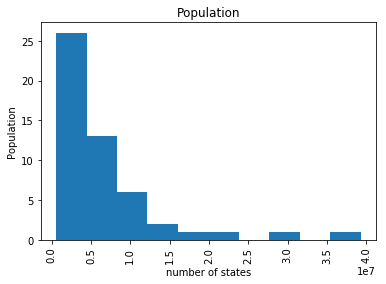

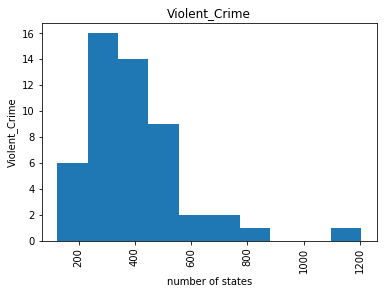

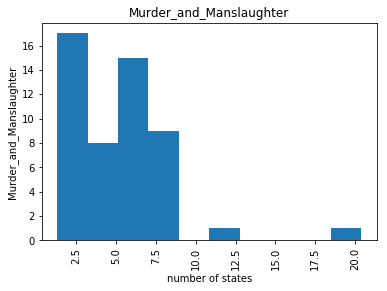

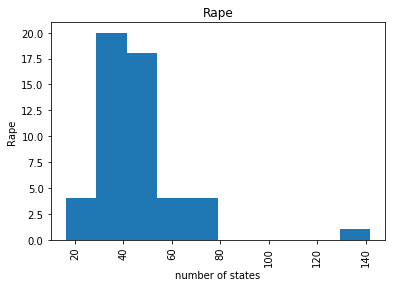

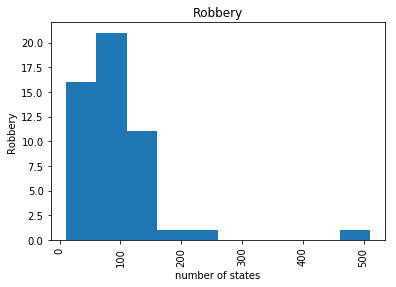

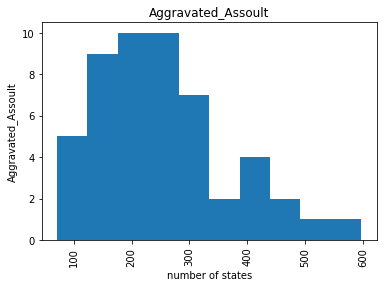

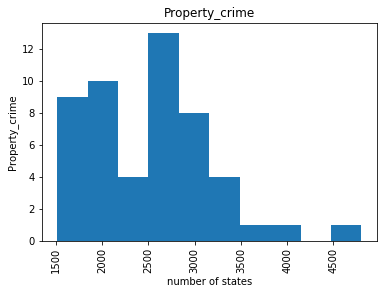

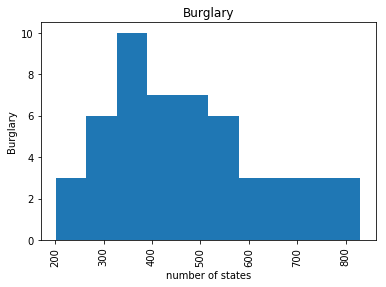

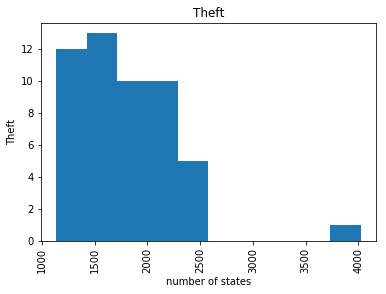

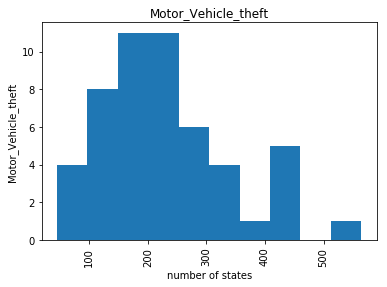

In [71]:
for i, col in enumerate(df.columns):
    if col != 'index' and df[col].dtype != 'object':
        plt.figure(i)
        plt.xticks(rotation=90)
        plt.xlabel("number of states")
        plt.ylabel(col)
        plt.title(col)
        plt.hist(df[col])

We can see that in almost all charts there is one (little) outlier. Let's see if we can spot it.

In [72]:
# We print the country which has a maximum in every numerical column
for col in df.columns:
    if col != 'index' and df[col].dtype != 'object':
        print("The max value for feature {} is of state {}".format(col, df[df[col] == df[col].max()].State))

The max value for feature Population is of state 4    California
Name: State, dtype: object
The max value for feature Violent_Crime is of state 8    District of Columbia
Name: State, dtype: object
The max value for feature Murder_and_Manslaughter is of state 8    District of Columbia
Name: State, dtype: object
The max value for feature Rape is of state 1    Alaska
Name: State, dtype: object
The max value for feature Robbery is of state 8    District of Columbia
Name: State, dtype: object
The max value for feature Aggravated_Assoult is of state 8    District of Columbia
Name: State, dtype: object
The max value for feature Property_crime is of state 8    District of Columbia
Name: State, dtype: object
The max value for feature Burglary is of state 31    New Mexico
Name: State, dtype: object
The max value for feature Theft is of state 8    District of Columbia
Name: State, dtype: object
The max value for feature Motor_Vehicle_theft is of state 31    New Mexico
Name: State, dtype: object


#### Analysis
We can see that the district of Columbia has unexpected high values. This may be related to the fact that it is the only American State which is actually a city, where usually the criminality rates are higher than in rural areas.

To conclude, we would like to see if there is a positive correlation among every kind of crimes:

In [73]:
numerical_features = []
for col in df.columns:
    # we skip the features which are non numerical, and the index column
    if (df[col].dtype == int or df[col].dtype == float) and col != 'index':
        numerical_features.append(col)
df[numerical_features].corr()

Population  Violent_Crime  Murder_and_Manslaughter  \
Population                 1.000000       0.013480                 0.037218   
Violent_Crime              0.013480       1.000000                 0.827674   
Murder_and_Manslaughter    0.037218       0.827674                 1.000000   
Rape                      -0.213760       0.592081                 0.293746   
Robbery                    0.151266       0.817911                 0.837320   
Aggravated_Assoult        -0.039888       0.947515                 0.706884   
Property_crime            -0.070521       0.730709                 0.655447   
Burglary                  -0.011349       0.402822                 0.406297   
Theft                     -0.106522       0.728716                 0.681140   
Motor_Vehicle_theft        0.060621       0.584927                 0.342179   

                             Rape   Robbery  Aggravated_Assoult  \
Population              -0.213760  0.151266           -0.039888   
Violent_Crime            0.592081  0.817911            0.947515   
Murder_and_Manslaughter  0.293746  0.837320            0.706884   
Rape                     1.000000  0.244174            0.611924   
Robbery                  0.244174  1.000000            0.602032   
Aggravated_Assoult       0.611924  0.602032            1.000000   
Property_crime           0.510811  0.579583            0.689667   
Burglary                 0.264841  0.137617            0.495571   
Theft                    0.484059  0.645100            0.649118   
Motor_Vehicle_theft      0.542252  0.432656            0.555113   

                         Property_crime  Burglary     Theft  \
Population                    -0.070521 -0.011349 -0.106522   
Violent_Crime                  0.730709  0.402822  0.728716   
Murder_and_Manslaughter        0.655447  0.406297  0.681140   
Rape                           0.510811  0.264841  0.484059   
Robbery                        0.579583  0.137617  0.645100   
Aggravated_Assoult             0.689667  0.495571  0.649118   
Property_crime                 1.000000  0.673415  0.962122   
Burglary                       0.673415  1.000000  0.477139   
Theft                          0.962122  0.477139  1.000000   
Motor_Vehicle_theft            0.778811  0.485301  0.671058   

                         Motor_Vehicle_theft  
Population                          0.060621  
Violent_Crime                       0.584927  
Murder_and_Manslaughter             0.342179  
Rape                                0.542252  
Robbery                             0.432656  
Aggravated_Assoult                  0.555113  
Property_crime                      0.778811  
Burglary                            0.485301  
Theft                               0.671058  
Motor_Vehicle_theft                 1.000000

Although it is not true for all columns (Rape and Burglary), usually we can see that the correlation ratios are quite well correlated. This means that id one country is usually high in any sort of crime, it is very likely that it is high in all other statistics for crime related features.

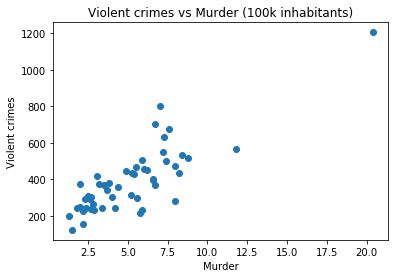

In [74]:
# just to make some examples
plt.figure(1)
plt.title("Violent crimes vs Murder (100k inhabitants)")
plt.xlabel("Murder")
plt.ylabel("Violent crimes")
plt.scatter(df['Murder_and_Manslaughter'], df['Violent_Crime'])

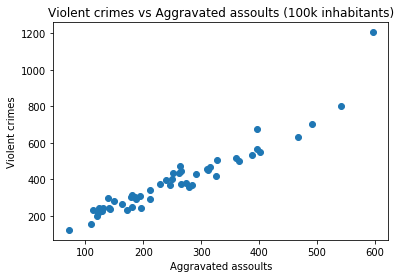

In [75]:
plt.figure(1)
plt.title("Violent crimes vs Aggravated assoults (100k inhabitants)")
plt.xlabel("Aggravated assoults")
plt.ylabel("Violent crimes")
plt.scatter(df['Aggravated_Assoult'], df['Violent_Crime'])

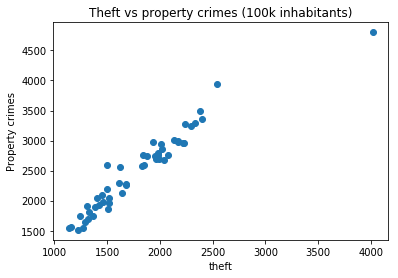

In [76]:
plt.figure(1)
plt.title("Theft vs property crimes (100k inhabitants)")
plt.xlabel("theft")
plt.ylabel("Property crimes")
plt.scatter(df['Theft'], df['Property_crime'])

They all show clear linear relationship among the two selected features.

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Life_expectancy, obesity, physical activity Data 
This datasets contains county specific data for life expectancies, obesity and physical activity from [IHME](http://www.healthdata.org/) for multiple years
We have three excel sheets corresponding to life expectancy, physical activity and obesity.
For life expectancy, we have the actual value in years, while for physical activity and obesity we have a percentage measure which indicates prevalence.
We first load the excel file from the data folder 

In [78]:
life_data = pd.ExcelFile("Data/harsh_data/IHME_county_data_LifeExpectancy_Obesity_PhysicalActivity_NATIONAL.xlsx")

In [79]:
#Sheet names
life_data.sheet_names

['Life Expectancy', 'Physical Activity', 'Obesity']

In [80]:
#Loading all sheets into a dict of dataframes
relevant_sheets = ['Physical Activity','Obesity']

pd_dict_life = {}
for sheet in relevant_sheets:
    pd_dict_life[sheet] = pd.read_excel(life_data,sheet)

Since we have data for life expectancy, we keep only the physical activity and obesity datasets

In [81]:
pd_dict_life['Physical Activity'].head()

State   County  \
0  United States      NaN   
1        Alabama      NaN   
2        Alabama  Autauga   
3        Alabama  Baldwin   
4        Alabama  Barbour   

   Male sufficient physical activity prevalence, 2001 (%)  \
0                                               56.8        
1                                               52.4        
2                                               55.0        
3                                               55.4        
4                                               45.7        

   Female sufficient physical activity prevalence, 2001 (%)  \
0                                               46.7          
1                                               40.4          
2                                               43.6          
3                                               48.4          
4                                               33.0          

   Male sufficient physical activity  prevalence, 2009 (%)  \
0                                               57.8         
1                                               51.5         
2                                               55.1         
3                                               56.6         
4                                               46.4         

   Female sufficient physical activity  prevalence, 2009 (%)  \
0                                               51.3           
1                                               41.4           
2                                               46.8           
3                                               49.2           
4                                               34.6           

   Male sufficient physical activity  prevalence, 2011* (%)  \
0                                               56.3          
1                                               49.5          
2                                               52.9          
3                                               54.1          
4                                               44.9          

   Female sufficient physical activity  prevalence, 2011* (%)  \
0                                               52.6            
1                                               42.0            
2                                               47.5            
3                                               49.6            
4                                               35.8            

   Difference in male sufficient physical activity prevalence, 2001-2009 (percentage points)  \
0                                                1.0                                           
1                                               -0.9                                           
2                                                0.1                                           
3                                                1.2                                           
4                                                0.7                                           

   Difference in female sufficient physical activity prevalence, 2001-2009 (percentage points)  \
0                                                4.7                                             
1                                                1.0                                             
2                                                3.2                                             
3                                                0.8                                             
4                                                1.6                                             

   Unnamed: 10  \
0          NaN   
1          NaN   
2          NaN   
3          NaN   
4          NaN   

   *Methodological changes in the 2011 BRFSS may affect comparability between the 2011 estimates and estimates from earlier years  
0                                                NaN                                                                               
1                      

In [82]:
pd_dict_life['Obesity'].head()

State   County  Male obesity prevalence, 2001 (%)  \
0  United States      NaN                               26.1   
1        Alabama      NaN                               29.7   
2        Alabama  Autauga                               30.7   
3        Alabama  Baldwin                               27.8   
4        Alabama  Barbour                               32.3   

   Female obesity prevalence, 2001 (%)  Male obesity prevalence, 2009 (%)  \
0                                 28.7                               32.8   
1                                 34.1                               36.1   
2                                 32.3                               35.9   
3                                 28.3                               32.4   
4                                 42.8                               40.3   

   Female obesity  prevalence, 2009 (%)  Male obesity  prevalence, 2011* (%)  \
0                                  35.1                                 33.8   
1                                  41.2                                 37.3   
2                                  37.4                                 37.1   
3                                  33.0                                 33.5   
4                                  51.3                                 41.5   

   Female obesity prevalence, 2011* (%)  \
0                                  36.1   
1                                  42.2   
2                                  38.8   
3                                  33.9   
4                                  51.6   

   Difference in male obesity prevalence, 2001-2009 (percentage points)  \
0                                                6.7                      
1                                                6.4                      
2                                                5.3                      
3                                                4.5                      
4                                                8.0                      

   Difference in female obesity prevalence, 2001-2009 (percentage points)  \
0                                                6.4                        
1                                                7.1                        
2                                                5.2                        
3                                                4.6                        
4                                                8.5                        

   Unnamed: 10  \
0          NaN   
1          NaN   
2          NaN   
3          NaN   
4          NaN   

   *Methodological changes in the 2011 BRFSS may affect comparability between the 2011 estimates and estimates from earlier years  
0                                                NaN                                                                               
1                                                NaN                                                                               
2                                                NaN                                                                               
3                                                NaN                                                                               
4                                                NaN

The average values for `State` are present in the rows where `County` is `NaN`. Further, we will need to remove the national average. Note that this corresponds to the row where `State` is United States. These changes have to be implemented for both physical activity and obesity so we apply it to the dict of these two dataframes

In [83]:
for sheet,df in pd_dict_life.items():
    pd_dict_life[sheet] = df[(df["County"].isnull()) & (df["State"] != "United States")].drop(columns=["County"])

We now separate the dataframes for a more detailed analysis

In [84]:
df_obesity = pd_dict_life['Obesity']
df_physical = pd_dict_life['Physical Activity']

Note that we only wish to keep the mean value of the relevant feature(here physical activity or obesity) for a specific year. Since all our other datasets have
values for years after 2010, we keep the latest values in these dataframes too.

In [85]:
print(len(df_obesity),len(df_physical))

51 51


Both our datasets have values for all the 51 states in the US.

In [86]:
df_obesity.columns

Index(['State', 'Male obesity prevalence, 2001 (%)',
       'Female obesity prevalence, 2001 (%)',
       'Male obesity prevalence, 2009 (%)',
       'Female obesity  prevalence, 2009 (%)',
       'Male obesity  prevalence, 2011* (%)',
       'Female obesity prevalence, 2011* (%)',
       'Difference in male obesity prevalence, 2001-2009 (percentage points)',
       'Difference in female obesity prevalence, 2001-2009 (percentage points)',
       'Unnamed: 10',
       '*Methodological changes in the 2011 BRFSS may affect comparability between the 2011 estimates and estimates from earlier years'],
      dtype='object')

In [87]:
df_physical.columns

Index(['State', 'Male sufficient physical activity prevalence, 2001 (%)',
       'Female sufficient physical activity prevalence, 2001 (%)',
       'Male sufficient physical activity  prevalence, 2009 (%)',
       'Female sufficient physical activity  prevalence, 2009 (%)',
       'Male sufficient physical activity  prevalence, 2011* (%)',
       'Female sufficient physical activity  prevalence, 2011* (%)',
       'Difference in male sufficient physical activity prevalence, 2001-2009 (percentage points)',
       'Difference in female sufficient physical activity prevalence, 2001-2009 (percentage points)',
       'Unnamed: 10',
       '*Methodological changes in the 2011 BRFSS may affect comparability between the 2011 estimates and estimates from earlier years'],
      dtype='object')

Note that the columns which we need to keep correspond to column indices 0,5 and 6 in each of these dataframes as these correspond to the state name and 
the corresponding feature for males and females for the year 2011.

In [88]:
df.columns[[0,5,6]]

Index(['State', 'Female obesity  prevalence, 2009 (%)',
       'Male obesity  prevalence, 2011* (%)'],
      dtype='object')

In [89]:
df_physical.columns[[0,5,6]]

Index(['State', 'Male sufficient physical activity  prevalence, 2011* (%)',
       'Female sufficient physical activity  prevalence, 2011* (%)'],
      dtype='object')

In [90]:
df_obesity = df_obesity[df_obesity.columns[[0,5,6]]]
df_physical = df_physical[df_physical.columns[[0,5,6]]]


We rename the columns for each dataframe to more usable column names

In [91]:
df_physical = df_physical.rename(columns = {"State" : "state",\
                             "Male sufficient physical activity  prevalence, 2011* (%)" : "male_physical_activity",\
                             "Female sufficient physical activity  prevalence, 2011* (%)" : "female_physical_activity"})
df_physical.head()

state  male_physical_activity  female_physical_activity
1       Alabama                    49.5                      42.0
69       Alaska                    59.8                      57.6
98      Arizona                    59.5                      56.9
114    Arkansas                    51.3                      45.2
190  California                    61.3                      59.2

In [92]:
df_obesity = df_obesity.rename(columns = {"State" : "state",\
                             "Male obesity  prevalence, 2011* (%)" : "male_obesity",\
                             "Female obesity prevalence, 2011* (%)" : "female_obesity"})
df_obesity.head()

state  male_obesity  female_obesity
1       Alabama          37.3            42.2
69       Alaska          33.8            37.6
98      Arizona          32.4            33.8
114    Arkansas          37.2            39.3
190  California          29.4            32.9

We will now try to analyse the distributions of our dataframes 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a26d32910>,
      dtype=object)

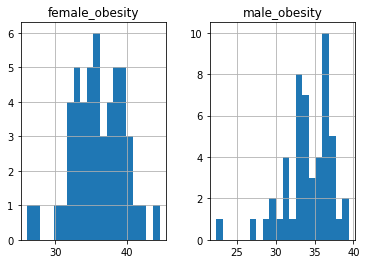

In [93]:
df_obesity.hist(bins = 20)

In [94]:
df_obesity.describe()

male_obesity  female_obesity
count     51.000000       51.000000
mean      34.023529       35.929412
std        3.173994        3.635893
min       22.400000       26.100000
25%       32.700000       33.450000
50%       33.900000       35.900000
75%       36.300000       38.750000
max       39.400000       44.500000

From the histograms, we can see that the distributions for female obesity is almost gaussian while it is skewed to the left for the males.
The obesity prevalence is also comparatively higher for all females. The District of Columbia has the lowest male obesity while Hawaii has the lowest female 
obesity which is lower than its male obesity. Mississipi has half of its females obese and Louisiana tops in Male obesity. Note that the least obese states are actually much less obese than other states(around 3 standard deviations from 25 percentile). 

In [95]:
#Max male obesity
df_obesity.loc[df_obesity["male_obesity"].idxmax()]

state             Louisiana
male_obesity           39.4
female_obesity         41.7
Name: 1131, dtype: object

In [96]:
#Max female obesity
df_obesity.loc[df_obesity["female_obesity"].idxmax()]

state             Mississippi
male_obesity             39.1
female_obesity           44.5
Name: 1425, dtype: object

In [97]:
#Min male obesity
df_obesity.loc[df_obesity["male_obesity"].idxmin()]

state             District of Columbia
male_obesity                      22.4
female_obesity                    35.3
Name: 327, dtype: object

In [98]:
#Min female obesity
df_obesity.loc[df_obesity["female_obesity"].idxmin()]

state             Hawaii
male_obesity        28.4
female_obesity      26.1
Name: 557, dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a26caa890>,
      dtype=object)

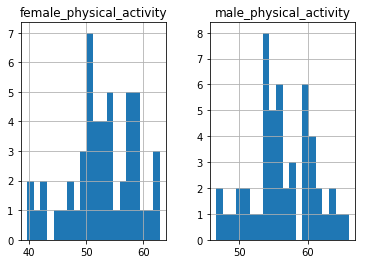

In [99]:
df_physical.hist(bins = 20)

In [100]:
df_physical.describe()

male_physical_activity  female_physical_activity
count               51.000000                 51.000000
mean                56.249020                 52.794118
std                  4.547191                  5.802600
min                 46.700000                 39.700000
25%                 53.700000                 49.900000
50%                 55.800000                 52.800000
75%                 59.800000                 57.650000
max                 66.000000                 62.800000

The distributions we now get are mean centered but not
particularly gaussian. Female physical activity is comparatively lower than male physical activity(mean and median). 

In [101]:
#Max male physical activity
df_physical.loc[df_physical["male_physical_activity"].idxmax()]

state                       Hawaii
male_physical_activity          66
female_physical_activity      60.9
Name: 557, dtype: object

In [102]:
#Max female physical activity
df_physical.loc[df_physical["female_physical_activity"].idxmax()]

state                       Vermont
male_physical_activity         63.7
female_physical_activity       62.8
Name: 2851, dtype: object

In [103]:
#Min male physical activity
df_physical.loc[df_physical["male_physical_activity"].idxmin()]

state                       Tennessee
male_physical_activity           46.7
female_physical_activity         39.9
Name: 2470, dtype: object

In [104]:
#Min female physical activity
df_physical.loc[df_physical["female_physical_activity"].idxmin()]

state                       Mississippi
male_physical_activity             47.2
female_physical_activity           39.7
Name: 1425, dtype: object

Hawaii has the highest physical activity for males and really high physical activity for females too. Their low obesity and high physical activity indicate the correlation for these two features. Further, Mississippi's low physical activity levels and high obesity rates again indicate the correlation.

In [105]:
df_physical["mean_physical_activity"] = 0.5*(df_physical["male_physical_activity"] + df_physical["female_physical_activity"]) 
df_obesity["mean_obesity"] = 0.5*(df_obesity["male_obesity"] + df_obesity["female_obesity"])

For our remaining tasks , we take the mean of male and female feature values. 

In [106]:
df_physical["mean_physical_activity"].describe()

count    51.000000
mean     54.521569
std       5.120725
min      43.300000
25%      51.975000
50%      53.950000
75%      58.650000
max      63.700000
Name: mean_physical_activity, dtype: float64

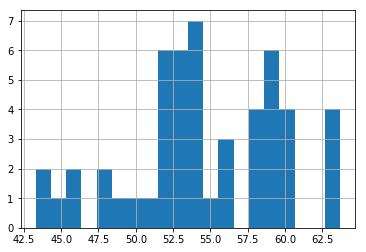

In [107]:
df_physical["mean_physical_activity"].hist(bins=20)

In [108]:
df_obesity["mean_obesity"].describe()

count    51.000000
mean     34.976471
std       3.212263
min      27.250000
25%      32.975000
50%      35.400000
75%      37.525000
max      41.800000
Name: mean_obesity, dtype: float64

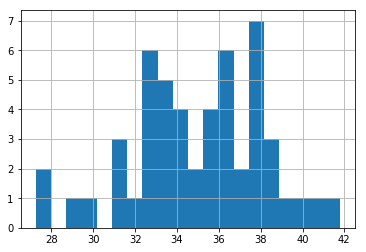

In [109]:
df_obesity["mean_obesity"].hist(bins=20)

In [110]:
#Max mean obesity
df_obesity.loc[df_obesity["mean_obesity"].idxmax()]

state             Mississippi
male_obesity             39.1
female_obesity           44.5
mean_obesity             41.8
Name: 1425, dtype: object

In [111]:
#Min mean obesity
df_obesity.loc[df_obesity["mean_obesity"].idxmin()]

state             Colorado
male_obesity          26.8
female_obesity        27.7
mean_obesity         27.25
Name: 249, dtype: object

In [112]:
#Max mean physical activity
df_physical.loc[df_physical["mean_physical_activity"].idxmax()]

state                       Colorado
male_physical_activity          64.7
female_physical_activity        62.7
mean_physical_activity          63.7
Name: 249, dtype: object

In [113]:
#Min mean physical activity
df_physical.loc[df_physical["mean_physical_activity"].idxmin()]

state                       Tennessee
male_physical_activity           46.7
female_physical_activity         39.9
mean_physical_activity           43.3
Name: 2470, dtype: object

Mississipi and Tennessee have consistently turned up in our analysis as states with high obesity and low physical activity levels indicatng the bad health conditions of its residents. However, averaging of male and female feature values has created a new contestant for the fittest state, Colorado. Note that Colorado may not boast of the best values for either males or females, however it has relatively lower and equal values for these sub-populations indicating some sort of "health"-equality.

#### Alcohol Dataset
This dataset is also from IHME and measures the alcohol consumption by counties for multiple years(2005-2012).
Note that we will again keep only the final year as we are interested in making an index for years after 2010.
The dataset has multiple sheets and is in xls format.

In [114]:
alcohol_data_xls = pd.ExcelFile("Data/harsh_data/IHME_county_data_Alcohol_NATIONAL.xlsx")

In [115]:
alcohol_data_xls.sheet_names

['Overview', 'Any', 'Heavy', 'Binge', 'Prop. Heavy', 'Prop. Binge']

We pick the definitions for other sheets from the `Overview`.
1. Any :"Any" drinking is defined as at least one drink of any alcoholic bevarage in the past 30 days
2.  Heavy : "Heavy" drinking is defined as the consumption, on average, of more than one drink per day for women or two drinks per day for men in the past 30 days
3.  Binge : "Binge" drinking is defined as the consumption of more than four drinks for women or five drinks for men on a single occasion at least once in the past 30 days
4. Proportion Heavy: Proportion of All Drinkers Who Are Heavy Drinkers 
5. Proportion Binge	Proportion of All Drinkers Who Are Binge Drinkers 

Note that Any, Heavy and Binge sheets have age-standardized drinking prevalence for multiple years.
For our project, we will analyse any form of drinking prevalence so we keep the `Any` sheet only.

In [116]:
#Keeping "Heavy" sheet
alcohol_df = pd.read_excel(alcohol_data_xls,'Heavy')

In [117]:
alcohol_df.head()

State        Location  2005 Both Sexes  2005 Females  2005 Males  \
0  National   United States              7.0           5.2         8.9   
1   Alabama         Alabama              6.0           3.6         8.4   
2   Alabama  Autauga County              6.2           3.4         9.0   
3   Alabama  Baldwin County              9.0           6.7        11.3   
4   Alabama  Barbour County              5.4           2.5         8.3   

   2006 Both Sexes  2006 Females  2006 Males  2007 Both Sexes  2007 Females  \
0              7.2           5.5         8.9              7.7           5.9   
1              5.6           3.4         7.9              5.6           3.5   
2              5.6           3.0         8.3              5.6           3.3   
3              8.4           6.1        10.8              8.4           6.1   
4              5.0           2.0         8.1              5.1           1.9   

   ...  2010 Males  2011 Both Sexes  2011 Females  2011 Males  \
0  ...         9.4              8.8           7.0        10.6   
1  ...         8.3              7.3           4.6        10.1   
2  ...         8.1              6.9           4.0        10.0   
3  ...        11.1             10.4           7.8        13.1   
4  ...        10.0              7.4           2.5        12.4   

   2012 Both Sexes  2012 Females  2012 Males  \
0              8.2           6.7         9.9   
1              6.6           4.3         8.9   
2              6.3           3.8         8.8   
3              9.3           7.3        11.4   
4              6.4           2.3        10.5   

   Percent Change 2005-2012, Both Sexes  Percent Change 2005-2012, Females  \
0                                  17.2                               28.2   
1                                   9.8                               19.1   
2                                   1.7                               12.2   
3                                   3.4                                7.7   
4                                  18.3                               -7.6   

   Percent Change 2005-2012, Males  
0                             10.5  
1                              5.6  
2                             -2.4  
3                              0.8  
4                             26.4  

[5 rows x 29 columns]

In [118]:
alcohol_df.columns

Index(['State', 'Location', '2005 Both Sexes', '2005 Females', '2005 Males',
       '2006 Both Sexes', '2006 Females', '2006 Males', '2007 Both Sexes',
       '2007 Females', '2007 Males', '2008 Both Sexes', '2008 Females',
       '2008 Males', '2009 Both Sexes', '2009 Females', '2009 Males',
       '2010 Both Sexes', '2010 Females', '2010 Males', '2011 Both Sexes',
       '2011 Females', '2011 Males', '2012 Both Sexes', '2012 Females',
       '2012 Males', 'Percent Change 2005-2012, Both Sexes',
       'Percent Change 2005-2012, Females', 'Percent Change 2005-2012, Males'],
      dtype='object')

The column of interest for us here is `2012 Both Sexes`. Since we have sex-averaged values, we don't analyse the data for males and females separately.
Further, a look at our dataframe shows that to get average values for a given state, we need `State` and `Location` column values to be same,i.e., the state 
Our next steps include keeping only the state-averages and the column of interest

In [119]:
#Keep only states
alcohol_df = alcohol_df[(alcohol_df["Location"] == alcohol_df["State"]) ].drop(columns=["Location"])

In [120]:
#Number of states is 51, so we have all the states
len(alcohol_df)

51

In [121]:
alcohol_df.head()

State  2005 Both Sexes  2005 Females  2005 Males  2006 Both Sexes  \
1       Alabama              6.0           3.6         8.4              5.6   
69       Alaska              7.8           5.9         9.8              8.0   
94      Arizona              8.3           6.1        10.5              8.2   
109    Arkansas              5.4           3.2         7.7              5.8   
190  California              8.3           6.8         9.9              8.7   

     2006 Females  2006 Males  2007 Both Sexes  2007 Females  2007 Males  ...  \
1             3.4         7.9              5.6           3.5         7.8  ...   
69            6.3         9.7              8.9           7.1        10.7  ...   
94            6.5         9.9              8.4           6.4        10.6  ...   
109           3.5         8.2              6.2           3.8         8.7  ...   
190           7.4        10.0              9.5           8.0        10.9  ...   

     2010 Males  2011 Both Sexes  2011 Females  2011 Males  2012 Both Sexes  \
1           8.3              7.3           4.6        10.1              6.6   
69         10.4              9.8           8.4        11.2              9.2   
94         10.4              9.3           7.6        11.2              8.1   
109         8.4              7.6           5.4         9.9              6.9   
190         9.8              9.3           8.2        10.5              8.4   

     2012 Females  2012 Males  Percent Change 2005-2012, Both Sexes  \
1             4.3         8.9                                   9.8   
69            8.1        10.3                                  17.5   
94            7.2         9.1                                  -2.0   
109           5.1         8.8                                  27.3   
190           7.5         9.4                                   1.1   

     Percent Change 2005-2012, Females  Percent Change 2005-2012, Males  
1                                 19.1                              5.6  
69                                37.2                              5.0  
94                                16.8                            -13.4  
109                               57.2                             14.4  
190                               10.7                             -5.7  

[5 rows x 28 columns]

In [122]:
#keep only column of interest and rename it to something more usable
alcohol_df = alcohol_df[["State","2012 Both Sexes"]].rename(columns = {"2012 Both Sexes" : "alcohol_prevalence"})
alcohol_df.head()

State  alcohol_prevalence
1       Alabama                 6.6
69       Alaska                 9.2
94      Arizona                 8.1
109    Arkansas                 6.9
190  California                 8.4

In [123]:
alcohol_df.describe()

alcohol_prevalence
count           51.000000
mean             8.564706
std              1.636194
min              5.200000
25%              7.300000
50%              8.800000
75%              9.700000
max             12.000000

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a29915550>]],
      dtype=object)

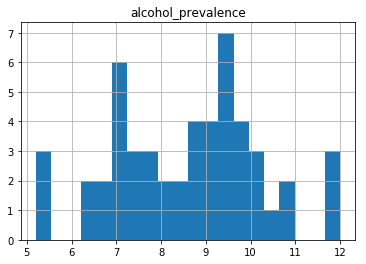

In [124]:
alcohol_df.hist(bins = 20)

Alcohol prevalence has a left skewed distribution. The distribution is does not vary much in the ranges of 55-68. However, there are a few outliers with very low alcohol prevalence. The high value of standard deviation ( 8.7) is attributed to these outliers as one can see from the high difference between the minima and the 25 percentile as compared to difference of other sets of consecutive percentiles(here, by consecutive, we mean which differ by 25%). 
Finding the max and min of this distribution can shed more light on this.

In [125]:
# Max alcohol prevalence
alcohol_df.loc[alcohol_df["alcohol_prevalence"].idxmax()]

State                 Wisconsin
alcohol_prevalence           12
Name: 3153, dtype: object

In [126]:
#Min alcohol prevalence
alcohol_df.loc[alcohol_df["alcohol_prevalence"].idxmin()]

State                 Utah
alcohol_prevalence     5.2
Name: 2835, dtype: object

In [127]:
alcohol_df.loc[alcohol_df["alcohol_prevalence"] < 6]

State  alcohol_prevalence
2543      Tennessee                 5.4
2835           Utah                 5.2
3077  West Virginia                 5.4

The state of Utah has an extremely low alcohol prevalence as compared to other states. West Virginia also has substantially lower values. 

### Diabetes Dataset
This dataset is also from IHME for diabetes prevalence in the US by county for years 1999-2012.
We again have a xls file with multiple sheets.

In [128]:
#data loading
diabetes_data_xls = pd.ExcelFile("Data/harsh_data/IHME_county_data_Diabetes_NATIONAL.xlsx")

In [129]:
#Print sheet names
diabetes_data_xls.sheet_names

['Overview', 'Diagnosed', 'Undiagnosed', 'Total', 'Awareness', 'Control']

The description of sheet names from the `Overview` sheet --
1. Diagnosed : The proportion of adults age 20+ who report a previous diabetes diagnosis (age-standardized)
2. Undiagnosed :The proportion of adults age 20+ who do not report a previous diabetes diagnosis who have high FPG/A1C* (age-standardized)
3. Total : The proportion of adults age 20+ who report a previous diabetes diagnosis and/or have high FPG/A1C* (age-standardized)
4. Awareness : The proportion of adults age 20+ with a previous diabetes diagnosis and/or high FPG/A1C* who have received a diagnosis (age-standardized)
5. Control : The proportion of adults age 20+ with a previous diabetes diagnosis and/or high FGP/A1C* who currently do not have high FPG/A1C* (age-standardized)

*High FPG/A1C is fasting plasma glucose at least 126 mg/dL and/or A1C at least 6.5%

For our project, we will don't distinguish between diagnosed and undiagnosed cases, so we will only consider the `Total` sheet.

In [130]:
#Read total sheet
diabetes_df = pd.read_excel(diabetes_data_xls,'Total')

In [131]:
diabetes_df.head()

Age-Standardized Total Diabetes Prevalence (%) Unnamed: 1  \
0                                       Location       FIPS   
1                                       National        NaN   
2                                        Alabama          1   
3                                 Autauga County       1001   
4                                 Baldwin County       1003   

                     Unnamed: 2                 Unnamed: 3  \
0  Prevalence, 1999, Both Sexes  Prevalence, 1999, Females   
1                          10.2                       9.08   
2                         11.71                      10.72   
3                         11.58                      10.54   
4                          9.71                        7.9   

                Unnamed: 4                    Unnamed: 5  \
0  Prevalence, 1999, Males  Prevalence, 2000, Both Sexes   
1                    11.39                         10.66   
2                    12.76                         12.21   
3                    12.69                         12.01   
4                    11.64                         10.11   

                  Unnamed: 6               Unnamed: 7  \
0  Prevalence, 2000, Females  Prevalence, 2000, Males   
1                       9.53                    11.87   
2                      11.21                    13.27   
3                      10.94                    13.14   
4                       8.26                    12.08   

                     Unnamed: 8                 Unnamed: 9  ...  \
0  Prevalence, 2001, Both Sexes  Prevalence, 2001, Females  ...   
1                         11.12                       9.95  ...   
2                         12.77                      11.76  ...   
3                         12.46                      11.31  ...   
4                         10.57                       8.69  ...   

               Unnamed: 37                   Unnamed: 38  \
0  Prevalence, 2010, Males  Prevalence, 2011, Both Sexes   
1                    15.22                         14.02   
2                    16.64                         15.84   
3                    16.19                         15.25   
4                    14.87                         13.17   

                 Unnamed: 39              Unnamed: 40  \
0  Prevalence, 2011, Females  Prevalence, 2011, Males   
1                      12.73                    15.39   
2                      14.97                    16.77   
3                      13.92                    16.67   
4                      11.44                    15.02   

                    Unnamed: 41                Unnamed: 42  \
0  Prevalence, 2012, Both Sexes  Prevalence, 2012, Females   
1                         14.28                      13.02   
2                         16.19                      15.26   
3                         15.45                      14.03   
4                         13.44                       11.8   

               Unnamed: 43                       Unnamed: 44  \
0  Prevalence, 2012, Males  Percent Change, 1999-2012, Males   
1                    15.62                              37.1   
2                    17.19                             34.66   
3                    16.97                              33.7   
4                    15.19                             30.52   

                          Unnamed: 45                            Unnamed: 46  
0  Percent Change, 1999-2012, Females  Percent Change, 1999-2012, Both Sexes  
1                                43.5                                  40.04  
2                               42.28                                  38.26  
3                                33.1                                  33.42  
4                               49.25                                  38.38  

[5 rows x 47 columns]

There seems to a hierarchical index for column names in the excel file which `pandas.read_excel` cannot handle. But, the hierarchical column names are not necessarily required for later processing, as the top column name is `Age-Standardized Total Diabetes Prevalence (%)` which is basically the column name for all columns with diabetes prevalence, and we can set the first row as the column names. 

In [132]:
#Set first row as column names then drop that row 
diabetes_df.columns = diabetes_df.iloc[0]
diabetes_df = diabetes_df.drop(diabetes_df.index[0])

In [133]:
diabetes_df.head()

0        Location  FIPS Prevalence, 1999, Both Sexes  \
1        National   NaN                         10.2   
2         Alabama     1                        11.71   
3  Autauga County  1001                        11.58   
4  Baldwin County  1003                         9.71   
5  Barbour County  1005                        13.84   

0 Prevalence, 1999, Females Prevalence, 1999, Males  \
1                      9.08                   11.39   
2                     10.72                   12.76   
3                     10.54                   12.69   
4                       7.9                   11.64   
5                     13.03                   14.69   

0 Prevalence, 2000, Both Sexes Prevalence, 2000, Females  \
1                        10.66                      9.53   
2                        12.21                     11.21   
3                        12.01                     10.94   
4                        10.11                      8.26   
5                        14.57                     13.76   

0 Prevalence, 2000, Males Prevalence, 2001, Both Sexes  \
1                   11.87                        11.12   
2                   13.27                        12.77   
3                   13.14                        12.46   
4                   12.08                        10.57   
5                   15.44                        15.25   

0 Prevalence, 2001, Females  ... Prevalence, 2010, Males  \
1                      9.95  ...                   15.22   
2                     11.76  ...                   16.64   
3                     11.31  ...                   16.19   
4                      8.69  ...                   14.87   
5                     14.46  ...                   19.28   

0 Prevalence, 2011, Both Sexes Prevalence, 2011, Females  \
1                        14.02                     12.73   
2                        15.84                     14.97   
3                        15.25                     13.92   
4                        13.17                     11.44   
5                        19.08                     18.38   

0 Prevalence, 2011, Males Prevalence, 2012, Both Sexes  \
1                   15.39                        14.28   
2                   16.77                        16.19   
3                   16.67                        15.45   
4                   15.02                        13.44   
5                   19.83                        19.36   

0 Prevalence, 2012, Females Prevalence, 2012, Males  \
1                     13.02                   15.62   
2                     15.26                   17.19   
3                     14.03                   16.97   
4                      11.8                   15.19   
5                     18.67                    20.1   

0 Percent Change, 1999-2012, Males Percent Change, 1999-2012, Females  \
1                             37.1                               43.5   
2                            34.66                              42.28   
3                             33.7                               33.1   
4                            30.52                              49.25   
5                            36.79                              43.25   

0 Percent Change, 1999-2012, Both Sexes  
1                                 40.04  
2                                 38.26  
3                                 33.42  
4                                 38.38  
5                                 39.93  

[5 rows x 47 columns]

The `Location` column contains the State names, county names and National value. Note that the `FIPS` column has a 2-digit number when the location is a state. We use this fact to filter out all the states. Also, `FIPS` is null when the value is national. The column of interest for us is again the latest year,i.e., 2012 and the prevalence for both sexes. Similar to the alcohol dataset, we do not analyse the female and male values separately as we already have the average value which we need for further processing.

In [134]:
#Keep only the States
diabetes_df = diabetes_df[(diabetes_df["FIPS"].notnull()) & (diabetes_df["FIPS"]< 100)]

In [135]:
diabetes_df.head()

0      Location FIPS Prevalence, 1999, Both Sexes Prevalence, 1999, Females  \
2       Alabama    1                        11.71                     10.72   
70       Alaska    2                         9.04                      8.81   
100     Arizona    4                          9.3                      8.05   
116    Arkansas    5                        10.33                      9.14   
192  California    6                         10.2                      9.18   

0   Prevalence, 1999, Males Prevalence, 2000, Both Sexes  \
2                     12.76                        12.21   
70                     9.29                         9.42   
100                   10.64                         9.79   
116                   11.59                        10.81   
192                   11.29                        10.64   

0   Prevalence, 2000, Females Prevalence, 2000, Males  \
2                       11.21                   13.27   
70                       9.22                    9.63   
100                      8.52                   11.15   
116                      9.61                    12.1   
192                      9.59                   11.76   

0   Prevalence, 2001, Both Sexes Prevalence, 2001, Females  ...  \
2                          12.77                     11.76  ...   
70                          9.73                      9.51  ...   
100                        10.32                         9  ...   
116                        11.35                     10.11  ...   
192                        11.09                     10.01  ...   

0   Prevalence, 2010, Males Prevalence, 2011, Both Sexes  \
2                     16.64                        15.84   
70                    11.78                        11.81   
100                   14.51                        13.27   
116                   16.22                        15.02   
192                   14.91                        13.91   

0   Prevalence, 2011, Females Prevalence, 2011, Males  \
2                       14.97                   16.77   
70                      11.84                   11.78   
100                     11.86                   14.76   
116                     13.62                   16.51   
192                     12.79                   15.12   

0   Prevalence, 2012, Both Sexes Prevalence, 2012, Females  \
2                          16.19                     15.26   
70                         11.89                     12.04   
100                        13.72                     12.24   
116                        15.23                     13.95   
192                        14.51                     13.16   

0   Prevalence, 2012, Males Percent Change, 1999-2012, Males  \
2                     17.19                            34.66   
70                    11.74                            26.38   
100                   15.29                            43.72   
116                   16.59                            43.14   
192                   15.95                            41.36   

0   Percent Change, 1999-2012, Females Percent Change, 1999-2012, Both Sexes  
2                                42.28                                 38.26  
70                               36.58                                 31.51  
100                              52.13                                 47.48  
116                              52.68                                 47.49  
192                              43.38                                 42.29  

[5 rows x 47 columns]

In [136]:
#We have all the 51 states
len(diabetes_df)

51

In [137]:
#Keep only column of interest and rename it to something more usable.
#Also rename location to State for easy merging later
diabetes_df = diabetes_df[["Location","Prevalence, 2012, Both Sexes"]]\
    .rename(columns = {"Location":"State","Prevalence, 2012, Both Sexes" : "diabetes_prevalence"})

In [138]:
diabetes_df.head()

0         State diabetes_prevalence
2       Alabama               16.19
70       Alaska               11.89
100     Arizona               13.72
116    Arkansas               15.23
192  California               14.51

In [139]:
diabetes_df.dtypes

0
State                  object
diabetes_prevalence    object
dtype: object

Our diabetes_prevalence column is of `object` datatype. This might cause problems later so we convert it to `float64`

In [140]:
#Convert datatype
diabetes_df = diabetes_df.astype({"diabetes_prevalence" : "float64"})

In [141]:
diabetes_df.describe()

0      diabetes_prevalence
count            51.000000
mean             13.703529
std               1.578180
min              10.740000
25%              12.420000
50%              13.770000
75%              14.930000
max              17.550000

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2d291cd0>]],
      dtype=object)

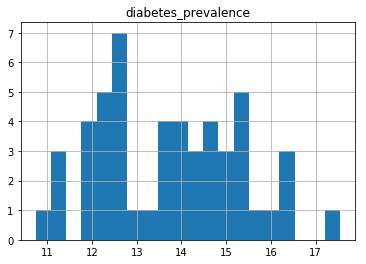

In [142]:
diabetes_df.hist(bins=20)

The distribution is right-skewed with a very small skew ( Median - mean = 0.07). There are certain large drops in the distribution near 12.8 and 15.5.

In [143]:
#Max diabetes prevalence
diabetes_df.loc[diabetes_df["diabetes_prevalence"].idxmax()]

0
State                  Mississippi
diabetes_prevalence          17.55
Name: 1427, dtype: object

In [144]:
diabetes_df.loc[diabetes_df["diabetes_prevalence"].idxmin()]

0
State                  Vermont
diabetes_prevalence      10.74
Name: 2853, dtype: object

In [145]:
diabetes_df.loc[diabetes_df["diabetes_prevalence"] > 16]

0           State  diabetes_prevalence
2         Alabama                16.19
1133    Louisiana                16.48
1427  Mississippi                17.55
2568        Texas                16.34

In [146]:
diabetes_df.loc[diabetes_df["diabetes_prevalence"] < 11.5]

0         State  diabetes_prevalence
251    Colorado                11.26
1339  Minnesota                11.27
1626    Montana                11.37
2853    Vermont                10.74

Note that Mississipi fares poorly even in terms of diabetes and it is almost 1 standard deviation higher than the state with 2nd highest diabetes prevalence.
Vermont, the minimum diabetes state, is comparatively closer to the other low diabetes states.

Now that we have analysed our datasets separately, we will merge them into a single dataframe based on the name of the State. Before this merge, to keep all state names consistent, we convert them to lower case. We perform the merge in pairs. Merging 4 dataframes to 2 and then these 2 to a single dataframe

In [147]:
#Lower state names and perform first merge on State
diabetes_df["State"] = diabetes_df["State"].apply(lambda x : x.lower())
alcohol_df["State"] = alcohol_df["State"].apply(lambda x : x.lower())
merged_df1 = pd.merge(diabetes_df,alcohol_df,on="State")

In [148]:
merged_df1.head()

State  diabetes_prevalence  alcohol_prevalence
0     alabama                16.19                 6.6
1      alaska                11.89                 9.2
2     arizona                13.72                 8.1
3    arkansas                15.23                 6.9
4  california                14.51                 8.4

In [149]:
#Merge retains all 51 states
len(merged_df1)

51

For `df_physical` and `df_obesity`, the merge is on `state` instead of `State` and only for the mean values. We rename the `state` column name to `State` for the last merge.

In [150]:
#Lower the state names and perform second merge on state
df_physical["state"] = df_physical["state"].apply(lambda x : x.lower())
df_obesity["state"] = df_obesity["state"].apply(lambda x : x.lower())
merged_df2 = pd.merge(df_physical[["state","mean_physical_activity"]],df_obesity[["state","mean_obesity"]], on="state")

In [151]:
merged_df2.head()

state  mean_physical_activity  mean_obesity
0     alabama                   45.75         39.75
1      alaska                   58.70         35.70
2     arizona                   58.20         33.10
3    arkansas                   48.25         38.25
4  california                   60.25         31.15

In [152]:
#All 51 states are retained in the merge
len(merged_df2)

51

In [153]:
#Rename state to State
merged_df2 = merged_df2.rename(columns = {"state":"State"})

In [154]:
merged_df2.head()

State  mean_physical_activity  mean_obesity
0     alabama                   45.75         39.75
1      alaska                   58.70         35.70
2     arizona                   58.20         33.10
3    arkansas                   48.25         38.25
4  california                   60.25         31.15

In [155]:
#Merge the two merged dataframes into single dataframe
merged_df = pd.merge(merged_df1,merged_df2,on="State")

In [156]:
merged_df.head()

State  diabetes_prevalence  alcohol_prevalence  \
0     alabama                16.19                 6.6   
1      alaska                11.89                 9.2   
2     arizona                13.72                 8.1   
3    arkansas                15.23                 6.9   
4  california                14.51                 8.4   

   mean_physical_activity  mean_obesity  
0                   45.75         39.75  
1                   58.70         35.70  
2                   58.20         33.10  
3                   48.25         38.25  
4                   60.25         31.15

In [157]:
#All states present in the merge
len(merged_df)


51

In [158]:
#No null values in our merged dataframe
merged_df.isnull().values.any()

False

In [159]:
#Correlation between features
merged_df.corr()

diabetes_prevalence  alcohol_prevalence  \
diabetes_prevalence                1.000000           -0.670811   
alcohol_prevalence                -0.670811            1.000000   
mean_physical_activity            -0.749479            0.649040   
mean_obesity                       0.658064           -0.496215   

                        mean_physical_activity  mean_obesity  
diabetes_prevalence                  -0.749479      0.658064  
alcohol_prevalence                    0.649040     -0.496215  
mean_physical_activity                1.000000     -0.837010  
mean_obesity                         -0.837010      1.000000

As should be the case, diabetes risk increases with high alcohol prevalence, lower physical activity and higher obesity. The correlation numbers suggest this.
Obesity and physical activity are highly negatively correlated as physical activity should lower obesity. Alcohol prevalence has a negative correlation with obesity and a positive correlation with physical activity with the correlation values not very high in magnitude. The high correlation between physical activity and obesity might be responsible for this effect. Although the correlation values for alcohol are not high enough for us to suggest some statistical significance.

We now build scatter plots for every pair of features to better understand these relationships.

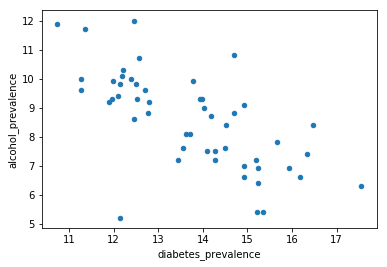

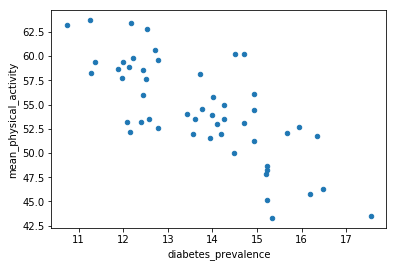

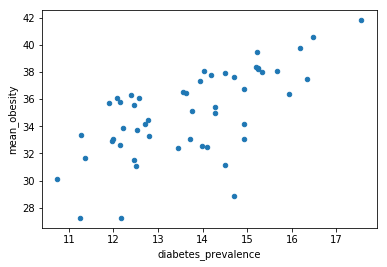

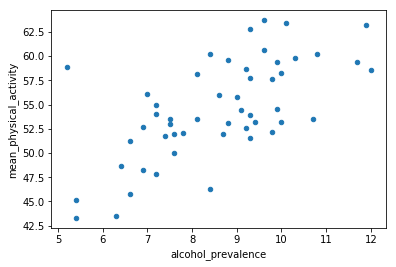

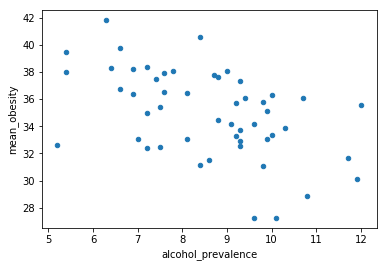

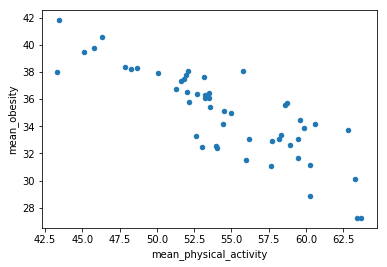

In [160]:
from itertools import combinations
#get list of column names
col_list = merged_df.columns.tolist()
#remove the state column name
col_list.remove("State")
#find all unique combinations of features 
for i,j in combinations(col_list,2):
    merged_df.plot.scatter(x = i,y=j)

As can be seen from the scatter plot, all pairs of features appear to have the same relationships as indicated by the correlation. The curious case of alcohol prevalence can also be explained. It appears to have a somewhat linear trend with physical activity and obesity but the overall correlation is poor because of outliers. The state of Utah which has the lowest alcohol prevalence lies in the middle of the distribution for the other parameters so it distorts the statistics. Even obesity and diabetes pair has a number of outliers which distort their correlation values.

In [161]:
#Save dataframe as pickle
merged_df.to_pickle("Pickles/hv_data.pickle")

In [162]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import random

plotly.offline.init_notebook_mode()

### Homelessness data

we dowloaded the '2007-2018-PIT-Counts-by-State' (XLSX) file from https://www.hudexchange.info/resource/5783/2018-ahar-part-1-pit-estimates-of-homelessness-in-the-us/

In [163]:
#we load the data (here only the '2018' sheet to have a good visualization')
df = pd.read_excel('Data/2007-2018-PIT-Counts-by-State.xlsx', sheet_name='2018')
type(df)

pandas.core.frame.DataFrame

In [164]:
#quick visualisation
df.head()

State  Number of CoCs  Overall Homeless, 2018  Sheltered ES Homeless, 2018  \
0    AK               2                    2016                         1248   
1    AL               8                    3434                         1519   
2    AR               7                    2712                          933   
3    AZ               3                    9865                         3615   
4    CA              43                  129972                        27475   

   Sheltered TH Homeless, 2018  Sheltered SH Homeless, 2018  \
0                          459                            0   
1                          865                           40   
2                          516                            6   
3                         2144                           40   
4                        12737                          217   

   Sheltered Total Homeless, 2018  Unsheltered Homeless, 2018  \
0                            1707                         309   
1                            2424                        1010   
2                            1455                        1257   
3                            5799                        4066   
4                           40429                       89543   

   Homeless Individuals, 2018  Sheltered ES Homeless Individuals, 2018  ...  \
0                        1434                                      953  ...   
1                        2570                                     1057  ...   
2                        2280                                      708  ...   
3                        7259                                     2327  ...   
4                      109008                                    16507  ...   

   Homeless Parenting Youth Age 18-24, 2018  \
0                                        25   
1                                        27   
2                                         8   
3                                        63   
4                                      1077   

   Sheltered ES Homeless Parenting Youth Age 18-24, 2018  \
0                                                 14       
1                                                 11       
2                                                  5       
3                                                 19       
4                                                567       

   Sheltered TH Homeless Parenting Youth Age 18-24, 2018  \
0                                                  9       
1                                                  8       
2                                                  2       
3                                                 35       
4                                                389       

   Sheltered Total Homeless Parenting Youth Age 18-24, 2018  \
0                                                 23          
1                                                 19          
2                                                  7          
3                                                 54          
4                                                956          

   Unsheltered Homeless Parenting Youth Age 18-24, 2018  \
0                                                  2      
1                                                  8      
2                                                  1      
3                                                  9      
4                                                121      

   Homeless Children of Parenting Youth, 2018  \
0                                          26   
1                                          36   
2                                          11   
3                                          81   
4                                        1215   

   Sheltered ES Homeless Children of Parenting Youth, 2018  \
0                                                 14         
1                                                 16         
2                                                  7    

We can see that there are a lot of informations. We will try to keep only the 'overall homeless', 'Homeless Family Households' and 'Homeless Veterans' count of each years. We will start with the year 2018 to have a guess on the procedure.

#### 2018 dataset:

In [165]:
#load the corresponding datasheet
df2018 = pd.read_excel('Data/2007-2018-PIT-Counts-by-State.xlsx', sheet_name='2018')
df2018.head()

State  Number of CoCs  Overall Homeless, 2018  Sheltered ES Homeless, 2018  \
0    AK               2                    2016                         1248   
1    AL               8                    3434                         1519   
2    AR               7                    2712                          933   
3    AZ               3                    9865                         3615   
4    CA              43                  129972                        27475   

   Sheltered TH Homeless, 2018  Sheltered SH Homeless, 2018  \
0                          459                            0   
1                          865                           40   
2                          516                            6   
3                         2144                           40   
4                        12737                          217   

   Sheltered Total Homeless, 2018  Unsheltered Homeless, 2018  \
0                            1707                         309   
1                            2424                        1010   
2                            1455                        1257   
3                            5799                        4066   
4                           40429                       89543   

   Homeless Individuals, 2018  Sheltered ES Homeless Individuals, 2018  ...  \
0                        1434                                      953  ...   
1                        2570                                     1057  ...   
2                        2280                                      708  ...   
3                        7259                                     2327  ...   
4                      109008                                    16507  ...   

   Homeless Parenting Youth Age 18-24, 2018  \
0                                        25   
1                                        27   
2                                         8   
3                                        63   
4                                      1077   

   Sheltered ES Homeless Parenting Youth Age 18-24, 2018  \
0                                                 14       
1                                                 11       
2                                                  5       
3                                                 19       
4                                                567       

   Sheltered TH Homeless Parenting Youth Age 18-24, 2018  \
0                                                  9       
1                                                  8       
2                                                  2       
3                                                 35       
4                                                389       

   Sheltered Total Homeless Parenting Youth Age 18-24, 2018  \
0                                                 23          
1                                                 19          
2                                                  7          
3                                                 54          
4                                                956          

   Unsheltered Homeless Parenting Youth Age 18-24, 2018  \
0                                                  2      
1                                                  8      
2                                                  1      
3                                                  9      
4                                                121      

   Homeless Children of Parenting Youth, 2018  \
0                                          26   
1                                          36   
2                                          11   
3                                          81   
4                                        1215   

   Sheltered ES Homeless Children of Parenting Youth, 2018  \
0                                                 14         
1                                                 16         
2                                                  7    

In [166]:
#select the wanted columns
df2018filtered = df2018[["State", "Overall Homeless, 2018",\
                         "Homeless Family Households, 2018",\
                         "Homeless Veterans, 2018"]]
df2018filtered.head()

State  Overall Homeless, 2018  Homeless Family Households, 2018  \
0    AK                    2016                               193   
1    AL                    3434                               280   
2    AR                    2712                               147   
3    AZ                    9865                               792   
4    CA                  129972                              6702   

   Homeless Veterans, 2018  
0                      132  
1                      339  
2                      251  
3                      893  
4                    10836

There are some "errors". For example, GU (==Guam) is not a state so we will remove it.  
(a list of states and territories can be found <a href="https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations" target="_blank">here</a>.)  
PS: We will count DC (==Washington, D.C.) as a state.

In [167]:
#removing unwanted areas
df2018filtered = df2018filtered.drop(df2018filtered[np.isin(df2018filtered["State"], ['GU', 'MP', 'PR', 'VI', 'Total'])].index)

We want the full name of the states. We found the '50_us_states_all_data.csv' file on https://scottontechnology.com/list-of-50-us-states-in-excel/ that will help us to transform the names of the states

In [168]:
#load the csv file for the states names
statesNamesDf = pd.read_csv("Data/50_us_states_all_data.csv", header=None,\
                    names=['useless1', 'fullName', 'abbreviation', 'useless2'])

#We add DC (District of Columbia) to the dataframe
df2 = pd.DataFrame([['DISTRICT OF COLUMBIA', 'District of Columbia', 'DC', 'D.C.']],\
                   columns=['useless1', 'fullName', 'abbreviation', 'useless2'])
statesNamesDf = statesNamesDf.append(df2)
statesNamesDf.head()

useless1    fullName abbreviation useless2
0     ALABAMA     Alabama           AL     Ala.
1      ALASKA      Alaska           AK   Alaska
2     ARIZONA     Arizona           AZ    Ariz.
3    ARKANSAS    Arkansas           AR     Ark.
4  CALIFORNIA  California           CA   Calif.

In [170]:
#we select the wanted columns and create a numpy array
statesNamesDfFiltered = statesNamesDf[["fullName", 'abbreviation']].to_numpy()
statesNamesDfFiltered[:5]

array([['Alabama', 'AL'],
       ['Alaska', 'AK'],
       ['Arizona', 'AZ'],
       ['Arkansas', 'AR'],
       ['California', 'CA']], dtype=object)

In [171]:
#we define a function to transform abbreviation to full names
def switchAbrToFull(elt, listSwitch):
    index = int(np.where(listSwitch[:,1]==elt)[0])
    return listSwitch[index][0]

#we test the function
switchAbrToFull('NY', statesNamesDfFiltered)

'New York'

In [172]:
#finally we apply the switchAbrToFull to have proper names for each rows
df2018Final = df2018filtered.copy()

df2018Final.State = df2018Final.State.apply(lambda x : switchAbrToFull(x, statesNamesDfFiltered))
df2018Final.head()

State  Overall Homeless, 2018  Homeless Family Households, 2018  \
0      Alaska                    2016                               193   
1     Alabama                    3434                               280   
2    Arkansas                    2712                               147   
3     Arizona                    9865                               792   
4  California                  129972                              6702   

   Homeless Veterans, 2018  
0                      132  
1                      339  
2                      251  
3                      893  
4                    10836

#### Visualization of the results:

interactive visualization using plotly:

In [173]:
#setting the scatter points values
xAxe = df2018Final["Overall Homeless, 2018"].tolist() 
yAxe = np.zeros(len(xAxe))
annotation = df2018Final["State"].tolist()

fig = go.Figure()

#plotting the scatter plot (blu points)
fig.add_trace(go.Scatter(
    x=xAxe,
    y=yAxe,
    mode="markers",
    name="",
    text=annotation,
    textposition="bottom center",
))

#adding title, axis labels and changing plot size
fig.update_layout(title_text='visualize homeless repartition by states:',        
        xaxis_title='number of homeless people by states',
)

#increasing scatter points size
fig.update_traces(marker=dict(size=12))
#hiding y axe
fig.update_yaxes(showticklabels=False)

#plotly.offline.iplot(fig)
#save figure in HTML format
plotly.offline.iplot(fig, filename='plotlySave/homeless.html')

#### Merging all years

In [174]:
output = df2018Final.copy()

years = np.arange(2007, 2018)[::-1]
print(years)

[2017 2016 2015 2014 2013 2012 2011 2010 2009 2008 2007]


In [175]:
#we do the same computation as done for year 2018 to all years in the 'years' list
for year in years:
    #load the corresponding excel sheet
    df = pd.read_excel('Data/2007-2018-PIT-Counts-by-State.xlsx', sheet_name=str(year))
    #take wanted columns
    dfFiltered = df[["State", "Overall Homeless, "+str(year),\
                         "Homeless Family Households, "+str(year),\
                         "Homeless Veterans, "+str(year)]]
    #remove unwanted rows
    dfFiltered = dfFiltered.drop(dfFiltered[np.isin(dfFiltered["State"], ['GU', 'MP', 'PR', 'VI', 'Total'])].index)
    #go from abbreviation to state name
    dfFiltered.State = dfFiltered.State.apply(lambda x : switchAbrToFull(x, statesNamesDfFiltered))
    #add this year to the datafram
    output = pd.merge(output, dfFiltered, on ='State')

output.head()

State  Overall Homeless, 2018  Homeless Family Households, 2018  \
0      Alaska                    2016                               193   
1     Alabama                    3434                               280   
2    Arkansas                    2712                               147   
3     Arizona                    9865                               792   
4  California                  129972                              6702   

   Homeless Veterans, 2018  Overall Homeless, 2017  \
0                      132                    1845   
1                      339                    3793   
2                      251                    2467   
3                      893                    8947   
4                    10836                  131532   

   Homeless Family Households, 2017  Homeless Veterans, 2017  \
0                               165                      124   
1                               262                      269   
2                               121                      239   
3                               689                      970   
4                              7083                    11436   

  Overall Homeless, 2016 Homeless Family Households, 2016  \
0                   1940                              135   
1                   4111                              356   
2                   2463                              191   
3                   9707                              917   
4                 118142                             6764   

  Homeless Veterans, 2016  ... Homeless Veterans, 2010 Overall Homeless, 2009  \
0                     168  ...                     300                   1992   
1                     373  ...                    1089                   6080   
2                     222  ...                     362                   2852   
3                    1036  ...                    2230                  14721   
4                    9612  ...                   17604                 123678   

  Homeless Family Households, 2009 Homeless Veterans, 2009  \
0                              237                     259   
1                              509                    1063   
2                              234                     249   
3                             1406                    2343   
4                             8613                   17973   

  Overall Homeless, 2008 Homeless Family Households, 2008  \
0                   1646                              172   
1                   5387                              483   
2                   3255                              285   
3                  12488                             1277   
4                 136531                             8924   

  Homeless Veterans, 2008 Overall Homeless, 2007  \
0                     218                   1642   
1                     801                   5452   
2                     235                   3836   
3                     736                  14646   
4                   17276                 138986   

  Homeless Family Households, 2007 Homeless Veterans, 2007  
0                              190                     203  
1                              466                     974  
2                              324                     287  
3                             1459                     869  
4                             8733                   16701  

[5 rows x 37 columns]

In [176]:
#we check for null values
output.isnull().values.any()

False

#### Visualization over the years

We will first visualize the evolution of the californa overall Homeless population evolution sinceit is the highest in the USA.

In [177]:
colNum = np.concatenate(([0],np.arange(1,37,3)))
colNum

array([ 0,  1,  4,  7, 10, 13, 16, 19, 22, 25, 28, 31, 34])

In [178]:
#select wanted columns
OverallHomeless = output.iloc[: , colNum]
OverallHomeless.head()

State  Overall Homeless, 2018  Overall Homeless, 2017  \
0      Alaska                    2016                    1845   
1     Alabama                    3434                    3793   
2    Arkansas                    2712                    2467   
3     Arizona                    9865                    8947   
4  California                  129972                  131532   

  Overall Homeless, 2016 Overall Homeless, 2015 Overall Homeless, 2014  \
0                   1940                   1956                   1784   
1                   4111                   3970                   4561   
2                   2463                   2560                   2936   
3                   9707                   9896                  10495   
4                 118142                 115738                 113952   

  Overall Homeless, 2013 Overall Homeless, 2012 Overall Homeless, 2011  \
0                   1946                   1913                   2128   
1                   4689                   5209                   5558   
2                   3812                   4214                   3424   
3                  10562                  11302                  10504   
4                 118552                 120098                 125128   

  Overall Homeless, 2010 Overall Homeless, 2009 Overall Homeless, 2008  \
0                   1863                   1992                   1646   
1                   6046                   6080                   5387   
2                   2762                   2852                   3255   
3                  13711                  14721                  12488   
4                 123480                 123678                 136531   

  Overall Homeless, 2007  
0                   1642  
1                   5452  
2                   3836  
3                  14646  
4                 138986

In [179]:
#we select the california row and reverse it to go from 2007 to 2018
california = np.array(OverallHomeless.loc[OverallHomeless.State == 'California'].set_index('State').T.California.tolist())[::-1]
california

array([138986, 136531, 123678, 123480, 125128, 120098, 118552, 113952,
       115738, 118142, 131532, 129972])

Text(0,0.5,'Nbr of homeless people.')

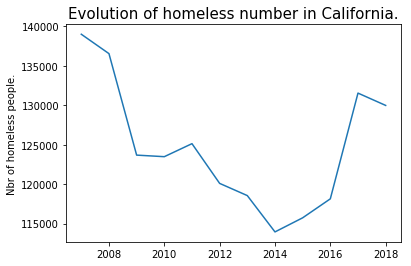

In [180]:
#we visualize it's evolution through the years
fig, ax = plt.subplots()

ax.plot( np.arange(2007, 2019), california)
ax.set_title('Evolution of homeless number in California.', size=15)
ax.set_ylabel('Nbr of homeless people.')

We can see that it's evolution is stable, even decreasing a bit since in 11 years, the number of homeless people decreased by 9014

If we do the same for New York:

Text(0,0.5,'Nbr of homeless people.')

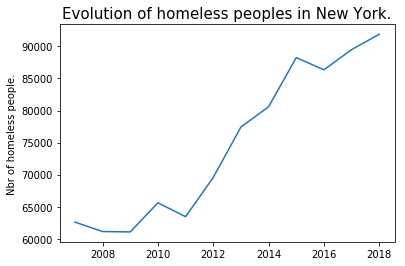

In [181]:
#we select the New York row and reverse it to go from 2007 to 2018
NewYork = np.array(OverallHomeless.loc[OverallHomeless.State == 'New York'].set_index('State').T["New York"].tolist())[::-1]
#we visualize the evolution
fig, ax = plt.subplots()

ax.plot( np.arange(2007, 2019), NewYork)
ax.set_title('Evolution of homeless peoples in New York.', size=15)
ax.set_ylabel('Nbr of homeless people.')

We can see that unlike California, in New York, the number of homless people is increasing. Going from 62'601 in 2007 to 91'897 in 2018.

#### Conclusion

We now have a dataframe (i.e. output) with the number of homeless people for all the USA states and it's evolution through time that will surely help us to develop our developmental index.

In [184]:
#saving output
OverallHomeless.to_pickle('Pickles/homeless.pickle')

In [185]:
OverallHomeless.head()

State  Overall Homeless, 2018  Overall Homeless, 2017  \
0      Alaska                    2016                    1845   
1     Alabama                    3434                    3793   
2    Arkansas                    2712                    2467   
3     Arizona                    9865                    8947   
4  California                  129972                  131532   

  Overall Homeless, 2016 Overall Homeless, 2015 Overall Homeless, 2014  \
0                   1940                   1956                   1784   
1                   4111                   3970                   4561   
2                   2463                   2560                   2936   
3                   9707                   9896                  10495   
4                 118142                 115738                 113952   

  Overall Homeless, 2013 Overall Homeless, 2012 Overall Homeless, 2011  \
0                   1946                   1913                   2128   
1                   4689                   5209                   5558   
2                   3812                   4214                   3424   
3                  10562                  11302                  10504   
4                 118552                 120098                 125128   

  Overall Homeless, 2010 Overall Homeless, 2009 Overall Homeless, 2008  \
0                   1863                   1992                   1646   
1                   6046                   6080                   5387   
2                   2762                   2852                   3255   
3                  13711                  14721                  12488   
4                 123480                 123678                 136531   

  Overall Homeless, 2007  
0                   1642  
1                   5452  
2                   3836  
3                  14646  
4                 138986

### McDonalds and other metrics
In this section we are going to scrape and analyze the data coming from the website https://eu.usatoday.com/story/money/business/2018/09/13/mcdonalds-states-most-stores/37748287/.

It is an article of the journal USA Today (one of the three more read journals in the US, with The Wall Street Journal and The New York Times [1]).

It shows some important statistics like the adult obesity rate, the percentage of people consuming vegetables less than daily, the median income and the number of McDonalds per capita. The article explains how difficult is it to find a correlation among the number of fast food per capita, and the unhealthy lifestyle (obesity rate), but still, for our purpose it may turn out to be an important factor along the other more important statistics, so at the moment we may want to keep this information and decide later to discard it.

The choice to use the chain McDonalds to estimate the HDI is not new [2]: it was shown how countries where the price of a Big Mac tend to be higher usually are the ones with the higher standard of quality.

We may therefore try to assume that the places with the least number of McDonalds tend to be the ones in which people live better. But it has to be said that this assumption is totally unfounded, and needs to be further verified. (This can be done, for instance, seeing if there is any sort of correlation among the number of Mc Donalds and the actual HDI index of States).

In [186]:
from requests import get
import pandas as pd
import numpy as np
from matplotlib.ticker import MaxNLocator
import matplotlib.pyplot as plt
import re
from tqdm.notebook import tqdm
from bs4 import BeautifulSoup

In [187]:
# We start by getting the list of states in the United States
states_json = pd.read_json('Data/states.json')
states = []

for row in states_json['data']:
    states.append(row['State'])
    
# We create a DataFrame with states (it will come handy when looking for missing values).
states_df = pd.DataFrame({"State": states})
states_df.head()

State
0     Alabama
1      Alaska
2     Arizona
3    Arkansas
4  California

#### Scraping of data
We start our analysis by scraping the results from Usa Today's website.
We notice that the page shows a certain regularity, with the name of each coutry listed in a `<h3>` tag, followed by the information about that country. The information is enclosed in `<strong>` brackets: 
- first information: number of McDonald's per 100k inhabitants.
- second information: adult obesity percentage rate
- third information: people consuming vegetables less than daily (percentage)

In [188]:
# Get the page and scrape it with BeautifulSoup
usa_today_page = get('https://eu.usatoday.com/story/money/business/2018/09/13/mcdonalds-states-most-stores/37748287/')
usa_today_page = BeautifulSoup(usa_today_page.text, 'html.parser')

# find all h3 tags (they contain the name of the state)
titles = usa_today_page.find_all('h3', class_='presto-h3')

stats = []
for title in tqdm(titles):
    # Skip None rows (they are advertisement or bad formatted rows).
    if type(title) != 'NoneType' and re.findall("\d+\. [A-Z]", title.text):
        state = title.text
        # state is in format: number. name of state
        # Therefore we split by whitexpace, and keep from the second element on.
        state = " ".join(state.split(" ")[1:])
        p = title.find_next_sibling('p')
        # This while is used to skip random content found between 
        # the title <h3> ad the content <p>, like ad and so on.
        while(not p.text):
            p = p.find_next_sibling('p')
        
        points = p.text.split("•")
        
        try:
            # use regex to estrapolate the numbers we need
            mc_donalds_per_100k_inhabitants = re.findall("\d+.\d+", points[1])[0]
            adult_obesity_rate = re.findall("\d+.\d+", points[2])[0]
            vegetables = re.findall("\d+.\d+", points[3])[0]
            median_income = re.findall("\$\d+,\d+", points[4])[0]
            stat = {
                "State": state,
                "mc_donalds_per_100k": mc_donalds_per_100k_inhabitants,
                "adult_obesity_rate": adult_obesity_rate,
                "eating_vegetables_daily": vegetables,
                "median_income": median_income
            }

            stats.append(stat)
        except:
            # There are still some emtpy/not well formatted lines in the page, just skip them
            pass        

In [189]:
mc_donalds_df = pd.DataFrame(stats)  # Create DataFrame
print(mc_donalds_df.dtypes)   # Print types of rows (objects are strings)
mc_donalds_df.head() 

State                      object
mc_donalds_per_100k        object
adult_obesity_rate         object
eating_vegetables_daily    object
median_income              object
dtype: object


State mc_donalds_per_100k adult_obesity_rate  \
0  Rhode Island                 2.9               27.2   
1    New Jersey                 3.0               25.9   
2      New York                 3.1               25.0   
3    California                 3.3               22.7   
4  North Dakota                 3.3               31.8   

  eating_vegetables_daily median_income  
0                    23.5       $60,596  
1                    22.1       $76,126  
2                    22.4       $62,909  
3                    18.6       $67,739  
4                    27.5       $60,656

#### Data cleaning
We can see that all columns are listed as strings. Therefore we proceed to clean it.

In [190]:
mc_donalds_df.mc_donalds_per_100k = mc_donalds_df['mc_donalds_per_100k'].apply(lambda x: float(x))  # Cast to float
mc_donalds_df.adult_obesity_rate = mc_donalds_df['adult_obesity_rate'].apply(lambda x: float(x))   # Cast to float
mc_donalds_df.eating_vegetables_daily = mc_donalds_df['eating_vegetables_daily'].apply(lambda x: float(x))   # Cast to float
mc_donalds_df.median_income = mc_donalds_df['median_income'].apply(lambda x: float("".join(x.split("$")[1].split(","))))  # Remove $ sign and comma, and cast to float

In [191]:
print(mc_donalds_df.dtypes)  # Types should be correct now!
mc_donalds_df.head()

State                       object
mc_donalds_per_100k        float64
adult_obesity_rate         float64
eating_vegetables_daily    float64
median_income              float64
dtype: object


State  mc_donalds_per_100k  adult_obesity_rate  \
0  Rhode Island                  2.9                27.2   
1    New Jersey                  3.0                25.9   
2      New York                  3.1                25.0   
3    California                  3.3                22.7   
4  North Dakota                  3.3                31.8   

   eating_vegetables_daily  median_income  
0                     23.5        60596.0  
1                     22.1        76126.0  
2                     22.4        62909.0  
3                     18.6        67739.0  
4                     27.5        60656.0

#### Analysis of completeness:
We merge the data into the dataframe of states, and check whether there are any null values (to check if any state is not represented in out statistics).

In [192]:
# We perform a left join, so that missing values will have the right columns set as null
mc_donalds_state_df = states_df.merge(mc_donalds_df, how='left', left_on='State', right_on="State")
mc_donalds_state_df.head()

State  mc_donalds_per_100k  adult_obesity_rate  \
0     Alabama                  5.0                34.7   
1      Alaska                  4.2                29.4   
2     Arizona                  4.1                26.7   
3    Arkansas                  5.8                34.6   
4  California                  3.3                22.7   

   eating_vegetables_daily  median_income  
0                     27.8        46257.0  
1                     18.9        76440.0  
2                     20.5        53558.0  
3                     28.1        44334.0  
4                     18.6        67739.0

In [193]:
# We check for missing values in any column (the ones merged before, where no information
# for the state was found)
mc_donalds_state_df[mc_donalds_state_df.isna().any(axis=1)]

State  mc_donalds_per_100k  adult_obesity_rate  \
8  District of Columbia                  NaN                 NaN   

   eating_vegetables_daily  median_income  
8                      NaN            NaN

We can clearly see that the District of Columbia is not listed in the website.
Therefore, we need to find the information somewhere else:

#### Number of McDonalds:
According to the website https://foursquare.com/locations/mcdonalds/washington-dc, there are 84 McDonalds shop in the city of Washington DC. Among them, only 31 are actually in the District of Columbia. (Counted manually)

The population of the District of Columbia is 702,445 [3]

This allows us to see that the number of McDonalds every 100k inhabitants is: 

31 / (702445 / 100000) = 4.4

#### Median Income
$82,372 according to [4]

#### Adult obesity rate
24.7% according to [5]

#### People eating vegetables daily
In order to find this missin figure, further effort must be spent. We didn't manage, in fact, to find this figure online, therefore we had to make an estimation for it: first, we found a report made by the Centre for Disease Prevention and Control [6] which lists the median intake frequency of vegetables in all US states. 
If we can show that this data is highly correlated with the figure we are looking for, we can estimate the missing value using the values of the new table.

In [194]:
# Get and parse the page with requests and BeautifulSoup
cdc_page = get('https://www.cdc.gov/mmwr/volumes/66/wr/mm6645a1.htm?s_cid=mm6645a1_w&utm_source=STAT+Newsletters&utm_campaign=f26644060f-MR&utm_medium=email&utm_term=0_8cab1d7961-f26644060f-150444909')
cdc_page = BeautifulSoup(cdc_page.text, 'html.parser')

# Find the first table (it's the one with the information we need)
table = cdc_page.find_all('table')[0] 

# Use pandas function read_html, which automagically parses an html table into a well formatted DataFrame
table_scraped = pd.read_html(str(table))

table_df = table_scraped[0][1:]   # Skip the first row which is garbage

states = table_df['Jurisdiction']
vegetables = table_df['Median daily intake frequency']['Vegetable']

# We merge the state name and the median daily intake frequency of vegetable into our dataframe
states_vegetables = states.merge(vegetables, left_index=True, right_index=True)

print(states_vegetables.dtypes)
states_vegetables.head()

Jurisdiction     object
Vegetable       float64
dtype: object


Jurisdiction  Vegetable
1      Alabama        1.5
2       Alaska        1.8
3      Arizona        1.7
4     Arkansas        1.5
5   California        1.8

We can now merge the new table into the old table, and see the correlation ratio. 

In [195]:
# We merge the two datasets (right on states_vegetables, as it has no missing values)
mc_donalds_state_vegetable_df = mc_donalds_state_df.merge(states_vegetables, right_on='Jurisdiction', left_on='State').drop('Jurisdiction', axis=1)
mc_donalds_state_vegetable_df.head()

State  mc_donalds_per_100k  adult_obesity_rate  \
0     Alabama                  5.0                34.7   
1      Alaska                  4.2                29.4   
2     Arizona                  4.1                26.7   
3    Arkansas                  5.8                34.6   
4  California                  3.3                22.7   

   eating_vegetables_daily  median_income  Vegetable  
0                     27.8        46257.0        1.5  
1                     18.9        76440.0        1.8  
2                     20.5        53558.0        1.7  
3                     28.1        44334.0        1.5  
4                     18.6        67739.0        1.8

In [196]:
# We finally compute the correlation ratio
corr = mc_donalds_state_vegetable_df.eating_vegetables_daily.corr(mc_donalds_state_vegetable_df.Vegetable)
print("The correlation among the two vegetable indicators is {}".format(corr))

The correlation among the two vegetable indicators is -0.9470000686362137


We can clearly see that the correlation (negative) is very high. We plot the scatterplot for further safety:

Text(0.5,0,'Percentage of people not eating vegetables daily')

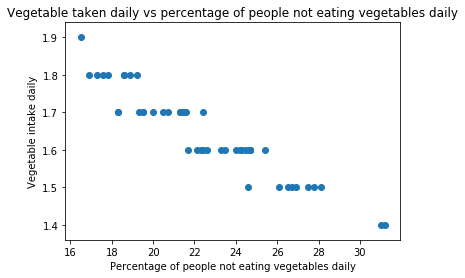

In [197]:
plt.scatter(mc_donalds_state_vegetable_df.eating_vegetables_daily, mc_donalds_state_vegetable_df.Vegetable)
plt.title("Vegetable taken daily vs percentage of people not eating vegetables daily")
plt.ylabel("Vegetable intake daily")
plt.xlabel("Percentage of people not eating vegetables daily")

In [198]:
# We select the District of Columbia one, to see with which value we can substitute it.
dc_vegetable = mc_donalds_state_vegetable_df.loc[mc_donalds_state_vegetable_df.State == 'District of Columbia', 'Vegetable']

dc_vegetable = next(iter(dc_vegetable), "No DC Found")

print("The value of Vegetable median intake frequency for District of Columbia is: {}".format(dc_vegetable))

print("the other similar countries are: ")
mc_donalds_state_vegetable_df.loc[mc_donalds_state_vegetable_df.Vegetable == dc_vegetable, ['State', 'Vegetable']]

The value of Vegetable median intake frequency for District of Columbia is: 1.9
the other similar countries are: 


State  Vegetable
8   District of Columbia        1.9
37                Oregon        1.9

Therefore, we can conclude that the missing value for the average of people not eating vegetable daily in the District of Columbia should be very small: it may be assumed to be similar to the one of Oregon (actually they top together the standing).

In [199]:
# We can finally create the District of Columbia cell

# we select the value for people eating vegetable daily in Oregon, it will be the value we use in DC
eating_veg_daily_oregon = next(iter(mc_donalds_state_vegetable_df.loc[mc_donalds_state_vegetable_df.State == 'Oregon', 'eating_vegetables_daily']))
new_df = pd.DataFrame([{
    'State': 'District of Columbia',  # Name
    'mc_donalds_per_100k': 4.4,   # Taken from the web
    'adult_obesity_rate': 24.7,   # Taken from the web 
    'eating_vegetables_daily': eating_veg_daily_oregon,   # Estimated in the above cells
    'median_income': 82372,   # Taken from the web
    'Vegetable': dc_vegetable   # taken from the gov dataset
}])

# Substitute the District of Columbia cell
df_no_dc = mc_donalds_state_vegetable_df[mc_donalds_state_vegetable_df.State != "District of Columbia"]  
df = pd.concat([df_no_dc, new_df], axis = 0)

In [200]:
df.head()

State  mc_donalds_per_100k  adult_obesity_rate  \
0     Alabama                  5.0                34.7   
1      Alaska                  4.2                29.4   
2     Arizona                  4.1                26.7   
3    Arkansas                  5.8                34.6   
4  California                  3.3                22.7   

   eating_vegetables_daily  median_income  Vegetable  
0                     27.8        46257.0        1.5  
1                     18.9        76440.0        1.8  
2                     20.5        53558.0        1.7  
3                     28.1        44334.0        1.5  
4                     18.6        67739.0        1.8

We can further verify that our substitution was successful:

In [201]:
df[df.isna().any(axis=1)]

Empty DataFrame
Columns: [State, mc_donalds_per_100k, adult_obesity_rate, eating_vegetables_daily, median_income, Vegetable]
Index: []

In [202]:
df = df.sort_values(by=['State'], ascending=True).reset_index()  # We sort again by state name
df.head()

index       State  mc_donalds_per_100k  adult_obesity_rate  \
0      0     Alabama                  5.0                34.7   
1      1      Alaska                  4.2                29.4   
2      2     Arizona                  4.1                26.7   
3      3    Arkansas                  5.8                34.6   
4      4  California                  3.3                22.7   

   eating_vegetables_daily  median_income  Vegetable  
0                     27.8        46257.0        1.5  
1                     18.9        76440.0        1.8  
2                     20.5        53558.0        1.7  
3                     28.1        44334.0        1.5  
4                     18.6        67739.0        1.8

#### Save Pickle
Before doing the analysis, we save the DataFrame in a pickle file, so that we can merge all datasets later in `Milestone2.ipynb` notebook 

In [203]:
df.to_pickle("Pickles/mc_donalds.pickle")

#### Analysis
We can perform now some statistics to see if there are any outliers

Text(0,0.5,'Number of mc Donalds (every 100k inhabitabts)')

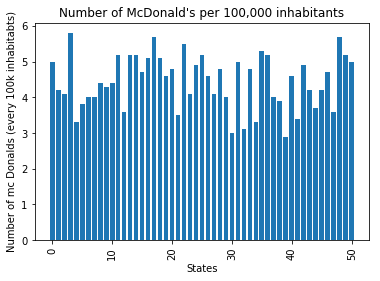

In [204]:
plt.xticks(rotation=90)   # Rotate x labels, otherwise they would become intellegible.
plt.title("Number of McDonald's per 100,000 inhabitants")
plt.bar(df.index, df.mc_donalds_per_100k)
plt.xlabel("States")
plt.ylabel("Number of mc Donalds (every 100k inhabitabts)")

<BarContainer object of 51 artists>

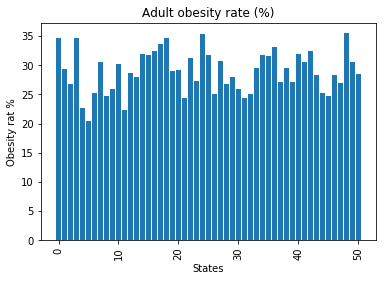

In [205]:
plt.xticks(rotation=90)
plt.title("Adult obesity rate (%)")
plt.xlabel("States")
plt.ylabel("Obesity rat %")
plt.bar(df.index, df.adult_obesity_rate)

<BarContainer object of 51 artists>

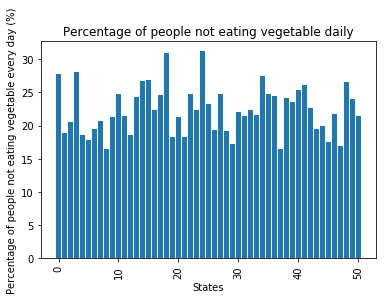

In [206]:
plt.xticks(rotation=90)
plt.title("Percentage of people not eating vegetable daily")
plt.xlabel("States")
plt.ylabel("Percentage of people not eating vegetable every day (%)")
plt.bar(df.index, df.eating_vegetables_daily)

<BarContainer object of 51 artists>

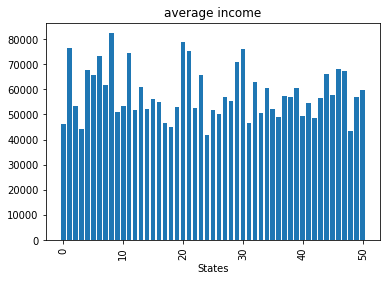

In [207]:
plt.xticks(rotation=90)
plt.title("average income")
plt.xlabel("States")
plt.ylabel("")
plt.bar(df.index, df.median_income)

We can see that fortunately there are no outliers. Therefore we can try to understand if there are some values which may influence each other.

In [208]:
df.corr()

index  mc_donalds_per_100k  adult_obesity_rate  \
index                    1.000000            -0.063636            0.099316   
mc_donalds_per_100k     -0.063636             1.000000            0.548133   
adult_obesity_rate       0.099316             0.548133            1.000000   
eating_vegetables_daily  0.023291             0.415053            0.766348   
median_income           -0.148000            -0.502974           -0.633028   
Vegetable               -0.079214            -0.386006           -0.746858   

                         eating_vegetables_daily  median_income  Vegetable  
index                                   0.023291      -0.148000  -0.079214  
mc_donalds_per_100k                     0.415053      -0.502974  -0.386006  
adult_obesity_rate                      0.766348      -0.633028  -0.746858  
eating_vegetables_daily                 1.000000      -0.582964  -0.947860  
median_income                          -0.582964       1.000000   0.546742  
Vegetable                              -0.947860       0.546742   1.000000

Very interestingly (actually the article [1] has already pointed it out) there is no particular correlation among the McDonald's distribution of restaurants and the obesity rate. But this observation actually is outside the scope of this analysis.

Another correlation we may be interested is the one among the median income, and the adult obesity rate: in fact, there is a slight negative correlation (-0.63) among the two figures.

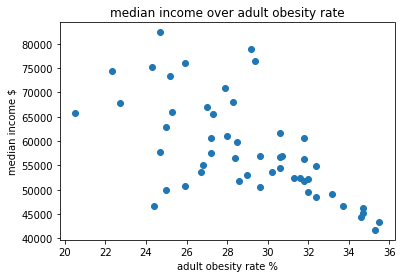

In [209]:
plt.title("median income over adult obesity rate")
plt.xlabel("adult obesity rate %")
plt.ylabel("median income $")
plt.scatter(df.adult_obesity_rate, df.median_income)

We can see that for "low" levels of obesity (below 30%), there is no correlation at all, instead for very high levels of obesity (over 30%) the two figures are clearly linearly dependent (the higher the obesity rate, the lower the median income).


- [1] https://en.wikipedia.org/wiki/USA_Today
- [2] https://en.wikipedia.org/wiki/Big_Mac_Index
- [3] https://en.wikipedia.org/wiki/Washington,_D.C only the population of the federal city
- [4] https://datausa.io/profile/geo/washington-dc/
- [5] https://stateofchildhoodobesity.org/states/dc/
- [6] https://www.cdc.gov/mmwr/volumes/66/wr/mm6645a1.htm?s_cid=mm6645a1_w&utm_source=STAT+Newsletters&utm_campaign=f26644060f-MR&utm_medium=email&utm_term=0_8cab1d7961-f26644060f-150444909

In [210]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Rent data

we dowloaded the 'Apartment-List-Rent-Data-State_2019-10' (csv) file from https://www.apartmentlist.com/rentonomics/rental-price-data/

In [211]:
#we load the data and quickly visualize it
df = pd.read_csv("Data/Apartment-List-Rent-Data-State_2019-10.csv")
df.head()

Location Location_Type Bedroom_Size  Price_2014_01  Price_2014_02  \
0  Alabama         State       Studio            573            573   
1  Alabama         State          1br            624            624   
2  Alabama         State          2br            758            758   
3  Alabama         State          3br           1013           1013   
4  Alabama         State          4br           1178           1178   

   Price_2014_03  Price_2014_04  Price_2014_05  Price_2014_06  Price_2014_07  \
0            574            574            575            576          578.0   
1            625            625            626            627          629.0   
2            759            759            760            762          765.0   
3           1014           1015           1016           1018         1022.0   
4           1179           1180           1182           1184         1188.0   

   ...  Price_2019_01  Price_2019_02  Price_2019_03  Price_2019_04  \
0  ...            612            610            609            613   
1  ...            666            664            663            667   
2  ...            809            807            805            811   
3  ...           1081           1078           1076           1083   
4  ...           1257           1254           1251           1260   

   Price_2019_05  Price_2019_06  Price_2019_07  Price_2019_08  Price_2019_09  \
0            618            622            622            621            620   
1            672            677            677            676            675   
2            817            823            823            822            820   
3           1091           1099           1100           1098           1095   
4           1269           1279           1279           1277           1274   

   Price_2019_10  
0            620  
1            675  
2            820  
3           1096  
4           1275  

[5 rows x 73 columns]

In [212]:
#we check for null values
df.isnull().values.any()

True

In [213]:
#we visualize where it is
null_columns=df.columns[df.isnull().any()]
df[df.isnull().any(axis=1)].head()

Location Location_Type Bedroom_Size  Price_2014_01  Price_2014_02  \
220  Vermont         State       Studio            793            794   
221  Vermont         State          1br            892            893   
222  Vermont         State          2br           1125           1126   
223  Vermont         State          3br           1488           1490   
224  Vermont         State          4br           1635           1637   

     Price_2014_03  Price_2014_04  Price_2014_05  Price_2014_06  \
220            794            796            798            801   
221            893            895            898            900   
222           1127           1130           1133           1136   
223           1490           1494           1498           1503   
224           1638           1642           1647           1651   

     Price_2014_07  ...  Price_2019_01  Price_2019_02  Price_2019_03  \
220            NaN  ...            862            861            858   
221            NaN  ...            970            968            965   
222            NaN  ...           1224           1221           1218   
223            NaN  ...           1619           1615           1611   
224            NaN  ...           1779           1775           1770   

     Price_2019_04  Price_2019_05  Price_2019_06  Price_2019_07  \
220            861            865            870            869   
221            969            973            978            977   
222           1222           1228           1235           1234   
223           1617           1624           1633           1631   
224           1776           1784           1794           1793   

     Price_2019_08  Price_2019_09  Price_2019_10  
220            867            864            860  
221            975            971            967  
222           1231           1226           1221  
223           1628           1621           1614  
224           1789           1782           1774  

[5 rows x 73 columns]

All the missing values are for the Vermont state. Since the rent price doesn't vary a lot, we will simply fill the missing values with the 'Price_2014_06' for the first block of missing values and with 'Price_2015_06' column for the second block of missing values since these columns are only one month before the Nan values.

In [214]:
null_columns

Index(['Price_2014_07', 'Price_2014_08', 'Price_2014_09', 'Price_2014_10',
       'Price_2014_11', 'Price_2014_12', 'Price_2015_01', 'Price_2015_02',
       'Price_2015_03', 'Price_2015_04', 'Price_2015_05', 'Price_2015_06',
       'Price_2015_07', 'Price_2015_10', 'Price_2015_11', 'Price_2015_12',
       'Price_2016_01'],
      dtype='object')

In [215]:
#fill missing values for first block of 'NaN'
for col in null_columns[:13]:
    df[col] = df[col].fillna(df.Price_2014_06)

In [216]:
#fill missing values for second block of 'NaN'
for col in null_columns[13:]:
    df[col] = df[col].fillna(df.Price_2015_09)

In [217]:
#we check for null values
df.isnull().values.any()

False

In [218]:
#we verify that all the locations are States, we only want to compute states prices
if((df.Location_Type.to_numpy()!='State').sum()==0): print("All locations are States so we can drop this column")

All locations are States so we can drop this column


In [219]:
df = df.drop('Location_Type', axis=1)

We can see that there are several rows for each states and several columns for each year. We will start by averaging the price for each year.  
We will also remove the year 2019 since the two last months are not available yet.

#### Making one column per year

In [220]:
#drop 2019 columns
df = df.drop(['Price_2019_01', 'Price_2019_02', 'Price_2019_03', 'Price_2019_04', 'Price_2019_05',\
              'Price_2019_06', 'Price_2019_07', 'Price_2019_08', 'Price_2019_09', 'Price_2019_10'], axis=1)
#average each remaning year
for year in np.arange(2014, 2019):
    #add a column for the entire year
    df['Price_'+str(year)] = 0
    for month in np.arange(1, 13):
        #update the year price for each month and remove the month from the dataframe
        df['Price_'+str(year)] = df['Price_'+str(year)]+df['Price_'+str(year)+'_'+str(month).zfill(2)]/12
        df = df.drop('Price_'+str(year)+'_'+str(month).zfill(2), axis=1)
df.head()

Location Bedroom_Size   Price_2014   Price_2015   Price_2016   Price_2017  \
0  Alabama       Studio   576.916667   580.083333   584.083333   598.083333   
1  Alabama          1br   628.000000   631.500000   635.833333   650.833333   
2  Alabama          2br   762.833333   767.166667   772.333333   790.916667   
3  Alabama          3br  1019.500000  1025.250000  1032.166667  1056.833333   
4  Alabama          4br  1185.666667  1192.500000  1200.416667  1229.333333   

    Price_2018  
0   605.416667  
1   659.000000  
2   800.666667  
3  1069.666667  
4  1244.333333

#### Making one column per Bedroom_Size type

To have one column per Bedroom_Size type for each year, we will:  
- group by Bedroom_Size
- rename columns of price for each year according to each Bedroom_Size
- remove the Bedroom_Size column
- join each group on 'Location'

In [221]:
#creating the output dataframe (we will join on this dataframe)
output = pd.DataFrame(data=df.Location.unique(),
              index=range((df.Location.unique()).size),
              columns=['Location'])
output.head()

Location
0     Alabama
1      Alaska
2     Arizona
3    Arkansas
4  California

In [222]:
#we first group by 'Bedroom_Size'
gdf = df.groupby("Bedroom_Size")
for name, group in gdf:
    #for each 'Bedroom_Size' type we rename the columns accordingly
    group = group.rename(columns={"Price_2014": "Price_2014_"+name, "Price_2015": "Price_2015_"+name,\
                                  "Price_2016": "Price_2016_"+name, "Price_2017": "Price_2017_"+name,\
                                 "Price_2018": "Price_2018_"+name})
    #we remove the 'Bedroom_Size' column
    group = group.drop('Bedroom_Size', axis=1)
    #we join this group to the output
    output = pd.merge(output, group, on ='Location')
output.head()

Location  Price_2014_1br  Price_2015_1br  Price_2016_1br  Price_2017_1br  \
0     Alabama      628.000000      631.500000      635.833333      650.833333   
1      Alaska      973.500000      973.750000      952.083333      937.166667   
2     Arizona      720.416667      748.083333      773.583333      805.583333   
3    Arkansas      550.500000      555.083333      558.416667      569.416667   
4  California     1224.583333     1300.083333     1344.250000     1393.916667   

   Price_2018_1br  Price_2014_2br  Price_2015_2br  Price_2016_2br  \
0      659.000000      762.833333      767.166667      772.333333   
1      930.500000     1245.166667     1245.250000     1217.750000   
2      828.000000      910.333333      944.916667      976.916667   
3      571.166667      695.416667      701.250000      705.166667   
4     1426.333333     1561.583333     1657.666667     1714.333333   

   Price_2017_2br  ...  Price_2014_4br  Price_2015_4br  Price_2016_4br  \
0      790.916667  ...     1185.666667     1192.500000     1200.416667   
1     1198.583333  ...     2112.750000     2113.166667     2066.333333   
2     1017.583333  ...     1526.750000     1584.666667     1638.750000   
3      719.166667  ...     1103.500000     1112.833333     1119.416667   
4     1777.416667  ...     2512.583333     2667.166667     2758.083333   

   Price_2017_4br  Price_2018_4br  Price_2014_Studio  Price_2015_Studio  \
0     1229.333333     1244.333333         576.916667         580.083333   
1     2033.500000     2019.500000         852.000000         852.083333   
2     1706.833333     1754.416667         610.000000         633.250000   
3     1141.500000     1144.833333         505.583333         509.666667   
4     2859.916667     2926.333333        1040.833333        1104.750000   

   Price_2016_Studio  Price_2017_Studio  Price_2018_Studio  
0         584.083333         598.083333         605.416667  
1         833.166667         820.083333         814.333333  
2         655.000000         681.833333         701.000000  
3         512.833333         522.666667         524.666667  
4        1142.583333        1184.666667        1212.333333  

[5 rows x 26 columns]

We now have an output with prices of rent from 2014 to 2018 and for 5 different types of apartment.

#### Visualization

From https://www.apartmentlist.com/rentonomics/national-rent-data/, we can see that Arizona's rent increases a lot (+3.5% since 2014) and that West Virginia's rent is the one that decreases the most (-0.8% from 2014).  
We will visualize one of our 'Bedroom_Size' evolution to see if it fit with the article.

Text(0,0.5,'rent price.')

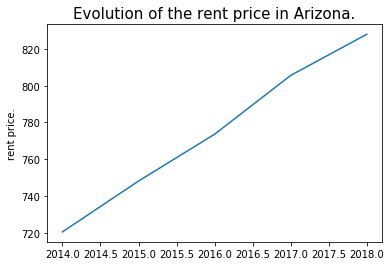

In [223]:
#we select the price of a single bedroom rent from 2014 to 2018 in Arizona
values = output.loc[output.Location == 'Arizona'][['Price_2014_1br', 'Price_2015_1br', 'Price_2016_1br', 'Price_2017_1br', 'Price_2018_1br']]
values = np.array(values)[0]
years = np.arange(2014, 2019)

#we see the evolution through the years
fig, ax = plt.subplots()

ax.plot(years, values)
ax.set_title('Evolution of the rent price in Arizona.', size=15)
ax.set_ylabel('rent price.')

So the price indeed increases in Arizona.  
What about <a href="https://www.youtube.com/watch?v=1vrEljMfXYo" target="_blank">West Virginia</a> ?

Text(0,0.5,'rent price.')

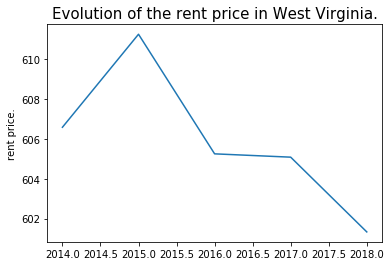

In [224]:
#we select the price of a single bedroom rent from 2014 to 2018 in West Virginia
values = output.loc[output.Location == 'West Virginia'][['Price_2014_1br', 'Price_2015_1br', 'Price_2016_1br', 'Price_2017_1br', 'Price_2018_1br']]
values = np.array(values)[0]
years = np.arange(2014, 2019)

#we see the evolution through the years
fig, ax = plt.subplots()

ax.plot(years, values)
ax.set_title('Evolution of the rent price in West Virginia.', size=15)
ax.set_ylabel('rent price.')

As expected, the rent price decrease here.

After some discussion, we decided to select only the 2018 data.

In [225]:
output = output[["Location", "Price_2018_Studio", "Price_2018_1br", "Price_2018_2br", "Price_2018_3br", "Price_2018_4br"]]

#### Filling missing values

Values for Hawaii are missing. We will fill them using the rent price from this web site: https://www.rentdata.org/states/2018#map

The prices are not exactly the same as the one from the original web site but it's better to have small differences than having a missing value.

In [226]:
df2 = pd.DataFrame([['Hawaii', 1122, 1292, 1659, 2310, 2772 ]], columns=output.columns)
output = output.append(df2)

#### Saving output

In [227]:
#saving output
output = output.rename(columns = {
    "Location": "State"
})
output.to_pickle('Pickles/rent.pickle')

In [229]:
output.head()

State  Price_2018_Studio  Price_2018_1br  Price_2018_2br  \
0     Alabama         605.416667      659.000000      800.666667   
1      Alaska         814.333333      930.500000     1190.333333   
2     Arizona         701.000000      828.000000     1046.000000   
3    Arkansas         524.666667      571.166667      721.416667   
4  California        1212.333333     1426.333333     1818.916667   

   Price_2018_3br  Price_2018_4br  
0     1069.666667     1244.333333  
1     1682.166667     2019.500000  
2     1512.333333     1754.416667  
3      977.583333     1144.833333  
4     2519.250000     2926.333333

### School dataset

In order to reproduce and improve the data regarding the Human Development Index, we need to categorize USs' states by their level of instruction. 
One indicator which may turn to be significant to categorize the level of instruction in each country is probably the average cost of private schools (both for high school and elementary school).
We found an article on the website https://www.privateschoolreview.com/tuition-stats/private-school-cost-by-state which keeps track of these two statistics, and in order to convert the data present on their website to usable data (pandas DataFrame) we need to scrape the information from the web.

In [230]:
from requests import get
import pandas as pd
import numpy as np
from matplotlib.ticker import MaxNLocator
import matplotlib.pyplot as plt
import re
from bs4 import BeautifulSoup

We now focus on extracting data from the website  https://www.privateschoolreview.com/tuition-stats/private-school-cost-by-state

#### Names of states
First we download the list of names of the US states from the link. 
https://gist.githubusercontent.com/mshafrir/2646763/raw/8b0dbb93521f5d6889502305335104218454c2bf/states_titlecase.json

In [231]:
states_json = pd.read_json('Data/states.json')  # Get the json with state names
states = []

for row in states_json['data']:
    states.append(row['State'])   # Add the names to a list.
    
states_df = pd.DataFrame({"State": states})   # Create a DataFrame with the list of states.
states_df.head()

State
0     Alabama
1      Alaska
2     Arizona
3    Arkansas
4  California

#### Format of the webpage

We noticed that the webpage has the following format: states are listed in a table, and in every row there are 4 tds:
- td[0] is a link with the name of the state
- td[1] is the average tuition
- td[2] is the average high school tuition
- td[3] is the average elementary school tuition

In [232]:
# Site to scrape
privateschoolreview = ' https://www.privateschoolreview.com/tuition-stats/private-school-cost-by-state'

# Get the page and parse it with BeautifulSoup
school_page = get(privateschoolreview)
school_page = BeautifulSoup(school_page.text,'html.parser')

# Find the table in the page (it is the table which contains the information we need)
table = school_page.find('table', class_='tuition-list')

# Get rows in the table
rows = table.find_all('tr', class_='table_row row_click')

tuition_fees = []

for row in rows:
    # Skip empty Rows (page is not well formatted)
    if type(row) != 'NoneType':
        # Information are stored in table data cells.
        tds = row.find_all('td')
        
        state = tds[0].find('a').text
        high_school_fee = tds[2].text
        elementary_school_fee = tds[3].text
        
        # Create a new object with the right information and add it to the list.
        tuition = {
            'State': state,
            'High_School_Fee': high_school_fee,
            'Elementary_School_Fee': elementary_school_fee
        }
        tuition_fees.append(tuition)

# Create a DataFrame
tuition_fees_df = pd.DataFrame(tuition_fees)
tuition

{'State': 'West Virginia',
 'High_School_Fee': '$5,375',
 'Elementary_School_Fee': '$4,506'}

#### Analysis of the data
Before proceeding further, we first check whether all states are listed in the new dataframe.

In [233]:
# We merge the DataFrame with the state DataFrame created at the beginning
# We do a left join (on the states DataFrame) so that states missing in tuition_fees_df
# are still going to be present (but with null value)
states_merged = states_df.merge(tuition_fees_df, how='left', right_on='State', left_on='State')
print(len(states_merged))
# Select states which have null values for High_School_Fee (meaning that the left join)
# couldn't find the tuition fees values for that state.
absent_states = states_merged[~states_merged.High_School_Fee.notnull()]
len(absent_states)

51


3

We can clearly see that the dataset is not complete, as four states lack the high school and the elementary school average fee.

Let't try to get this data out from the same website: analyzing deeper the website, we discovered that the same data is present on a state basis under the link https://www.privateschoolreview.com/tuition-stats/state-name

The names of the states must be turned into lowercase, substituting whitespaces with character dash ("-").

In [234]:
# We turn the state name into lowercase, and substitute whitespaces with dashes
lowercased_dashed_states = absent_states.State.apply(lambda x: '-'.join(x.lower().split(' ')))
real_names = absent_states.State 

# We create a dataframe with column for the real name  and the lowercased and dashed name
lowercased_dashed_states_df = pd.DataFrame({
    'lowercased_dashed_name': lowercased_dashed_states,
    'real_name': real_names
})

lowercased_dashed_states_df

lowercased_dashed_name     real_name
34           north-dakota  North Dakota
41           south-dakota  South Dakota
50                wyoming       Wyoming

#### Then we can scrape the new webpages to look for the missing information:
- The information we are looking for lies in the `div` with `class='school_notes_overview'`
- It is the second `<li>` of an unordered list `<ul>` of `class='highlights_row'` 
- The first price (regex `re'\$\d+(,\d+)?'`) is the elementary school price, and the second price is the high school tuition fee. 

In [235]:
base_url_single_state = 'https://www.privateschoolreview.com/tuition-stats/'

for index, row in lowercased_dashed_states_df.iterrows():
    real_name = row['real_name']
    state_lowercased_dashed = row['lowercased_dashed_name']
    
    # First get the page and scrape it with BeautifulSoup
    tuition_per_state = get(base_url_single_state + state_lowercased_dashed)
    html_page_tuition_per_state = BeautifulSoup(tuition_per_state.text,'html.parser')
    
    # find the correct div with class school_notes_overview, and select the <ul> element
    school_notes_overview = html_page_tuition_per_state.find('div', class_='school_notes_overview').find('ul')
    
    # get second <li> of class 'highlights_row'
    second_li = school_notes_overview.find_all('li', class_='highlights_row')[1].text
    print("{}: {}".format(real_name,second_li))
    
    # apply the regex re'\$\d+' (it should find both the elementary fee and the high school fee)
    occurrences = re.findall('\$\d+,\d+', second_li)
    elementary_fee, high_school_fee = occurrences[0], occurrences[1]
    
    new_fee = {
        'State': real_name,
        'High_School_Fee': high_school_fee,
        'Elementary_School_Fee': elementary_fee
    }
    # Update the tuition_fees_df with the newly scraped information
    states_merged.loc[index] = new_fee
    
    

North Dakota: The private elementary school average is $2,550 per year and the private high school average is $9,100 per year.
South Dakota: The private elementary school average is $3,029 per year and the private high school average is $6,717 per year.
Wyoming: The private elementary school average is $3,417 per year and the private high school average is $15,417 per year.


#### Here we can see that the missing values has been correctly substituted

In [236]:
states_merged.loc[absent_states.index]

State High_School_Fee Elementary_School_Fee
34  North Dakota          $9,100                $2,550
41  South Dakota          $6,717                $3,029
50       Wyoming         $15,417                $3,417

#### Now we have all the data
We can start converting the input into a more usable format.
For instance, the tuition fee is a string containing the characters `$` followed by a number, with the thousand digits separated by a comma.
We can therefore cast this number to an integer number.

In [237]:
# Remove '$' and ',' and convert the resulting number into an integer (for both Elementary School and High School)
high_school_fees = states_merged.High_School_Fee.apply(lambda x: int("".join(x.split('$')[1].split(','))) )
elementary_school_fees = states_merged.Elementary_School_Fee.apply(lambda x: int("".join(x.split('$')[1].split(','))) )

states_merged.High_School_Fee = high_school_fees
states_merged.Elementary_School_Fee = elementary_school_fees

tuition_fees_df = states_merged
tuition_fees_df.head()

State  High_School_Fee  Elementary_School_Fee
0     Alabama             7718                   6388
1      Alaska             6118                   7544
2     Arizona            17339                   6283
3    Arkansas             6680                   4698
4  California            19317                  11363

#### Save pickle
Before doing any kind of Analysis, we save the DataFrame in a pickle file so that it can be merged with the other datasets in the notebook `Milestone2.ipynb`.

In [238]:
print(len(tuition_fees_df))
tuition_fees_df.to_pickle('Pickles/tuition_fees.pickle')

51


#### Analysis and description of dataset:
Now that the data is cleaned and complete, we can start developing some statistics over it.
For instance, we may want to plot a chart to show if there are any outliers (fees incredibly high or low).

<BarContainer object of 51 artists>

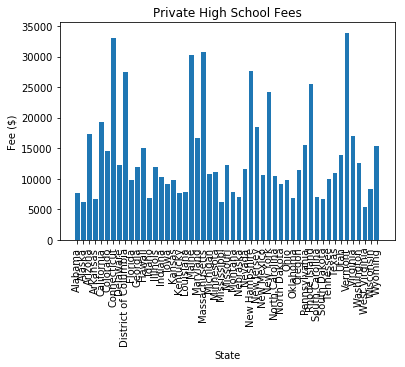

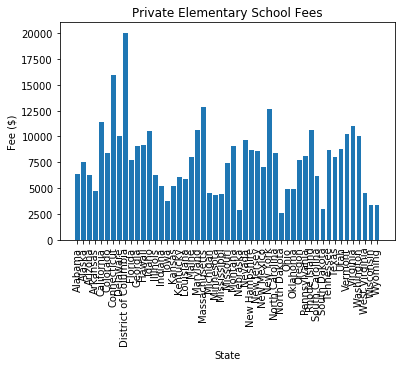

In [239]:
# Figure 1 (High School)
plt.figure(0)
plt.bar(tuition_fees_df.State, tuition_fees_df.High_School_Fee)
plt.title("Private High School Fees")
plt.xlabel("State")
plt.ylabel("Fee ($)")
plt.xticks(rotation=90)   # Rotate x labels (otherwise all state names become unreadable)

# Figure 2 (Elementary School)
plt.figure(1)
plt.title("Private Elementary School Fees")
plt.ylabel("Fee ($)")
plt.xticks(rotation=90)   # Rotate x labels (otherwise all state names become unreadable)
plt.xlabel("State")
plt.bar(tuition_fees_df.State, tuition_fees_df.Elementary_School_Fee)

We can notice that there are no unreasonable outliers values, although some countries show much higher values than others.

### Further analysis and expectations
We may now wonder whether the relation among the cost of high school and elementary is somehow linear: we may assume, in fact, that no matter the level of instruction, if in one state schools are more expensive, than it must be true for both elementary and high schools. We can double check this assumption by computing the correlation ratio among the two variables, and plotting a scatterplot with fees for high school and elementary school on the two axis.

In [240]:
corr = tuition_fees_df.corr()   # Get the correlation values
corr

High_School_Fee  Elementary_School_Fee
High_School_Fee               1.000000               0.680079
Elementary_School_Fee         0.680079               1.000000

(0, 20921.85985663083)

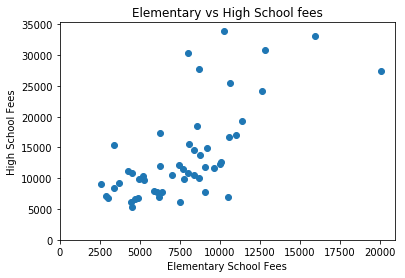

In [241]:
plt.scatter(tuition_fees_df.Elementary_School_Fee, tuition_fees_df.High_School_Fee)
plt.title("Elementary vs High School fees")
plt.xlabel("Elementary School Fees")
plt.ylabel("High School Fees")
plt.ylim(ymin=0)
plt.xlim(xmin=0)

We can see that our assumption is only partially true, in fact not only the correlation ratio is not particulary high (=~0.7), but even the plot doesn't show a precise linear relation among the two variables (although, it has to be said, there are no states where the cost of Elementary School and High School are at the opposite extremes).

#### Analysis
To conclude, what we may assume is that the cost of private schools can be a good candidate for the educational part of the Human Development Index. In fact, the fact that in some states the cost of education is higher could both mean that the life quality is lower (you have to be richer in order to be able to afford proper education, which leads to higher disparities among people of different level of wealth), or that the life quality is higher, as more people can afford the burden to sustain a high price for education.

As an example to clarify the above statement, think about what happens in Switzerland: the cost of most essential basics is much higher if compared to all other European countries, but only because the vast majority of people is actually richer and can afford to spend more money (Switzerland's HDI is in fact one of the highest in the world, 2nd as 2017[1]). 

[1] https://en.wikipedia.org/wiki/Switzerland

## Milestone 2: final analysis
In this milestone, our goal has been the collection, the cleaning and the analysis of the data in the datasets that we have decided to use for our project.

Given the high number of datasets that we have analyzed, we decided to perform the data cleaning process in separate files, in order to avoid one single notebook with a huge amount of lines of code, all independent from each other.

The notebook that we have written in order to clean and analyze the datasets are:
- crime.ipynb: a crime dataset is analyzed, we hope to extract good insights on the quality of life given the number of crimes committed in all states
- McDonalds.ipynb: a dataset of alimentation quality (number of fast food restaurants per state, obesity rate, people eating unhealthy).
- school_dataset.ipynb: a dataset with tuition fees of private schools and elementary schools. 
- homelessData.ipynb: We extracted homeless people figure from 2007 to 2018.
- rentData.ipynb: We selected the rent price of 2018 for 4 types of rents: 1, 2, 3 and 4 bedrooms, and studios.
- csv_datasets.ipynb: we analyze and extract features related to University rankings, life expectancy and personal income.
- diabetes_physical_activity_alcohol_obesity.ipynb : We extract and analyse prevalence of physical activity, alcohol, diabetes and obesity.

Every notebook output the final DataFrame in a Pickle file, which are all imported here.

In [242]:
import pandas as pd
import os

In [243]:
# We put all dataframes in a list
df_list = []

for pck in os.listdir("Pickles/"):
    # We avoid all files which are not pickle files (like .ipynb_checkpoints)
    if pck.endswith(".pickle"):
        print("Pickles/{}".format(pck))
        df_temp = pd.read_pickle("Pickles/" + pck)
        #Convert state names to lower case for future merges
        df_temp["State"] = df_temp["State"].apply(lambda r: r.lower())
        df_list.append(df_temp)
        print("The number of states is: {}".format(len(df_temp)))

Pickles/rent.pickle
The number of states is: 51
Pickles/homeless.pickle
The number of states is: 51
Pickles/tuition_fees.pickle
The number of states is: 51
Pickles/mc_donalds.pickle
The number of states is: 51
Pickles/Final_dataframe.pickle
The number of states is: 51
Pickles/hv_data.pickle
The number of states is: 51
Pickles/crime.pickle
The number of states is: 51
Pickles/pop_inc_exp_edu.pickle
The number of states is: 51


In [244]:
for i in range(len(df_list)-1):
    
    # We want to be sure that all DataFrames have the column "State"
    if "State" in df_list[i].columns and "State" in df_list[i+1].columns:
        print("Correct")
    else:
        print("Incorrect")
    # we merge the left dataframe (position i) into the right dataset (i+1)
    df_list[i+1] = df_list[i].merge(df_list[i+1], left_on="State", right_on='State')
    
# At the end, the last dataframe in the list is the final merged DataFrame.

Correct
Correct
Correct
Correct
Correct
Correct
Correct


In [245]:
df = df_list[-1]
df.columns

Index(['State', 'Price_2018_Studio_x', 'Price_2018_1br_x', 'Price_2018_2br_x',
       'Price_2018_3br_x', 'Price_2018_4br_x', 'Overall Homeless, 2018_x',
       'Overall Homeless, 2017', 'Overall Homeless, 2016',
       'Overall Homeless, 2015', 'Overall Homeless, 2014',
       'Overall Homeless, 2013', 'Overall Homeless, 2012',
       'Overall Homeless, 2011', 'Overall Homeless, 2010',
       'Overall Homeless, 2009', 'Overall Homeless, 2008',
       'Overall Homeless, 2007', 'High_School_Fee_x',
       'Elementary_School_Fee_x', 'index_x', 'mc_donalds_per_100k_x',
       'adult_obesity_rate_x', 'eating_vegetables_daily_x', 'median_income',
       'Vegetable_x', 'Price_2018_Studio_y', 'Price_2018_1br_y',
       'Price_2018_2br_y', 'Price_2018_3br_y', 'Price_2018_4br_y',
       'Overall Homeless, 2018_y', 'High_School_Fee_y',
       'Elementary_School_Fee_y', 'mc_donalds_per_100k_y',
       'adult_obesity_rate_y', 'eating_vegetables_daily_y', 'Vegetable_y',
       'diabetes_prevalence_

We noticed that some columns are repeated: therefore we drop duplicate columns.

In [246]:
# We keep only the necessary columns

df_final = df[['State', 'Price_2018_Studio_x', 'Price_2018_1br_x', 'Price_2018_2br_x',
               'Price_2018_3br_x', 'Price_2018_4br_x', 'Overall Homeless, 2018_x','High_School_Fee_x',
               'Elementary_School_Fee_x', 'mc_donalds_per_100k_x','adult_obesity_rate_x', 
               'eating_vegetables_daily_x', 'Vegetable_x', 'diabetes_prevalence_x', 
               'alcohol_prevalence_y', 'mean_physical_activity_x', 'mean_obesity_x', 'Population_x',
               'Violent_Crime_x', 'Murder_and_Manslaughter_x', 'Rape_x', 'Robbery_x',
               'Aggravated_Assoult_x', 'Property_crime_x', 'Burglary_x', 'Theft_x',
               'Motor_Vehicle_theft_x', 'Per_capita_income_x', 'Life_Expectancy_x',
               'N_of_colleges_universities_x', 'N_of_junior_colleges_x',
               'N_of_technical_trade_schools_x', 'awards_per_value_x',
               'exp_award_value_x', 'top_230_ranking_score_x']]
df_final.head()

State  Price_2018_Studio_x  Price_2018_1br_x  Price_2018_2br_x  \
0     alabama           605.416667        659.000000        800.666667   
1      alaska           814.333333        930.500000       1190.333333   
2     arizona           701.000000        828.000000       1046.000000   
3    arkansas           524.666667        571.166667        721.416667   
4  california          1212.333333       1426.333333       1818.916667   

   Price_2018_3br_x  Price_2018_4br_x  Overall Homeless, 2018_x  \
0       1069.666667       1244.333333                      3434   
1       1682.166667       2019.500000                      2016   
2       1512.333333       1754.416667                      9865   
3        977.583333       1144.833333                      2712   
4       2519.250000       2926.333333                    129972   

   High_School_Fee_x  Elementary_School_Fee_x  mc_donalds_per_100k_x  ...  \
0               7718                     6388                    5.0  ...   
1               6118                     7544                    4.2  ...   
2              17339                     6283                    4.1  ...   
3               6680                     4698                    5.8  ...   
4              19317                    11363                    3.3  ...   

   Theft_x  Motor_Vehicle_theft_x  Per_capita_income_x  Life_Expectancy_x  \
0   2006.3                  241.1              38215.0          74.813987   
1   2394.7                  412.1              54430.0          78.915541   
2   2168.1                  265.8              39955.0          78.364742   
3   2233.6                  239.4              39171.0          75.626900   
4   1623.0                  450.3              54800.0          80.231014   

   N_of_colleges_universities_x  N_of_junior_colleges_x  \
0                          42.0                    36.0   
1                           6.0                     1.0   
2                          46.0                    43.0   
3                          26.0                    26.0   
4                         264.0                   191.0   

   N_of_technical_trade_schools_x  awards_per_value_x  exp_award_value_x  \
0                            16.0           19.514493       63013.173913   
1                             2.0           18.414286      141431.142857   
2                            42.0           25.563492       47830.888889   
3                            32.0           21.970833       51132.479167   
4                           239.0           22.771429       63022.202857   

   top_230_ranking_score_x  
0                      366  
1                       29  
2                      209  
3                       96  
4                     3064  

[5 rows x 35 columns]

In [248]:
df_final.columns

Index(['State', 'Price_2018_Studio_x', 'Price_2018_1br_x', 'Price_2018_2br_x',
       'Price_2018_3br_x', 'Price_2018_4br_x', 'Overall Homeless, 2018_x',
       'High_School_Fee_x', 'Elementary_School_Fee_x', 'mc_donalds_per_100k_x',
       'adult_obesity_rate_x', 'eating_vegetables_daily_x', 'Vegetable_x',
       'diabetes_prevalence_x', 'alcohol_prevalence_y',
       'mean_physical_activity_x', 'mean_obesity_x', 'Population_x',
       'Violent_Crime_x', 'Murder_and_Manslaughter_x', 'Rape_x', 'Robbery_x',
       'Aggravated_Assoult_x', 'Property_crime_x', 'Burglary_x', 'Theft_x',
       'Motor_Vehicle_theft_x', 'Per_capita_income_x', 'Life_Expectancy_x',
       'N_of_colleges_universities_x', 'N_of_junior_colleges_x',
       'N_of_technical_trade_schools_x', 'awards_per_value_x',
       'exp_award_value_x', 'top_230_ranking_score_x'],
      dtype='object')

In [249]:
# We rename the columns

df_final.columns = ['State', 'Price_2018_Studio', 'Price_2018_1br', 'Price_2018_2br',
                    'Price_2018_3br', 'Price_2018_4br', 'Overall Homeless, 2018',
                    'High_School_Fee', 'Elementary_School_Fee', 'mc_donalds_per_100k',
                    'adult_obesity_rate', 'eating_vegetables_daily', 'Vegetable',
                    'diabetes_prevalence', 'alcohol_prevalence',
                    'mean_physical_activity', 'mean_obesity', 'Population',
                    'Violent_Crime', 'Murder_and_Manslaughter', 'Rape', 'Robbery',
                    'Aggravated_Assoult', 'Property_crime', 'Burglary', 'Theft',
                    'Motor_Vehicle_theft', 'Per_capita_income', 'Life_Expectancy',
                    'N_of_colleges_universities', 'N_of_junior_colleges',
                    'N_of_technical_trade_schools', 'awards_per_value',
                    'exp_award_value', 'top_230_ranking_score']
df_final.head()

State  Price_2018_Studio  Price_2018_1br  Price_2018_2br  \
0     alabama         605.416667      659.000000      800.666667   
1      alaska         814.333333      930.500000     1190.333333   
2     arizona         701.000000      828.000000     1046.000000   
3    arkansas         524.666667      571.166667      721.416667   
4  california        1212.333333     1426.333333     1818.916667   

   Price_2018_3br  Price_2018_4br  Overall Homeless, 2018  High_School_Fee  \
0     1069.666667     1244.333333                    3434             7718   
1     1682.166667     2019.500000                    2016             6118   
2     1512.333333     1754.416667                    9865            17339   
3      977.583333     1144.833333                    2712             6680   
4     2519.250000     2926.333333                  129972            19317   

   Elementary_School_Fee  mc_donalds_per_100k  ...   Theft  \
0                   6388                  5.0  ...  2006.3   
1                   7544                  4.2  ...  2394.7   
2                   6283                  4.1  ...  2168.1   
3                   4698                  5.8  ...  2233.6   
4                  11363                  3.3  ...  1623.0   

   Motor_Vehicle_theft  Per_capita_income  Life_Expectancy  \
0                241.1            38215.0        74.813987   
1                412.1            54430.0        78.915541   
2                265.8            39955.0        78.364742   
3                239.4            39171.0        75.626900   
4                450.3            54800.0        80.231014   

   N_of_colleges_universities  N_of_junior_colleges  \
0                        42.0                  36.0   
1                         6.0                   1.0   
2                        46.0                  43.0   
3                        26.0                  26.0   
4                       264.0                 191.0   

   N_of_technical_trade_schools  awards_per_value  exp_award_value  \
0                          16.0         19.514493     63013.173913   
1                           2.0         18.414286    141431.142857   
2                          42.0         25.563492     47830.888889   
3                          32.0         21.970833     51132.479167   
4                         239.0         22.771429     63022.202857   

   top_230_ranking_score  
0                    366  
1                     29  
2                    209  
3                     96  
4                   3064  

[5 rows x 35 columns]

In [250]:
# All 51 states are present in the final dataframe
len(df)

51

### What comes next?

Now that we have all datasets cleaned and analyzed, we can further proceed in the realization of our project: firstly, we need to train a model which will enable us to predict the HDI index of every state of the USA, based on the dataset that we have created.

This task is going to pose some challenges: in fact, our dataset has much more dimensions than samples and therefore there is going to be the risk of overfitting.

We can try to counter this effect by performing some dimensionality reduction algorithms like PCA, Factor Analysis or Independent Component Analysis.

As soon as we manage to reduce the dimension of our dataset, we can train the model using any regression technique like SVM or Ridge Regression.

Once we compute the weights for our model, then we can build our index by adjusting the weights of our model to personalize it to the users' needs. We will offer a visual representation of it using sliders, so that the user can adjust the weights in an intuitive manner.

Further, we may try to split our features into meaningful subsets (health, crime, education, monetary) in order to gauge their impact on our final HDI score. Moreover, we may try to investigate the relation among the above subsets and the actual features used to compute the UN HDI index (personal income, life expectancy and average years of education).

To conclude, a further improvement could be trying to test the robustness of our model: it means that, whenever we drop any column (for instance if it happens that any of the organizations computing our metrics fails), we are still able to learn a good enough predictor for the HDI. The fact that our dataset has so many correlated features means that probably we can manage the loss of some columns, without losing much accuracy.

In [251]:
df_final.to_pickle("Pickles/Final_dataframe.pickle")

# **Milestone 3: further data analysis moving towards the final goal!**

In [252]:
# We import our packages
import pandas as pd
import numpy as np
import re
from matplotlib.ticker import MaxNLocator
import matplotlib.pyplot as plt
import seaborn as sns

In [253]:
# Importing the final dataframe of Milestone 2
df = pd.read_pickle('Pickles/Final_dataframe.pickle')
df.head()

State  Price_2018_Studio  Price_2018_1br  Price_2018_2br  \
0     alabama         605.416667      659.000000      800.666667   
1      alaska         814.333333      930.500000     1190.333333   
2     arizona         701.000000      828.000000     1046.000000   
3    arkansas         524.666667      571.166667      721.416667   
4  california        1212.333333     1426.333333     1818.916667   

   Price_2018_3br  Price_2018_4br  Overall Homeless, 2018  High_School_Fee  \
0     1069.666667     1244.333333                    3434             7718   
1     1682.166667     2019.500000                    2016             6118   
2     1512.333333     1754.416667                    9865            17339   
3      977.583333     1144.833333                    2712             6680   
4     2519.250000     2926.333333                  129972            19317   

   Elementary_School_Fee  mc_donalds_per_100k  ...   Theft  \
0                   6388                  5.0  ...  2006.3   
1                   7544                  4.2  ...  2394.7   
2                   6283                  4.1  ...  2168.1   
3                   4698                  5.8  ...  2233.6   
4                  11363                  3.3  ...  1623.0   

   Motor_Vehicle_theft  Per_capita_income  Life_Expectancy  \
0                241.1            38215.0        74.813987   
1                412.1            54430.0        78.915541   
2                265.8            39955.0        78.364742   
3                239.4            39171.0        75.626900   
4                450.3            54800.0        80.231014   

   N_of_colleges_universities  N_of_junior_colleges  \
0                        42.0                  36.0   
1                         6.0                   1.0   
2                        46.0                  43.0   
3                        26.0                  26.0   
4                       264.0                 191.0   

   N_of_technical_trade_schools  awards_per_value  exp_award_value  \
0                          16.0         19.514493     63013.173913   
1                           2.0         18.414286    141431.142857   
2                          42.0         25.563492     47830.888889   
3                          32.0         21.970833     51132.479167   
4                         239.0         22.771429     63022.202857   

   top_230_ranking_score  
0                    366  
1                     29  
2                    209  
3                     96  
4                   3064  

[5 rows x 35 columns]

# How ADA can help you to choose where to live
## A data analysis based on *quality of life* in the USA

In our lives, we must do some choices.
Probably, one of the most difficult ones is the place we want to live in. Of course the right environment is necessary to live the *life of our dreams*.
The *quality* of a place is something absolutely subjective and depends on personal factors, like "places of the heart", closeness to family and friends, possibility to do activities each person likes...

At the same time, we can underline some features that are **general and objective** when describing the *quality* of places: rate of education, health, security, income...
Basing on these features, sociologists tried to perform some indicative analysis to decide if some places are objectively better than others, and to select these places.

The **Human Development Index (HDI)** is a statistic composite index of life expectancy, education, and per capita income indicators, which are used to rank countries into four tiers of human development. A country scores a higher HDI when the lifespan is higher, the education level is higher, and the gross national income GNI (PPP) per capita is higher. [1]

Basing on this universally recognised index, we want to personalize our analysis.
The classic HDI gives fixed weights to each feature. But every person has its own preferencies and necessities. Some people could consider the possinility of obtaining an high income as a must, while others would barter it with a longer and healthy life, or with security.
That is why we tried to find data for single categories: many sites offer dataset about different topics and different geographic areas.
We decided to focus on **USA** for different reasons: there are tons of data about whatever about USA, from both governative sites, research sites, universities and other sources; US are a country where it is possible to find huge differences between states about lifestyle, health, security, GDP; finally, USA are seen as a classical country where to live, so our analysis could be socially useful!

In our analysis we selected data from different sources (governative datasets, websites...) and in different formats (csv, xml, html...) in order to obtain different features for different **USA states**.
We obtained more than 30 different features, related to different macrocategories:
- **Education**;
- **Health**;
- **Security**;
- **Economy**.

For each macrocategory, we analised all data related to all categories, in order to evaluate all states giving them a *score* for each field.
These scores are used to evaluate which state in the USA is the **best place to live**.

During our analysis, we focused on some particular aspects of USA, in order to obtain an insight on the American culture, to underline some characteristic features of the US and to analye pros and cons of living in America. Of course, we tried to look at some characteristic aspects that could differentiate one state from another, in order to understand why some states are generally *better* than others.

In [254]:
education_list = ['State', 'Population', 'N_of_colleges_universities', 'N_of_junior_colleges', 
                  'N_of_technical_trade_schools', 'awards_per_value', 'exp_award_value', 'top_230_ranking_score',
                  'High_School_Fee', 'Elementary_School_Fee']
health_list = ['State', 'Population', 'Life_Expectancy', 'mc_donalds_per_100k', 'adult_obesity_rate',
               'eating_vegetables_daily', 'Vegetable', 'diabetes_prevalence', 'alcohol_prevalence',
               'mean_physical_activity', 'mean_obesity']
security_list = ['State', 'Population', 'alcohol_prevalence', 'Overall Homeless, 2018', 'Violent_Crime',
                 'Murder_and_Manslaughter', 'Rape', 'Robbery', 'Aggravated_Assoult', 'Property_crime',
                 'Burglary', 'Theft', 'Motor_Vehicle_theft']
economy_list = ['State', 'Population', 'Per_capita_income', 'mc_donalds_per_100k', 'Price_2018_Studio',
                'Price_2018_1br',  'Price_2018_2br', 'Price_2018_3br', 'Price_2018_4br', 'Overall Homeless, 2018',
                'Elementary_School_Fee', 'High_School_Fee']

## Education

In [255]:
# We create the "education" DataFrame basing on the final DataFrame of milestone 2
df_education = df[education_list]
df_education.head()

State  Population  N_of_colleges_universities  N_of_junior_colleges  \
0     alabama     4863300                        42.0                  36.0   
1      alaska      741894                         6.0                   1.0   
2     arizona     6931071                        46.0                  43.0   
3    arkansas     2988248                        26.0                  26.0   
4  california    39250017                       264.0                 191.0   

   N_of_technical_trade_schools  awards_per_value  exp_award_value  \
0                          16.0         19.514493     63013.173913   
1                           2.0         18.414286    141431.142857   
2                          42.0         25.563492     47830.888889   
3                          32.0         21.970833     51132.479167   
4                         239.0         22.771429     63022.202857   

   top_230_ranking_score  High_School_Fee  Elementary_School_Fee  
0                    366             7718                   6388  
1                     29             6118                   7544  
2                    209            17339                   6283  
3                     96             6680                   4698  
4                   3064            19317                  11363

The **Education** score is calculated basing on the following features:
- *Number of colleges and universities* in each state in 2015;
- *Number of junior colleges* in each state in 2015;
- *Number of professional schools* (technical schools, trade schools...) in each state in 2015;
- *Number of graduations per 100 students* in 2015: the higher this parameter is, the higher the rate of success of students is and the better should be the education;
- *Institutional expenditure per graduation* in 2015: the higher this parameter is, the better the educational services offered are supposed to be;
- *Top-230-ranking score*: based on the Top 230 university ranking of 2015, this score takes into account both the number of university per state present in the ranking and their position in the ranking itself;
- *Average High School and Elementary School fees* in dollars per year: these parameters can be considered in both positive and negative way, as a higher fee could mean a better quality of education, but at the same time a higher expenditure of privates for it. We decide to privilege the quality-price ratio; in this prospective, as we have many qualitative features, these two categories will be used to underline the price of education and therefore will have a negative value.

We can immediately notice that our features are divided in some intensive quantities (independent on the value of population for each state) and some extensive ones.
For example, we can immediately understand that in a big state like California there will be more universities and colleges than in Alaska, but the fee for schools, that is calculated per-capita, should not be affected by the population!
To verify this, we plot the two features in function of the population.

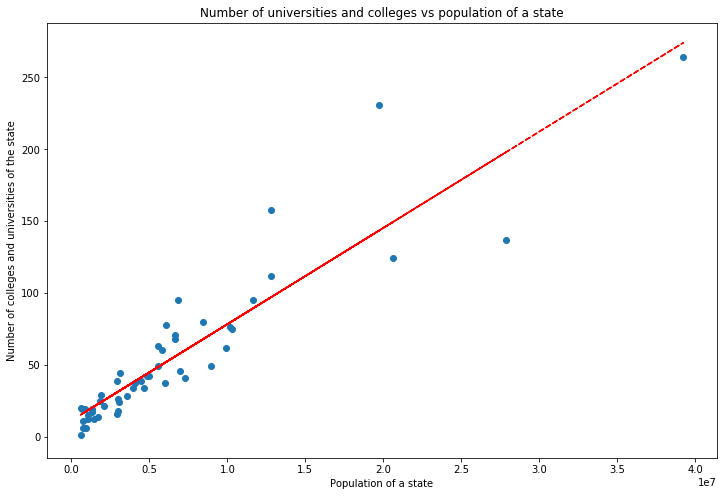

In [256]:
# We plot the number of universities and colleges over the population
plt.figure(figsize=(12,8))
plt.title("Number of universities and colleges vs population of a state")
plt.xlabel("Population of a state")
plt.ylabel("Number of colleges and universities of the state")
z = np.polyfit(df_education.Population, df_education.N_of_colleges_universities, 1)
p = np.poly1d(z)
plt.plot(df_education.Population,p(df_education.Population),"r--")
plt.scatter(df_education.Population, df_education.N_of_colleges_universities) 

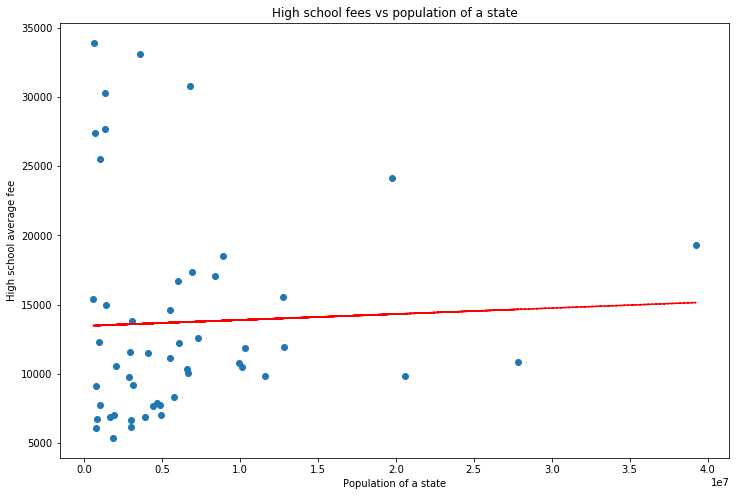

In [257]:
# We do the same for the High school fees
plt.figure(figsize=(12,8))
plt.title("High school fees vs population of a state")
plt.xlabel("Population of a state")
plt.ylabel("High school average fee")
z = np.polyfit(df_education.Population, df_education.High_School_Fee, 1)
p = np.poly1d(z)
plt.plot(df_education.Population,p(df_education.Population),"r--")
plt.scatter(df_education.Population, df_education.High_School_Fee) 

We can see that in the first case we can see a clear correlation between the two quantities, while in the second case there isn't.
We can consider as clearly extensive the first three features we have considered (Number of colleges and universities, Number of junior colleges, Number of professional schools).
But what about the top-230-ranking score?
Of course, it is influenced by the total number of universities: if there are more universities, it is more probable that many will be in the top 230. But the score is not barely related to the number of universities present in the ranking: will we find a meaningful correlation?
Let's plot this index in function of the population!

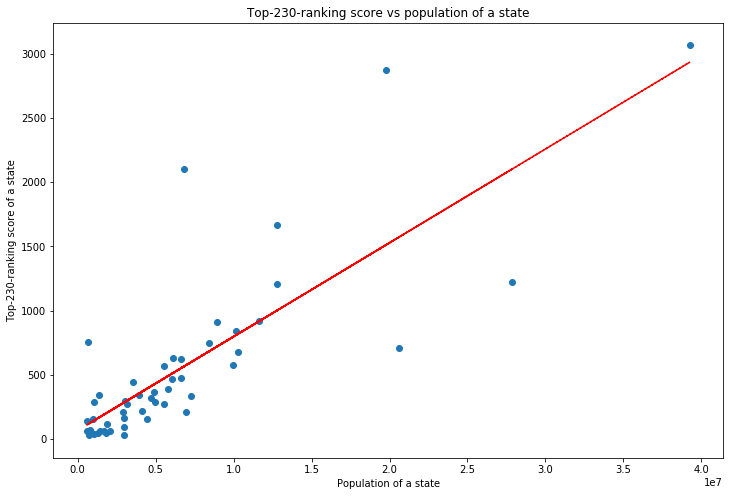

In [258]:
# We plot the top-230-ranking scorse vs the population
plt.figure(figsize=(12,8))
plt.title("Top-230-ranking score vs population of a state")
plt.xlabel("Population of a state")
plt.ylabel("Top-230-ranking score of a state")
z = np.polyfit(df_education.Population, df_education.top_230_ranking_score, 1)
p = np.poly1d(z)
plt.plot(df_education.Population,p(df_education.Population),"r--")
plt.scatter(df_education.Population, df_education.top_230_ranking_score) 

The relation seems to be meaningful! We can consider this quantity as extensive, and therefore we need to normalize it in function of the population!
Let's normalize our quantities!

In [259]:
# We calculate the normalized quantities we need
df_education_norm = df_education.copy()
df_education_norm['Colleges_universities_per_1000000'] = (df_education.N_of_colleges_universities)/(df_education.Population)*1000000
df_education_norm['Junior_colleges_per_1000000'] = (df_education.N_of_junior_colleges)/(df_education.Population)*1000000
df_education_norm['Prof_schools_per_1000000'] = (df_education.N_of_technical_trade_schools)/(df_education.Population)*1000000
df_education_norm['Intensive_top_230_score'] = (df_education.top_230_ranking_score)/(df_education.Population)*1000000
df_education_norm.head()

State  Population  N_of_colleges_universities  N_of_junior_colleges  \
0     alabama     4863300                        42.0                  36.0   
1      alaska      741894                         6.0                   1.0   
2     arizona     6931071                        46.0                  43.0   
3    arkansas     2988248                        26.0                  26.0   
4  california    39250017                       264.0                 191.0   

   N_of_technical_trade_schools  awards_per_value  exp_award_value  \
0                          16.0         19.514493     63013.173913   
1                           2.0         18.414286    141431.142857   
2                          42.0         25.563492     47830.888889   
3                          32.0         21.970833     51132.479167   
4                         239.0         22.771429     63022.202857   

   top_230_ranking_score  High_School_Fee  Elementary_School_Fee  \
0                    366             7718                   6388   
1                     29             6118                   7544   
2                    209            17339                   6283   
3                     96             6680                   4698   
4                   3064            19317                  11363   

   Colleges_universities_per_1000000  Junior_colleges_per_1000000  \
0                           8.636111                     7.402381   
1                           8.087409                     1.347901   
2                           6.636781                     6.203947   
3                           8.700750                     8.700750   
4                           6.726112                     4.866240   

   Prof_schools_per_1000000  Intensive_top_230_score  
0                  3.289947                75.257541  
1                  2.695803                39.089142  
2                  6.059670                30.154070  
3                 10.708616                32.125848  
4                  6.089169                78.063660

In [260]:
# Now we keep only the intensive quantities we need
df_education_final = df_education_norm[['State', 'awards_per_value', 'exp_award_value', 'High_School_Fee', 
                                        'Elementary_School_Fee', 'Colleges_universities_per_1000000', 
                                        'Junior_colleges_per_1000000', 
                                        'Prof_schools_per_1000000', 'Intensive_top_230_score']]
df_education_final.head()

State  awards_per_value  exp_award_value  High_School_Fee  \
0     alabama         19.514493     63013.173913             7718   
1      alaska         18.414286    141431.142857             6118   
2     arizona         25.563492     47830.888889            17339   
3    arkansas         21.970833     51132.479167             6680   
4  california         22.771429     63022.202857            19317   

   Elementary_School_Fee  Colleges_universities_per_1000000  \
0                   6388                           8.636111   
1                   7544                           8.087409   
2                   6283                           6.636781   
3                   4698                           8.700750   
4                  11363                           6.726112   

   Junior_colleges_per_1000000  Prof_schools_per_1000000  \
0                     7.402381                  3.289947   
1                     1.347901                  2.695803   
2                     6.203947                  6.059670   
3                     8.700750                 10.708616   
4                     4.866240                  6.089169   

   Intensive_top_230_score  
0                75.257541  
1                39.089142  
2                30.154070  
3                32.125848  
4                78.063660

We have created now some new intensive features that are of course more useful! 
- *Colleges and universities per 1 million inhabitants*: it mantains a positive meaning, more schools are there per million inhabitants, the more the education system is efficient!
- *Junior colleges per 1 million inhabitants*: same as before!
- *Professional schools per 1 million inhabitants*: same as before!
- *Intensive top-230-ranking score*: calculated dividing the previous score by the number of inhabitants and multiplying the obtained number per 1000000, in order to have a decent value of score for each state.

Now we have some **positive** features:
- *Number of graduations per 100 students*;
- *Institutional expenditure per graduation*;
- *Intensive top-230-ranking score*
- *Colleges and universities per 1 million inhabitants*;
- *Junior colleges per 1 million inhabitants*;
- *Professional schools per 1 million inhabitants*.

Let's see if normalizing these features and plotting them, we obtain a sort of common trend!

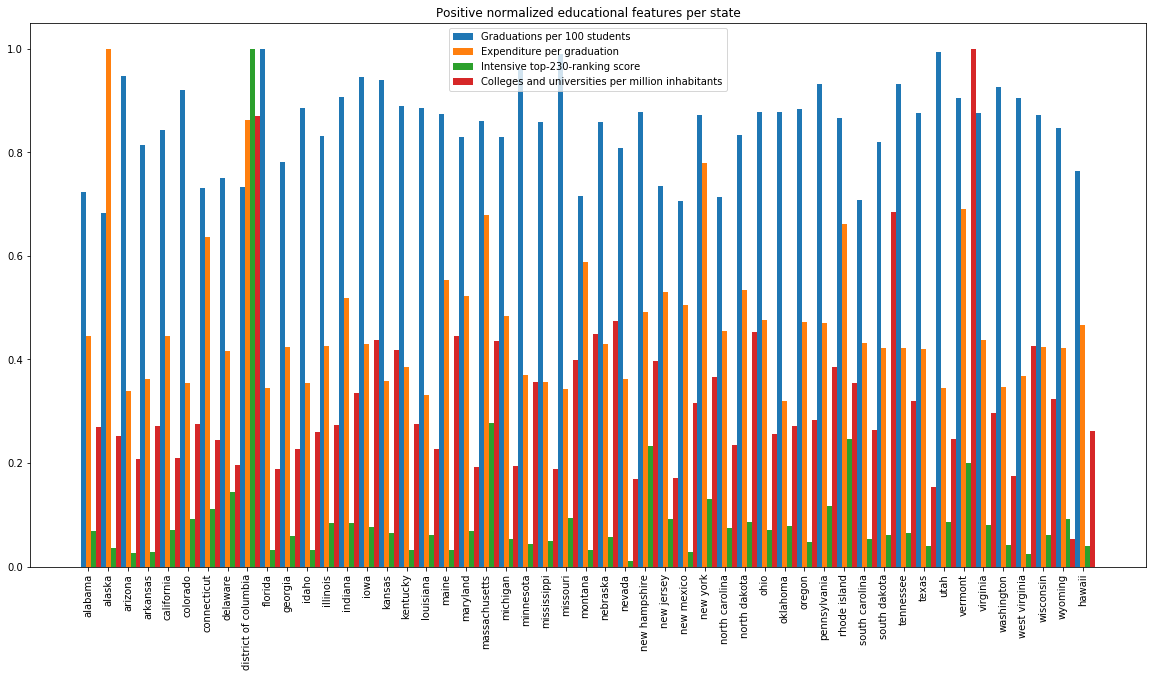

In [294]:
# We plot the positive obtained
plt.figure(figsize=(20,10))
plt.title("Positive normalized educational features per state")
barWidth = 0.25
r1 = np.arange(len(df_education_final.State))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
plt.bar(r1, (df_education_final.awards_per_value)/(df_education_final.awards_per_value.max()), width=0.25) 
plt.bar(r2, (df_education_final.exp_award_value)/(df_education_final.exp_award_value.max()), width=0.25) 
plt.bar(r3, (df_education_final.Intensive_top_230_score)/(df_education_final.Intensive_top_230_score.max()), width=0.25)
plt.bar(r4,(df_education_final.Colleges_universities_per_1000000)/(df_education_final.Colleges_universities_per_1000000.max()), width=0.25)
plt.xticks([r + barWidth for r in range(len(df_education_final.State))], df_education_final.State, 
           rotation='vertical')
plt.gca().legend(('Graduations per 100 students', 'Expenditure per graduation',
                  'Intensive top-230-ranking score', 'Colleges and universities per million inhabitants'))
plt.show()

We can notice District of Columbia is the absolute champion (except for junior colleges, there is none in D.C.)! But we can see other states have good results in all categories (Massachussets, New York, Vermont, Rhode Island, West Virginia...)!
In spite of this, in general we cannot see a common trend, and in many cases we can notice that the number of junior colleges per million inhabitants seems to be a negative feature!

What about the negative features? We have now 2 negative features:
- *High school average fee*;
- *Elementary school average fee*.

Let's plot these negative features!

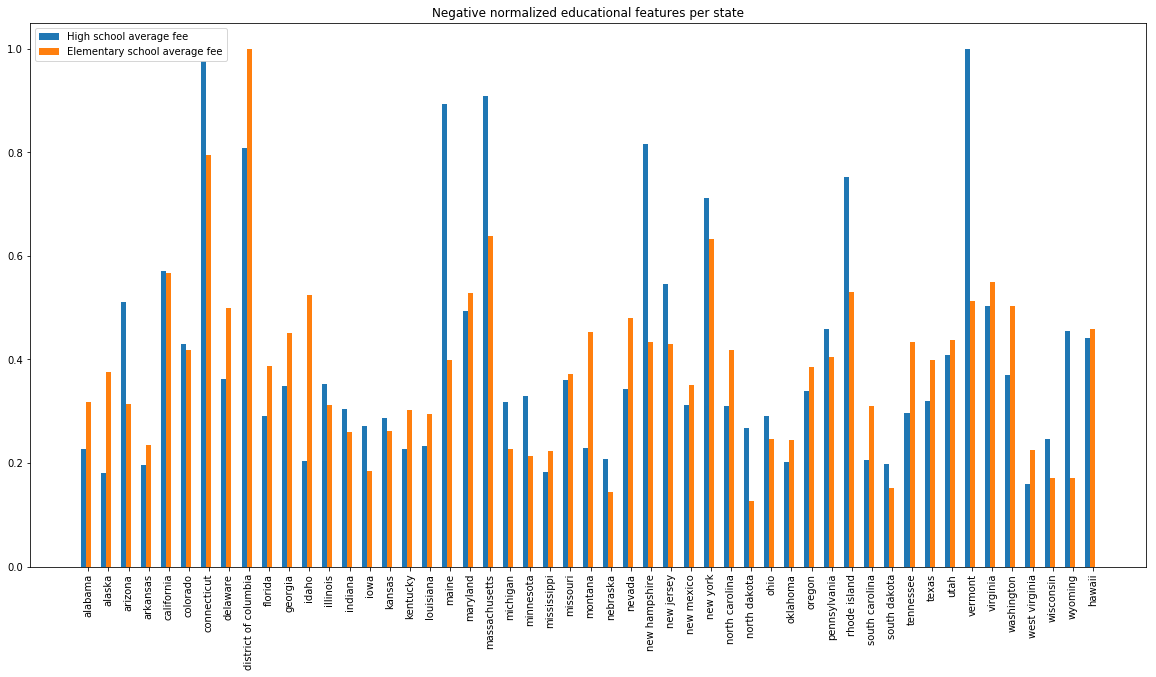

In [286]:
# We plot the negative obtained
plt.figure(figsize=(20,10))
plt.title("Negative normalized educational features per state")
barWidth = 0.25
r1 = np.arange(len(df_education_final.State))
r2 = [x + barWidth for x in r1]
plt.bar(r1, (df_education_final.High_School_Fee)/(df_education_final.High_School_Fee.max()), width=0.25) 
plt.bar(r2, (df_education_final.Elementary_School_Fee)/(df_education_final.Elementary_School_Fee.max()), width=0.25) 
plt.xticks([r + barWidth for r in range(len(df_education_final.State))], df_education_final.State, 
           rotation='vertical')
plt.gca().legend(('High school average fee', 'Elementary school average fee'))
plt.show()

In this case we can see a more common trend, but some states that were excellent considering the positive features have also high negative features (for instance, District of Columbia, Massachussets, Vermont).
As said, these two parameters are of course "ambiguous", as we can consider them with a negative and a positive meaning, but we are still convinced a good education is an education with excellent references, but also that is affordable to everyone!
That is why these two features are considered as negative, even if in general they are positively correlated with a good level of education!

In [278]:
df_education_final.corr()

awards_per_value  exp_award_value  \
awards_per_value                           1.000000        -0.462936   
exp_award_value                           -0.462936         1.000000   
High_School_Fee                           -0.003290         0.514762   
Elementary_School_Fee                     -0.238315         0.510086   
Colleges_universities_per_1000000          0.043906         0.422604   
Junior_colleges_per_1000000                0.123325        -0.409821   
Prof_schools_per_1000000                   0.281275        -0.229220   
Intensive_top_230_score                   -0.157829         0.516166   

                                   High_School_Fee  Elementary_School_Fee  \
awards_per_value                         -0.003290              -0.238315   
exp_award_value                           0.514762               0.510086   
High_School_Fee                           1.000000               0.680079   
Elementary_School_Fee                     0.680079               1.000000   
Colleges_universities_per_1000000         0.364987               0.189330   
Junior_colleges_per_1000000              -0.297078              -0.579298   
Prof_schools_per_1000000                 -0.084893              -0.073988   
Intensive_top_230_score                   0.498548               0.611608   

                                   Colleges_universities_per_1000000  \
awards_per_value                                            0.043906   
exp_award_value                                             0.422604   
High_School_Fee                                             0.364987   
Elementary_School_Fee                                       0.189330   
Colleges_universities_per_1000000                           1.000000   
Junior_colleges_per_1000000                                -0.093338   
Prof_schools_per_1000000                                   -0.037426   
Intensive_top_230_score                                     0.556551   

                                   Junior_colleges_per_1000000  \
awards_per_value                                      0.123325   
exp_award_value                                      -0.409821   
High_School_Fee                                      -0.297078   
Elementary_School_Fee                                -0.579298   
Colleges_universities_per_1000000                    -0.093338   
Junior_colleges_per_1000000                           1.000000   
Prof_schools_per_1000000                              0.079080   
Intensive_top_230_score                              -0.379707   

                                   Prof_schools_per_1000000  \
awards_per_value                                   0.281275   
exp_award_value                                   -0.229220   
High_School_Fee                                   -0.084893   
Elementary_School_Fee                             -0.073988   
Colleges_universities_per_1000000                 -0.037426   
Junior_colleges_per_1000000                        0.079080   
Prof_schools_per_1000000                           1.000000   
Intensive_top_230_score                           -0.054709   

                                   Intensive_top_230_score  
awards_per_value                                 -0.157829  
exp_award_value                                   0.516166  
High_School_Fee                                   0.498548  
Elementary_School_Fee                             0.611608  
Colleges_universities_per_1000000                 0.556551  
Junior_colleges_per_1000000                      -0.379707  
Prof_schools_per_1000000                         -0.054709  
Intensive_top_230_score                           1.000000

### Things we still need to do
- Implement a ML model on our normalized features to obtain an "education" score
- Once this score is calculated, generate a map showing the education score for each state

## Health

In [279]:
# We create the "health" DataFrame basing on the final DataFrame of milestone 2
df_health = df[health_list]
df_health.head()

State  Population  Life_Expectancy  mc_donalds_per_100k  \
0     alabama     4863300        74.813987                  5.0   
1      alaska      741894        78.915541                  4.2   
2     arizona     6931071        78.364742                  4.1   
3    arkansas     2988248        75.626900                  5.8   
4  california    39250017        80.231014                  3.3   

   adult_obesity_rate  eating_vegetables_daily  Vegetable  \
0                34.7                     27.8        1.5   
1                29.4                     18.9        1.8   
2                26.7                     20.5        1.7   
3                34.6                     28.1        1.5   
4                22.7                     18.6        1.8   

   diabetes_prevalence  alcohol_prevalence  mean_physical_activity  \
0                16.19                 6.6                   45.75   
1                11.89                 9.2                   58.70   
2                13.72                 8.1                   58.20   
3                15.23                 6.9                   48.25   
4                14.51                 8.4                   60.25   

   mean_obesity  
0         39.75  
1         35.70  
2         33.10  
3         38.25  
4         31.15

For our **Health** category we have the following features
- *Life expectancy at birth* in 2015: of course, the longer the life expectancy, the higher the level of health of each state is supposed to be;
- *Number of McDonalds shops per 100000 inhabitants* in each state: McDonalds has always been considered as the example of bad nutrition habits. Of course, this is not immediately true, a McDo a month is not that unhealty (and sometimes is a real mood booster!) but in general, more McDonalds shops mean more people eating regularly there and this is correlated with bad habits, leading to alimentary disorders;
- *Adult obesity rate*: people are generally considered obese when their body mass index (BMI), a measurement obtained by dividing a person's weight by the square of the person's height, is over 30 kg/m^2 [2]. Obesity is a severe health problem, as it is supposed to cause several problems, as diabetes, cardiovascular diseases and finally death. This problem is particularly true in a country like USA, generally considered as the evil of nutrition. It is not a case that in 2013 several medical societies, including the American Medical Association and the American Heart Association, classified obesity as a disease [2].
- *Mean obesity rate*, considering not only adults, but also children;
- *Percentage of people not eating vegetables daily*: on the opposite side od McDo, vegetables are considered as the example of good nutrition. Once again, this is not true, but in general people who eat vegetables daily tend to be more careful to what they eat!
- *Average number of vegetable portions eaten daily per person*;
- *Rate of people suffering from diabetes* per state: diabetes is closely linked to obesity and is one of the most important causes of death in Western world. This is again one of the more severe health problems in US;
- *Alcohol prevalence* in 2012: rate of people who declared to consume, on average, more than one drink per day for women or two drinks per day for men in the past 30 days. It can be related to several kinds of healthy problems and diseases;
- *Physical activity prevalence* in 2012: rate of people who is physically active daily. Physical activity is linked to a healthy lifestyle and therefore to a better life.

Let's start looking at the correlation of all of these features with the population of a state. As seen, all the collected features should be intensive features, so we do not expect a high level of correlation with the number of inhabitants.

In [280]:
pd.DataFrame(df_health.corr().Population)

Population
Population                 1.000000
Life_Expectancy            0.050462
mc_donalds_per_100k       -0.190457
adult_obesity_rate        -0.226059
eating_vegetables_daily   -0.088903
Vegetable                  0.108450
diabetes_prevalence        0.341886
alcohol_prevalence        -0.183149
mean_physical_activity    -0.009687
mean_obesity              -0.009364

In [281]:
df_health_norm = df_health.drop(columns='Population')
df_health_norm.head()

State  Life_Expectancy  mc_donalds_per_100k  adult_obesity_rate  \
0     alabama        74.813987                  5.0                34.7   
1      alaska        78.915541                  4.2                29.4   
2     arizona        78.364742                  4.1                26.7   
3    arkansas        75.626900                  5.8                34.6   
4  california        80.231014                  3.3                22.7   

   eating_vegetables_daily  Vegetable  diabetes_prevalence  \
0                     27.8        1.5                16.19   
1                     18.9        1.8                11.89   
2                     20.5        1.7                13.72   
3                     28.1        1.5                15.23   
4                     18.6        1.8                14.51   

   alcohol_prevalence  mean_physical_activity  mean_obesity  
0                 6.6                   45.75         39.75  
1                 9.2                   58.70         35.70  
2                 8.1                   58.20         33.10  
3                 6.9                   48.25         38.25  
4                 8.4                   60.25         31.15

We can split once again our features in **positive** and **negative**.

We can consider as positive:
- *Life expectancy at birth*;
- *Number of vegetable portions eaten daily per person*;
- *Physical activity prevalence*.

Instead we have as negative features:
- *Number of McDonalds shops per 100000 inhabitants*;
- *Percentage of people not eating vegetables daily*;
- *Adult obesity rate*;
- *Mean obesity rate*;
- *Diabetes prevalence*;
- *Alcohol prevalence*.

Now let's look at the correlation between our features: we should see positive features positively correlated each other but not with negative features, and vice versa.

In [282]:
df_health_norm.corr()

Life_Expectancy  mc_donalds_per_100k  \
Life_Expectancy                 1.000000            -0.603849   
mc_donalds_per_100k            -0.603849             1.000000   
adult_obesity_rate             -0.736961             0.548133   
eating_vegetables_daily        -0.571649             0.415053   
Vegetable                       0.508934            -0.386006   
diabetes_prevalence            -0.826542             0.428956   
alcohol_prevalence              0.574026            -0.199260   
mean_physical_activity          0.785877            -0.399183   
mean_obesity                   -0.752466             0.475798   

                         adult_obesity_rate  eating_vegetables_daily  \
Life_Expectancy                   -0.736961                -0.571649   
mc_donalds_per_100k                0.548133                 0.415053   
adult_obesity_rate                 1.000000                 0.766348   
eating_vegetables_daily            0.766348                 1.000000   
Vegetable                         -0.746858                -0.947860   
diabetes_prevalence                0.536810                 0.518767   
alcohol_prevalence                -0.393658                -0.354527   
mean_physical_activity            -0.806486                -0.774558   
mean_obesity                       0.942865                 0.743352   

                         Vegetable  diabetes_prevalence  alcohol_prevalence  \
Life_Expectancy           0.508934            -0.826542            0.574026   
mc_donalds_per_100k      -0.386006             0.428956           -0.199260   
adult_obesity_rate       -0.746858             0.536810           -0.393658   
eating_vegetables_daily  -0.947860             0.518767           -0.354527   
Vegetable                 1.000000            -0.436833            0.355295   
diabetes_prevalence      -0.436833             1.000000           -0.670811   
alcohol_prevalence        0.355295            -0.670811            1.000000   
mean_physical_activity    0.775138            -0.749479            0.649040   
mean_obesity             -0.720079             0.658064           -0.496215   

                         mean_physical_activity  mean_obesity  
Life_Expectancy                        0.785877     -0.752466  
mc_donalds_per_100k                   -0.399183      0.475798  
adult_obesity_rate                    -0.806486      0.942865  
eating_vegetables_daily               -0.774558      0.743352  
Vegetable                              0.775138     -0.720079  
diabetes_prevalence                   -0.749479      0.658064  
alcohol_prevalence                     0.649040     -0.496215  
mean_physical_activity                 1.000000     -0.837010  
mean_obesity                          -0.837010      1.000000

Even if there are some exceptions (surprisingly, alcohol prevalence seems to be a positive feature) in general these trends are respected!
Going further into the data, we can notice some very high correlations.

The first, obvious, is the one between people who do not eat vegetables and the number of vegetable portions consumed daily per person. Let's look more closely at this correlation.

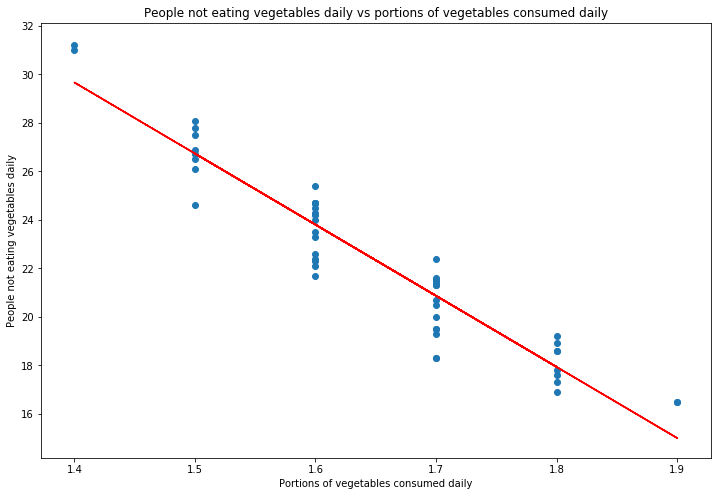

In [283]:
plt.figure(figsize=(12,8))
plt.title("People not eating vegetables daily vs portions of vegetables consumed daily")
plt.xlabel("Portions of vegetables consumed daily")
plt.ylabel("People not eating vegetables daily")
z = np.polyfit(df_health_norm.Vegetable, df_health_norm.eating_vegetables_daily, 1)
p = np.poly1d(z)
plt.plot(df_health_norm.Vegetable,p(df_health_norm.Vegetable),"r--")
plt.scatter(df_health_norm.Vegetable, df_health_norm.eating_vegetables_daily) 

The second strong correlation we can see is the one, still obvious, between the adult obesity rate and the mean obesity rate. This is quite obvious, but we can highlight an important trend.

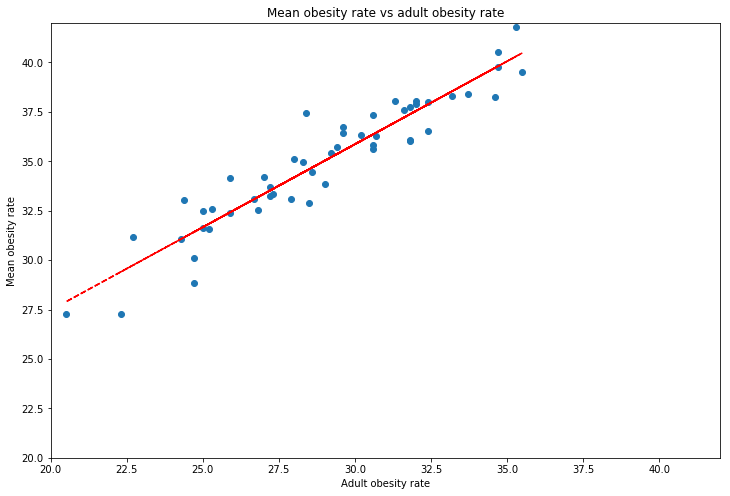

In [284]:
plt.figure(figsize=(12,8))
plt.title("Mean obesity rate vs adult obesity rate")
plt.xlabel("Adult obesity rate")
plt.ylabel("Mean obesity rate")
plt.xlim(20,42)
plt.ylim(20,42)
z = np.polyfit(df_health_norm.adult_obesity_rate, df_health_norm.mean_obesity, 1)
p = np.poly1d(z)
plt.plot(df_health_norm.adult_obesity_rate,p(df_health_norm.adult_obesity_rate),"r--")
plt.scatter(df_health_norm.adult_obesity_rate, df_health_norm.mean_obesity)

We can notice mean obesity rate (involving also children and youngsters) is way higher than adult obesity rate. This is quite worrying: young people in USA tend to be fatter and less healthy than adults, and this trend absolutely needs to be reverted!
This data reveal bad habits in US tend to spread more and more and are diffused in the youngest parts of the population: this is a feature that can be observed not only in the US, but also in all Western World, and is related to many factors: sedentariety, capillar diffusion of fast food shops, less alimentary education, higher capability of obtaining food than in previous generations.

These two very strong correlations suggest us we can drop for both couples one of the two features. We decide to drop for the first couple the number of vegetables eaten, as it has more discrete values than the rate of people not eating vegetables daily, and the adult obesity rate, as the mean obesity rate is more representative and comprends also young people.

In [285]:
df_health_final = df_health_norm.drop(columns=['adult_obesity_rate', 'Vegetable'])
df_health_final.head()

State  Life_Expectancy  mc_donalds_per_100k  eating_vegetables_daily  \
0     alabama        74.813987                  5.0                     27.8   
1      alaska        78.915541                  4.2                     18.9   
2     arizona        78.364742                  4.1                     20.5   
3    arkansas        75.626900                  5.8                     28.1   
4  california        80.231014                  3.3                     18.6   

   diabetes_prevalence  alcohol_prevalence  mean_physical_activity  \
0                16.19                 6.6                   45.75   
1                11.89                 9.2                   58.70   
2                13.72                 8.1                   58.20   
3                15.23                 6.9                   48.25   
4                14.51                 8.4                   60.25   

   mean_obesity  
0         39.75  
1         35.70  
2         33.10  
3         38.25  
4         31.15

Now, as seen for the education category, let's see if we can find a coherent trend between all positive features and negative features.

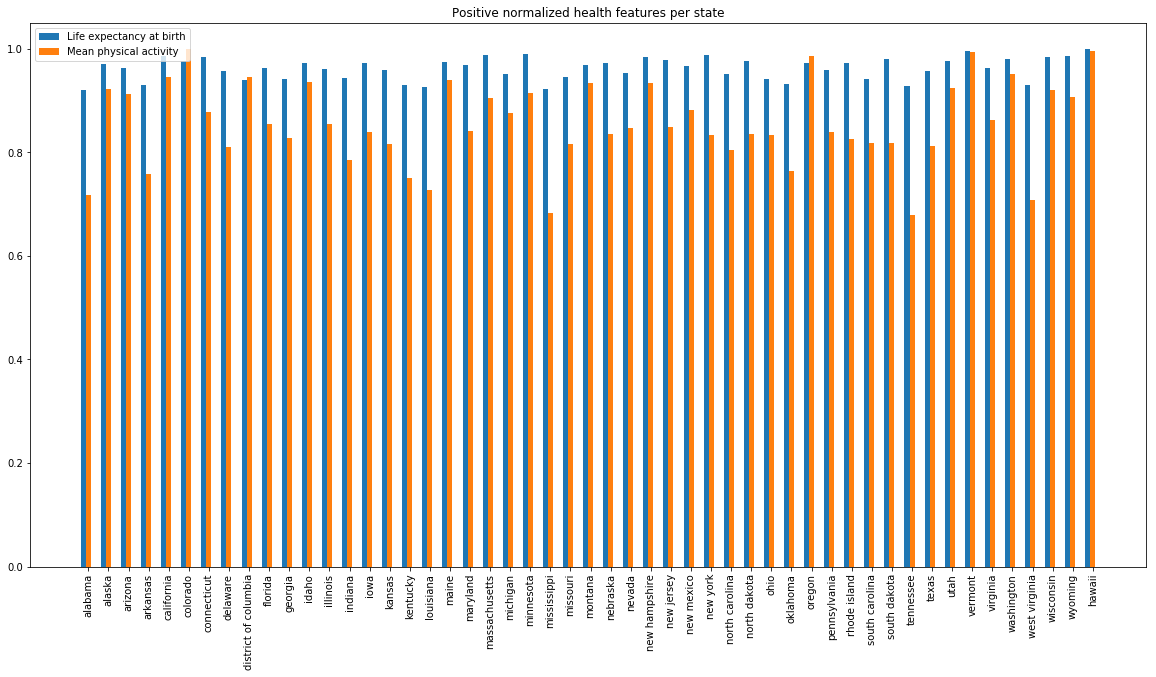

In [287]:
# We plot the positive features
plt.figure(figsize=(20,10))
plt.title("Positive normalized health features per state")
barWidth = 0.25
r1 = np.arange(len(df_education_final.State))
r2 = [x + barWidth for x in r1]
plt.bar(r1, (df_health_final.Life_Expectancy)/(df_health_final.Life_Expectancy.max()), width=0.25) 
plt.bar(r2, (df_health_final.mean_physical_activity)/(df_health_final.mean_physical_activity.max()), width=0.25) 
plt.xticks([r + barWidth for r in range(len(df_education_final.State))], df_education_final.State, 
           rotation='vertical')
plt.gca().legend(('Life expectancy at birth', 'Mean physical activity'))
plt.show()

Even if physical activity prevalence has a more variable range, we can notice a common path between the two positive features! We can see there are some really good states (California, Colorado, Oregon, Utah, Hawaii) and some really negative ones (Alabama, Arkansas, Louisiana, Mississippi, Tennessee, West Virginia).
In general, correlation between these two features still seems to be very strong, as previously seen.

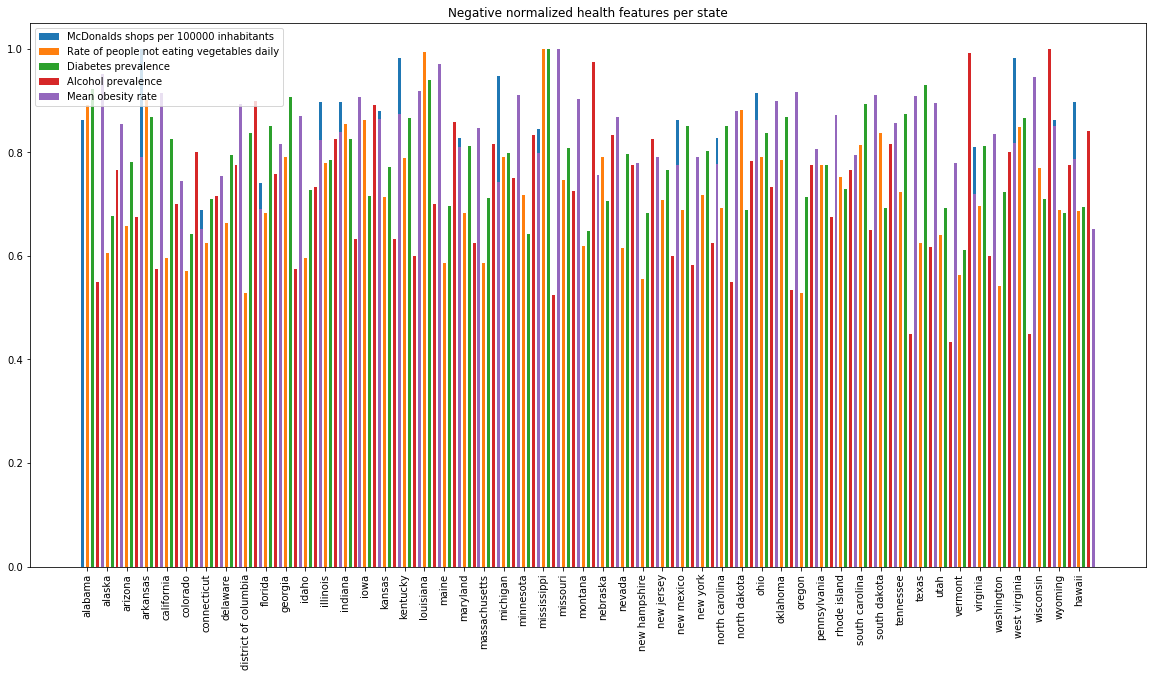

In [293]:
# We plot the negative
plt.figure(figsize=(20,10))
plt.title("Negative normalized health features per state")
barWidth = 0.25
r1 = np.arange(len(df_education_final.State))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
plt.bar(r1, (df_health_final.mc_donalds_per_100k)/(df_health_final.mc_donalds_per_100k.max()), width=0.15) 
plt.bar(r2, (df_health_final.eating_vegetables_daily)/(df_health_final.eating_vegetables_daily.max()), width=0.15) 
plt.bar(r3, (df_health_final.diabetes_prevalence)/(df_health_final.diabetes_prevalence.max()), width=0.15)
plt.bar(r4, (df_health_final.alcohol_prevalence)/(df_health_final.alcohol_prevalence.max()), width=0.15)
plt.bar(r5, (df_health_final.mean_obesity)/(df_health_final.mean_obesity.max()), width=0.15)
plt.xticks([r + barWidth for r in range(len(df_education_final.State))], df_education_final.State, 
           rotation='vertical')
plt.gca().legend(('McDonalds shops per 100000 inhabitants', 'Rate of people not eating vegetables daily',
                  'Diabetes prevalence', 'Alcohol prevalence',
                  'Mean obesity rate'))
plt.show()

In this case too, we can find a quite common pattern for negative features, except for one: alcohol prevalence (and in some cases rate of people not eating vegetables daily). But let's underline some interesting facts:
- This time the worst states for positive features confirm to be the worst, in the sense that they excell in negative features: Arkansas, Louisiana, Mississippi and West Virginia have very high values of all evaluated negative features (except, as said, alcohol prevalence);
- The same consideration can be done for the best states: California, Hawaii, Oregon, Utah, but this time also Vermont and Washington have low values of all the negative features considered;
- We can see for all features a quite homogeneous distribution except for one: alcohol prevalence! In particular, we can notice two very low values. Curiously, they concern one of the worst states, that is to say West Virginia, and one of the best ones, that is Utah!

Regarding Utah, we can see it is a mainly mormon state (60% of the 88% of christians) [3]. Mormons follow the *Word of Wisdom* revealed by God to Joseph Smith in 1833 [4], that prohibits wine and other alcoholic drinks, hot drinks like tea or coffee and drugs. Due to this healthy revealed lifestyle, we will expect a very high health score for Utah!

Regarding West Virginia, these data are quite strange. As said, it do not seems to be a very healthy state, it does not have any severe regulation for alcohol consumption, nor some religious concerns as Utah. 

In general, we need to consider that our data about alcohol prevalence refer to very "easy to obtain" parameters: it is probable that many people drink alcoholic beverages also once a week, and these people enter in our considered part of the population, considering how the data about alcohol prevalence are evaluated.

### Things we still need to do
- Implement a ML model on our normalized features to obtain an "health" score
- Once this score is calculated, generate a map showing the health score for each state

## Security

In [295]:
# We create the "security" DataFrame basing on the final DataFrame of milestone 2
df_security = df[security_list]
df_security.head()

State  Population  alcohol_prevalence  Overall Homeless, 2018  \
0     alabama     4863300                 6.6                    3434   
1      alaska      741894                 9.2                    2016   
2     arizona     6931071                 8.1                    9865   
3    arkansas     2988248                 6.9                    2712   
4  california    39250017                 8.4                  129972   

   Violent_Crime  Murder_and_Manslaughter   Rape  Robbery  Aggravated_Assoult  \
0          532.3                      8.4   39.4     96.4               388.2   
1          804.2                      7.0  141.9    114.6               540.6   
2          470.1                      5.5   47.5    101.8               315.4   
3          550.9                      7.2   71.7     70.9               401.0   
4          445.3                      4.9   34.9    139.6               265.9   

   Property_crime  Burglary   Theft  Motor_Vehicle_theft  
0          2947.8     700.5  2006.3                241.1  
1          3353.0     546.3  2394.7                412.1  
2          2978.4     544.4  2168.1                265.8  
3          3268.6     795.5  2233.6                239.4  
4          2553.0     479.8  1623.0                450.3

In our **Security** dataframe we have data referring to the following categories:
- *Alcohol prevalence* as seen in our Health section: we can speculate alcohol prevalence is linked to an higher rate of crimes or violent acts, and has therefore a general negative meaning concerning the security of a place;
- *Number of homeless people* in 2018 in each state: this data is linked to different factors, not least the environmental and economic ones, but in general in the common ideas a high number of homeless corresponds to a general feeling of unsecurity; we should evaluate whether this idea is supported by an actual correlation with crimes, but we can still consider this parameter as negative, as we intend as security also the *feeling of security* everybody can perceive;
- *Rate of violent crimes, murders and manslaughters, rapes, robberies, aggravated assoults, porperty crimes, burglaries, thefts and motor vehicle thefts* per 100000 inhabitants in each state, referring to 2016: all these parameters are of course correlated with the intrinsic security of a state in a very negative way; in spite of this, we could speculate some crimes are more negative than others. Our model will have differential weights depending on the kind of crime we are evaluating.

In general, all data we have collected in this category negatively describe the "security attitude" of a state. States who "excell" on these features will have a very low security score!

First of all, we notice we have all intensive data, except for one category: the **number of homeless people**. Let's evaluate if we can effectively notice a correlation between this parameter and the correlation.

In [296]:
df_security.columns = ['State', 'Population', 'alcohol_prevalence', 'Overall_Homeless_2018',
       'Violent_Crime', 'Murder_and_Manslaughter', 'Rape', 'Robbery',
       'Aggravated_Assoult', 'Property_crime', 'Burglary', 'Theft',
       'Motor_Vehicle_theft']

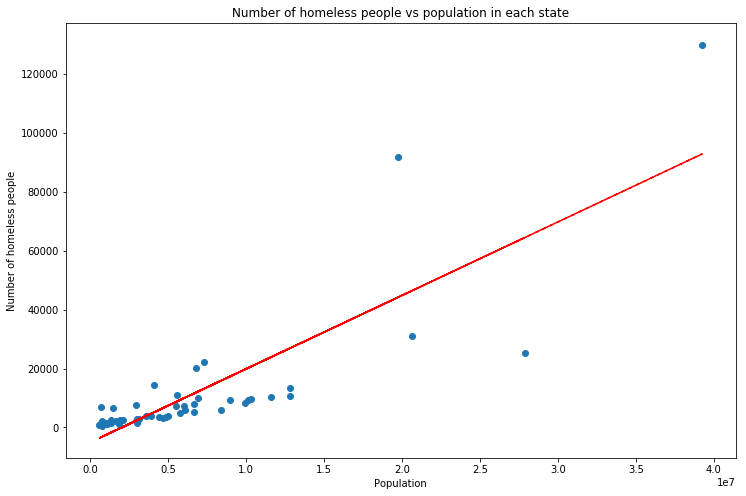

In [297]:
plt.figure(figsize=(12,8))
plt.title("Number of homeless people vs population in each state")
plt.xlabel("Population")
plt.ylabel("Number of homeless people")
z = np.polyfit(df_security.Population, df_security.Overall_Homeless_2018, 1)
p = np.poly1d(z)
plt.plot(df_security.Population,p(df_security.Population),"r--")
plt.scatter(df_security.Population, df_security.Overall_Homeless_2018) 

We need to normalize this parameter! We will evaluate the rate of homeless people per 100000 inhabitants in each state!

In [298]:
# We calculate the normalized quantity we need
df_security_norm = df_security.copy()
df_security_norm['Homeless_per_100000'] = (df_security.Overall_Homeless_2018)/(df_security.Population)*100000
df_security_norm.head()

State  Population  alcohol_prevalence  Overall_Homeless_2018  \
0     alabama     4863300                 6.6                   3434   
1      alaska      741894                 9.2                   2016   
2     arizona     6931071                 8.1                   9865   
3    arkansas     2988248                 6.9                   2712   
4  california    39250017                 8.4                 129972   

   Violent_Crime  Murder_and_Manslaughter   Rape  Robbery  Aggravated_Assoult  \
0          532.3                      8.4   39.4     96.4               388.2   
1          804.2                      7.0  141.9    114.6               540.6   
2          470.1                      5.5   47.5    101.8               315.4   
3          550.9                      7.2   71.7     70.9               401.0   
4          445.3                      4.9   34.9    139.6               265.9   

   Property_crime  Burglary   Theft  Motor_Vehicle_theft  Homeless_per_100000  
0          2947.8     700.5  2006.3                241.1            70.610491  
1          3353.0     546.3  2394.7                412.1           271.736933  
2          2978.4     544.4  2168.1                265.8           142.330096  
3          3268.6     795.5  2233.6                239.4            90.755520  
4          2553.0     479.8  1623.0                450.3           331.138710

In [299]:
# Now we keep only the intensive quantities we need
df_security_final = df_security_norm[['State', 'alcohol_prevalence', 'Homeless_per_100000',
       'Violent_Crime', 'Murder_and_Manslaughter', 'Rape', 'Robbery',
       'Aggravated_Assoult', 'Property_crime', 'Burglary', 'Theft',
       'Motor_Vehicle_theft']]
df_security_final.head()

State  alcohol_prevalence  Homeless_per_100000  Violent_Crime  \
0     alabama                 6.6            70.610491          532.3   
1      alaska                 9.2           271.736933          804.2   
2     arizona                 8.1           142.330096          470.1   
3    arkansas                 6.9            90.755520          550.9   
4  california                 8.4           331.138710          445.3   

   Murder_and_Manslaughter   Rape  Robbery  Aggravated_Assoult  \
0                      8.4   39.4     96.4               388.2   
1                      7.0  141.9    114.6               540.6   
2                      5.5   47.5    101.8               315.4   
3                      7.2   71.7     70.9               401.0   
4                      4.9   34.9    139.6               265.9   

   Property_crime  Burglary   Theft  Motor_Vehicle_theft  
0          2947.8     700.5  2006.3                241.1  
1          3353.0     546.3  2394.7                412.1  
2          2978.4     544.4  2168.1                265.8  
3          3268.6     795.5  2233.6                239.4  
4          2553.0     479.8  1623.0                450.3

Now let's evaluate some correlations.
In particular, as said, alcohol prevalence and homeless people rate are the two features of our dataframe that do not refer directly to crimes and therefore to a direct concept of unsecurity, but give more a sense of unsecurity; we need to evaluate and analyze our data to determine if the general ideas of alcoholist and homeless people as violent is confirmed.
Let's evaluate this correlation.

In [300]:
df_security_final.corr()[['alcohol_prevalence', 'Homeless_per_100000']]

alcohol_prevalence  Homeless_per_100000
alcohol_prevalence                 1.000000             0.325706
Homeless_per_100000                0.325706             1.000000
Violent_Crime                     -0.085512             0.508317
Murder_and_Manslaughter           -0.194808             0.380508
Rape                               0.091723             0.255368
Robbery                           -0.001514             0.682724
Aggravated_Assoult                -0.143486             0.322884
Property_crime                    -0.177815             0.392626
Burglary                          -0.469765            -0.219435
Theft                             -0.075826             0.518825
Motor_Vehicle_theft               -0.052559             0.384072

Once again, alcohol does not seem to have a negative meaning, as evaluated yet in our health analysis; it's strange to say, but in general alcohol prevalence has low correlation, or even negative correlation, with the most general crimes.

We can find instead meaningful correlations between the rate of homeless people and crimes; in general, but particularly concerning **robberies**. This correlation can be quite easily explained in causal terms: in fact, homeless people, who live in poverty and basically relying on alms and charity, could be pushed by the necessity of eating and survive to commit robberies or thefts. Let's look more closely to this aspect.

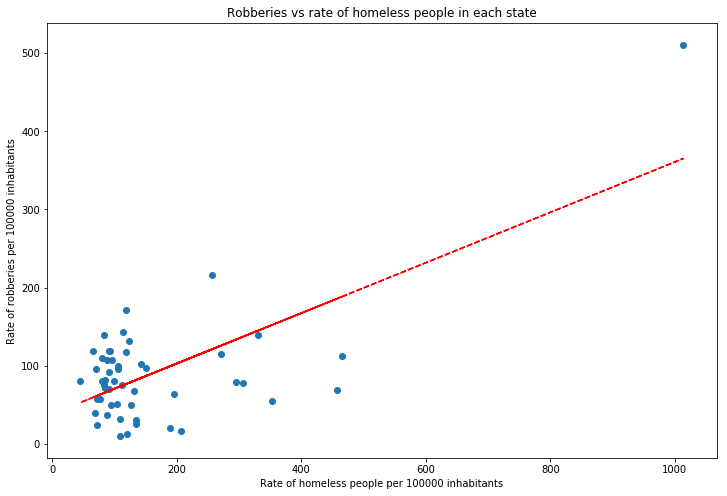

In [301]:
plt.figure(figsize=(12,8))
plt.title("Robberies vs rate of homeless people in each state")
plt.xlabel("Rate of homeless people per 100000 inhabitants")
plt.ylabel("Rate of robberies per 100000 inhabitants")
z = np.polyfit(df_security_final.Homeless_per_100000, df_security_final.Robbery, 1)
p = np.poly1d(z)
plt.plot(df_security_final.Homeless_per_100000,p(df_security_final.Homeless_per_100000),"r--")
plt.scatter(df_security_final.Homeless_per_100000, df_security_final.Robbery) 

We can notice in particular one state that has a very high value for both rates: let's see which state it is.

In [302]:
df_security_final.sort_values(['Homeless_per_100000'], ascending=False).head(2)

State  alcohol_prevalence  Homeless_per_100000  \
8   district of columbia                10.8          1013.550215   
31              new york                 7.5           465.412281   

    Violent_Crime  Murder_and_Manslaughter  Rape  Robbery  Aggravated_Assoult  \
8          1205.9                     20.4  78.1    510.9               596.5   
31          376.2                      3.2  31.7    113.0               228.3   

    Property_crime  Burglary   Theft  Motor_Vehicle_theft  
8           4802.9     346.6  4019.8                436.5  
31          1545.6     201.7  1271.0                 72.9

We can see District of Columbia seems to be by far the worst state in terms of security; if we compare it with the second state in terms of homeless people (New York) we can see that for each feature, D.C. has much higher values!
How can this be explained?
- District of Columbia coincides with the city of Washington D.C. and in general criminality is more diffused in big cities rather than in rural areas! That is why it obtains such high rates of crimes!

Now let's look at the correlations between the different kind of crimes. Is it possible to talk of diffused criminality, or are all crimes *statistically independent* between them?
Let's look at it!

In [303]:
df_security_crimes = df_security_final[['Violent_Crime', 'Murder_and_Manslaughter', 'Rape',
                                        'Robbery', 'Aggravated_Assoult', 'Property_crime',
                                        'Burglary', 'Theft', 'Motor_Vehicle_theft']]
df_security_crimes.corr()

Violent_Crime  Murder_and_Manslaughter      Rape  \
Violent_Crime                 1.000000                 0.827674  0.592081   
Murder_and_Manslaughter       0.827674                 1.000000  0.293746   
Rape                          0.592081                 0.293746  1.000000   
Robbery                       0.817911                 0.837320  0.244174   
Aggravated_Assoult            0.947515                 0.706884  0.611924   
Property_crime                0.730709                 0.655447  0.510811   
Burglary                      0.402822                 0.406297  0.264841   
Theft                         0.728716                 0.681140  0.484059   
Motor_Vehicle_theft           0.584927                 0.342179  0.542252   

                          Robbery  Aggravated_Assoult  Property_crime  \
Violent_Crime            0.817911            0.947515        0.730709   
Murder_and_Manslaughter  0.837320            0.706884        0.655447   
Rape                     0.244174            0.611924        0.510811   
Robbery                  1.000000            0.602032        0.579583   
Aggravated_Assoult       0.602032            1.000000        0.689667   
Property_crime           0.579583            0.689667        1.000000   
Burglary                 0.137617            0.495571        0.673415   
Theft                    0.645100            0.649118        0.962122   
Motor_Vehicle_theft      0.432656            0.555113        0.778811   

                         Burglary     Theft  Motor_Vehicle_theft  
Violent_Crime            0.402822  0.728716             0.584927  
Murder_and_Manslaughter  0.406297  0.681140             0.342179  
Rape                     0.264841  0.484059             0.542252  
Robbery                  0.137617  0.645100             0.432656  
Aggravated_Assoult       0.495571  0.649118             0.555113  
Property_crime           0.673415  0.962122             0.778811  
Burglary                 1.000000  0.477139             0.485301  
Theft                    0.477139  1.000000             0.671058  
Motor_Vehicle_theft      0.485301  0.671058             1.000000

We can notice a quite high correlation between all crimes, even though there are some exceptions. So, we can talk about a sort of **diffused criminality** present in some areas rather than others.
How can we detect which areas are more affected by criminality?
- In general, within cities, crime rates are higher than the average [5]. This finds a quite meaningful confirmation in our data,as the only "fully metropolitan" "state", that is to say D.C., is a sort of "criminality champion";
- on this path, in general smaller cities, far from the biggest metropolitan areas, tend to be less affected to criminality; therefore we expect high rates of crimes from those states (California, New York, New Jersey, Florida, Texas) in which these big metropolitan areas are present;
- different factors like poverty (as seen in the case of homeless people), xenophobia and racial conflicts, and even climate or hours of light per day [6], can influence the criminality rate; we could expect a higher criminality in those states close to the borders (and especially on the southern one, like Texas, New Mexico, Arizona, California), but also in colder states like Colorado or especially Alaska, that has climate and latitude that are similar to some countries of Northern Europe (Sweden, Norway [7]) in which criminality rate is quite high.

To see if these ideas reflect in the reality, let's plot some data!
Let's start with **violent crimes** (murders, rapes, general violent crimes) to see if our idea have a statistical confirmation.

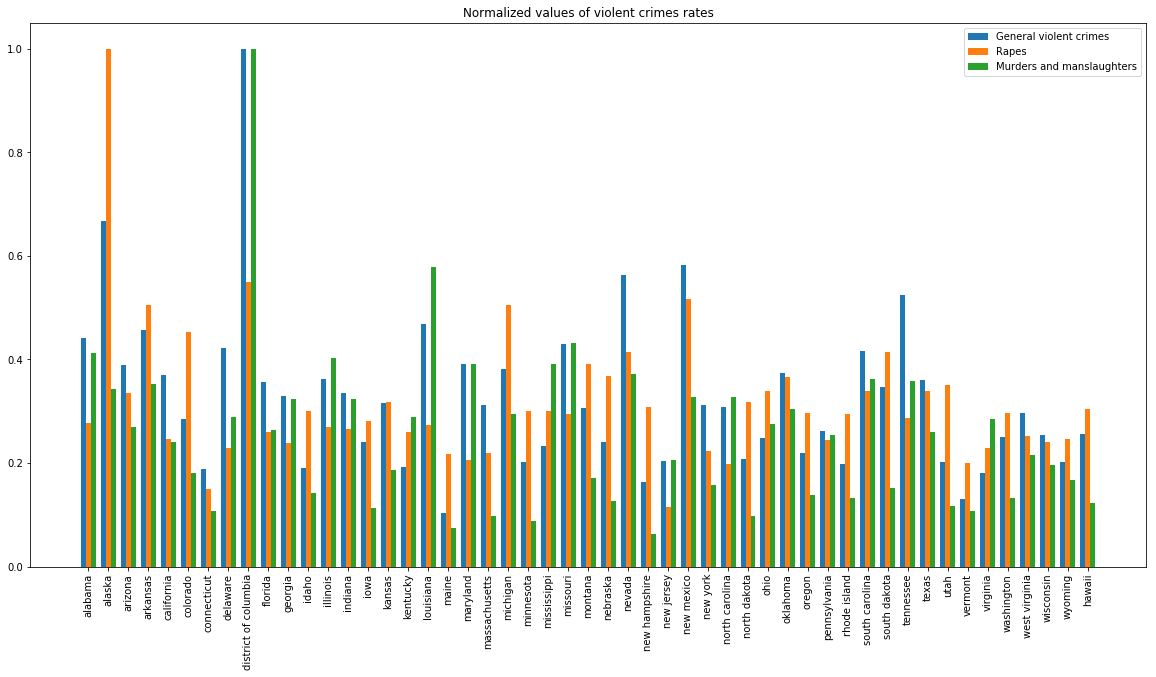

In [305]:
# We plot violent crimes
plt.figure(figsize=(20,10))
plt.title("Normalized values of violent crimes rates")
barWidth = 0.25
r1 = np.arange(len(df_education_final.State))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
plt.bar(r1, (df_security_final.Violent_Crime)/(df_security_final.Violent_Crime.max()), width=0.25) 
plt.bar(r2, (df_security_final.Rape)/(df_security_final.Rape.max()), width=0.25) 
plt.bar(r3, (df_security_final.Murder_and_Manslaughter)/(df_security_final.Murder_and_Manslaughter.max()), width=0.25)
plt.xticks([r + barWidth for r in range(len(df_education_final.State))], df_education_final.State, 
           rotation='vertical')
plt.gca().legend(('General violent crimes', 'Rapes', 'Murders and manslaughters'))
plt.show()

As previously seen, District of Columbia is the state the most affected by violent crimes, but we can notice a particularly high value of Alaska concerning rapes (and in general regarding violent crimes); some of the states previously listed as possible "criminal" states (like New Mexico or Texas) confirm to be between the worst, but with other unsuspected ones like Louisiana, Nevada, Tennessee.
Some states have instead very low rates of violent crimes, in particular Maine, Connecticut, Idaho.

Let's consider now some **property crimes** in general and going deeper, looking for example at robbery and theft rates.

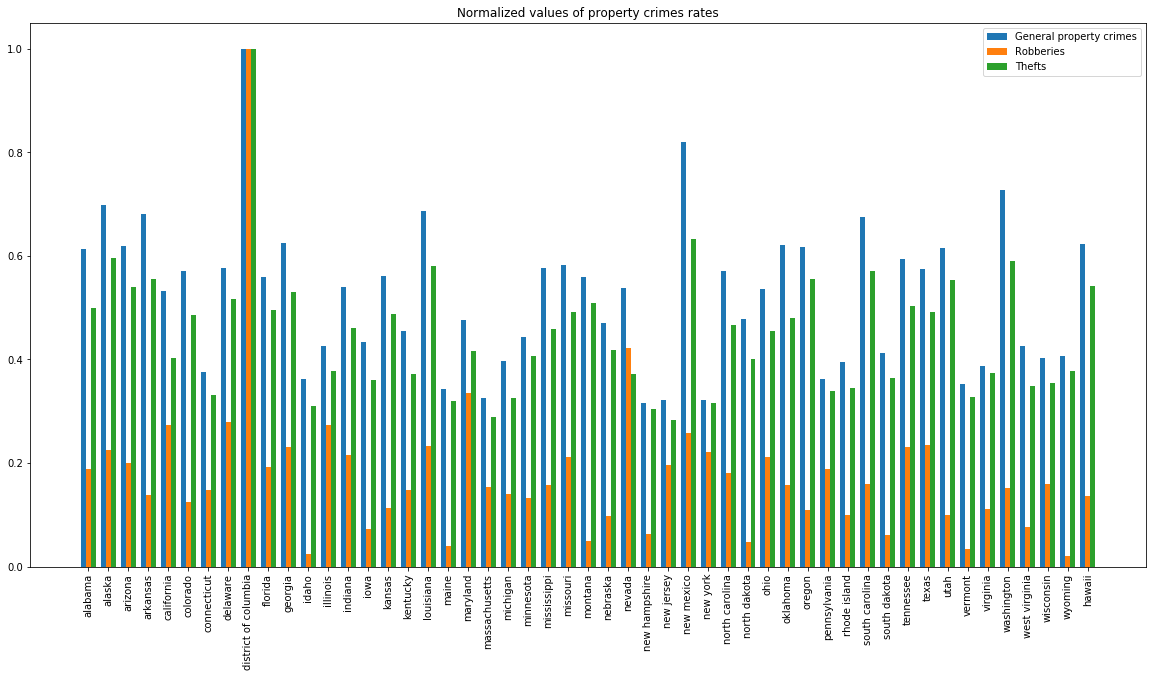

In [306]:
# We plot property crimes
plt.figure(figsize=(20,10))
plt.title("Normalized values of property crimes rates")
barWidth = 0.25
r1 = np.arange(len(df_education_final.State))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
plt.bar(r1, (df_security_final.Property_crime)/(df_security_final.Property_crime.max()), width=0.25) 
plt.bar(r2, (df_security_final.Robbery)/(df_security_final.Robbery.max()), width=0.25) 
plt.bar(r3, (df_security_final.Theft)/(df_security_final.Theft.max()), width=0.25)
plt.xticks([r + barWidth for r in range(len(df_education_final.State))], df_education_final.State, 
           rotation='vertical')
plt.gca().legend(('General property crimes', 'Robberies', 'Thefts'))
plt.show()

Once again, D.C., Alaska, New Mexico, but also Louisiana, Nevada, Washington, South Carolina or Hawaii have very bad rates of property crimes.
Idaho, Maine, but also North Dakota, South Dakota or Vermont have low rates of property crimes.

In general we can notice all property crimes follow a common pattern, with a couple of exceptions: the most evident one is **California**, that we had evaluated as one of the possible "criminal" states, and instead has in general very low rates about crimes, but with the exception of robberies, which rate is one of the highest in all US.

### Things we still need to do
- Implement a ML model on our normalized features to obtain a "security" score
- Once this score is calculated, generate a map showing the security score for each state

## Economy

In [307]:
# We create the "economy" DataFrame basing on the final DataFrame of milestone 2
df_economy = df[economy_list]
df_economy.head()

State  Population  Per_capita_income  mc_donalds_per_100k  \
0     alabama     4863300            38215.0                  5.0   
1      alaska      741894            54430.0                  4.2   
2     arizona     6931071            39955.0                  4.1   
3    arkansas     2988248            39171.0                  5.8   
4  california    39250017            54800.0                  3.3   

   Price_2018_Studio  Price_2018_1br  Price_2018_2br  Price_2018_3br  \
0         605.416667      659.000000      800.666667     1069.666667   
1         814.333333      930.500000     1190.333333     1682.166667   
2         701.000000      828.000000     1046.000000     1512.333333   
3         524.666667      571.166667      721.416667      977.583333   
4        1212.333333     1426.333333     1818.916667     2519.250000   

   Price_2018_4br  Overall Homeless, 2018  Elementary_School_Fee  \
0     1244.333333                    3434                   6388   
1     2019.500000                    2016                   7544   
2     1754.416667                    9865                   6283   
3     1144.833333                    2712                   4698   
4     2926.333333                  129972                  11363   

   High_School_Fee  
0             7718  
1             6118  
2            17339  
3             6680  
4            19317

In our **Economy** dataframe we have the following collected data:
- *Average disposable per-capita income (OECD)* in dollars, intended as the amount of money that households have available for spending and saving after income taxes have been accounted for. Disposable personal income is often monitored as one of the many key economic indicators used to gauge the overall state of the economy [8], as this value indicates the amount of money an average inhabitant of each state can use for his needs and desires. The reported values per each state refer to 2015.
We need to pay particular attention to this parameter, as we are considering the average value, but in general the distribution of disposable per-capita income is quite "right skewed", with many people attesting on a quite low value and just a few owning a very high purchasing power! It would be more useful, when describing a society, having the median of this value, but all governative and non-governative datasets for USA report the average value, so we will perform our analysis on this value.
- *Number of McDonalds shops per 100000 inhabitants* for each state: in general McDonalds in USA is cheaper than a normal restaurant, so at a theorical level we should notice a higher amount of McDos in states where the personal incomes will be lower.
- *Average rent for studios, 1-bedroom apartments, 2-bedroom apartments, 3-bedroom apartments, 4-bedroom apartments* in each state, referring to 2018: this parameter will be higher in wealthy states, as usually rents are higher in places where there is a big amount of economic activities (financial, industrial or tertiary). Thus, in general, higher prices will correspond to a general better economic situation of that state.
- *High school and Elementary school fees* that we had evaluated yet in the "Education" section: in this case, we can do the same reasoning made for rents; we need to remember that our reasoning in the "Education" section was exactly the opposite, as we wanted to consider a sort of ratio quality-price for education, while in this case we are evaluating the "absolute" wealth of each state.

In [308]:
df_economy.columns = ['State', 'Population', 'Per_capita_income', 'mc_donalds_per_100k',
       'Price_2018_Studio', 'Price_2018_1br', 'Price_2018_2br',
       'Price_2018_3br', 'Price_2018_4br', 'Overall_Homeless_2018',
       'Elementary_School_Fee', 'High_School_Fee']
df_economy.head()

State  Population  Per_capita_income  mc_donalds_per_100k  \
0     alabama     4863300            38215.0                  5.0   
1      alaska      741894            54430.0                  4.2   
2     arizona     6931071            39955.0                  4.1   
3    arkansas     2988248            39171.0                  5.8   
4  california    39250017            54800.0                  3.3   

   Price_2018_Studio  Price_2018_1br  Price_2018_2br  Price_2018_3br  \
0         605.416667      659.000000      800.666667     1069.666667   
1         814.333333      930.500000     1190.333333     1682.166667   
2         701.000000      828.000000     1046.000000     1512.333333   
3         524.666667      571.166667      721.416667      977.583333   
4        1212.333333     1426.333333     1818.916667     2519.250000   

   Price_2018_4br  Overall_Homeless_2018  Elementary_School_Fee  \
0     1244.333333                   3434                   6388   
1     2019.500000                   2016                   7544   
2     1754.416667                   9865                   6283   
3     1144.833333                   2712                   4698   
4     2926.333333                 129972                  11363   

   High_School_Fee  
0             7718  
1             6118  
2            17339  
3             6680  
4            19317

As in "security" section, we need to evaluate the number of homeless people without depending on the number of inhabitants. So we need to normalize our values, as done in the previous section, calculating the number of homeless people per 100000 inhabitants.

In [309]:
df_economy_norm = df_economy.drop(columns='Overall_Homeless_2018')
df_economy_norm['Homeless_per_100000'] = df_security_final.Homeless_per_100000
df_economy_norm.head()

State  Population  Per_capita_income  mc_donalds_per_100k  \
0     alabama     4863300            38215.0                  5.0   
1      alaska      741894            54430.0                  4.2   
2     arizona     6931071            39955.0                  4.1   
3    arkansas     2988248            39171.0                  5.8   
4  california    39250017            54800.0                  3.3   

   Price_2018_Studio  Price_2018_1br  Price_2018_2br  Price_2018_3br  \
0         605.416667      659.000000      800.666667     1069.666667   
1         814.333333      930.500000     1190.333333     1682.166667   
2         701.000000      828.000000     1046.000000     1512.333333   
3         524.666667      571.166667      721.416667      977.583333   
4        1212.333333     1426.333333     1818.916667     2519.250000   

   Price_2018_4br  Elementary_School_Fee  High_School_Fee  Homeless_per_100000  
0     1244.333333                   6388             7718            70.610491  
1     2019.500000                   7544             6118           271.736933  
2     1754.416667                   6283            17339           142.330096  
3     1144.833333                   4698             6680            90.755520  
4     2926.333333                  11363            19317           331.138710

Now in our economic dataframe we have all intensive data, so we don't need to normalize our features against the population. In spite of this, let's see if there are some correlations of our data with population!

In [310]:
pd.DataFrame(df_economy_norm.corr()['Population'])

Population
Population               1.000000
Per_capita_income        0.120498
mc_donalds_per_100k     -0.190457
Price_2018_Studio        0.323629
Price_2018_1br           0.351850
Price_2018_2br           0.360384
Price_2018_3br           0.355004
Price_2018_4br           0.342765
Elementary_School_Fee    0.150207
High_School_Fee          0.040986
Homeless_per_100000      0.050297

We can find a "slight" correlation between population and rents. We can explain it in such terms: in general, the most populated states are also the most urbanized ones, and rents tend to be higher in cities rather than in rural areas. 
In general, as expected, as all data are intensive, they have nearly no correlation with population, so we can drop our "population" column and continue to perform our analysis with our features.

In [311]:
df_economy_final = df_economy_norm.drop(columns='Population')
df_economy_final.head()

State  Per_capita_income  mc_donalds_per_100k  Price_2018_Studio  \
0     alabama            38215.0                  5.0         605.416667   
1      alaska            54430.0                  4.2         814.333333   
2     arizona            39955.0                  4.1         701.000000   
3    arkansas            39171.0                  5.8         524.666667   
4  california            54800.0                  3.3        1212.333333   

   Price_2018_1br  Price_2018_2br  Price_2018_3br  Price_2018_4br  \
0      659.000000      800.666667     1069.666667     1244.333333   
1      930.500000     1190.333333     1682.166667     2019.500000   
2      828.000000     1046.000000     1512.333333     1754.416667   
3      571.166667      721.416667      977.583333     1144.833333   
4     1426.333333     1818.916667     2519.250000     2926.333333   

   Elementary_School_Fee  High_School_Fee  Homeless_per_100000  
0                   6388             7718            70.610491  
1                   7544             6118           271.736933  
2                   6283            17339           142.330096  
3                   4698             6680            90.755520  
4                  11363            19317           331.138710

Now let's consider the relationship existing between McDos and income. As previously said, we can consider McDos as a "cheaper" alternative to restaurants, so we expect there are more McDonalds shops in states where disposable income is lower: let's see if this hypothesis is confirmed by data.

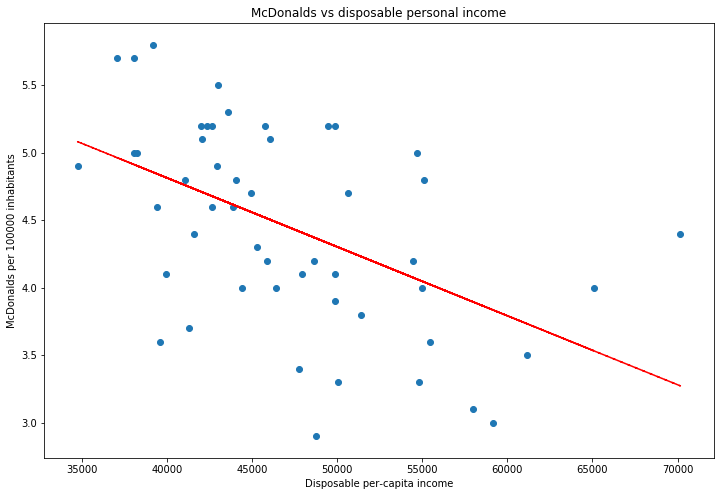

In [312]:
plt.figure(figsize=(12,8))
plt.title("McDonalds vs disposable personal income")
plt.xlabel("Disposable per-capita income")
plt.ylabel("McDonalds per 100000 inhabitants")
z = np.polyfit(df_economy_final.Per_capita_income, df_economy_final.mc_donalds_per_100k, 1)
p = np.poly1d(z)
plt.plot(df_economy_final.Per_capita_income,p(df_economy_final.Per_capita_income), "r--")
plt.scatter(df_economy_final.Per_capita_income, df_economy_final.mc_donalds_per_100k)

We can notice a slight negative correlation between the two features, but it is not as strong as we could expect. This indicates McDonalds is more part of a general American identity, and does not depend completely on the wealth of a state: **also rich people eat at McDo from time to time!**

Now we want to explore the variation in rents when referring to houses of different size.
It could seem a not-so-meaningful analysis, but let's explain why it could be interesting!
- Starting point is that we can have a confirmation of the fact that urbanized areas as D.C., New York or California have higher rents!
- Rents, as every other field of economy, rely on the relation demand-offer. Assuming the offer is more or less the same for every kind of accomodation, higher rents should mean an higher demand for the kind of apartment!
- Now, we would expect that the trends of rents in different states should be more or less the same for each size of apartment. Theorically, states in which studio rents are higher should have higher rents also for 3-bedroom apartments.
- But we could speculate that in rural areas the idea of "big family" is more diffused than in cities; and vice versa, in big cities young people could tend to live on their own in a studio, or with their fiancé(e) in a 1-bedroom apartment!
- Following this idea, if we normalize the rents, we should see a bigger difference between big-apartments rent and studios for more "traditional" states (as, for instance, Utah) and a smaller difference in more urbanized states (as D.C. or California).

Let's see if data confirm this idea!

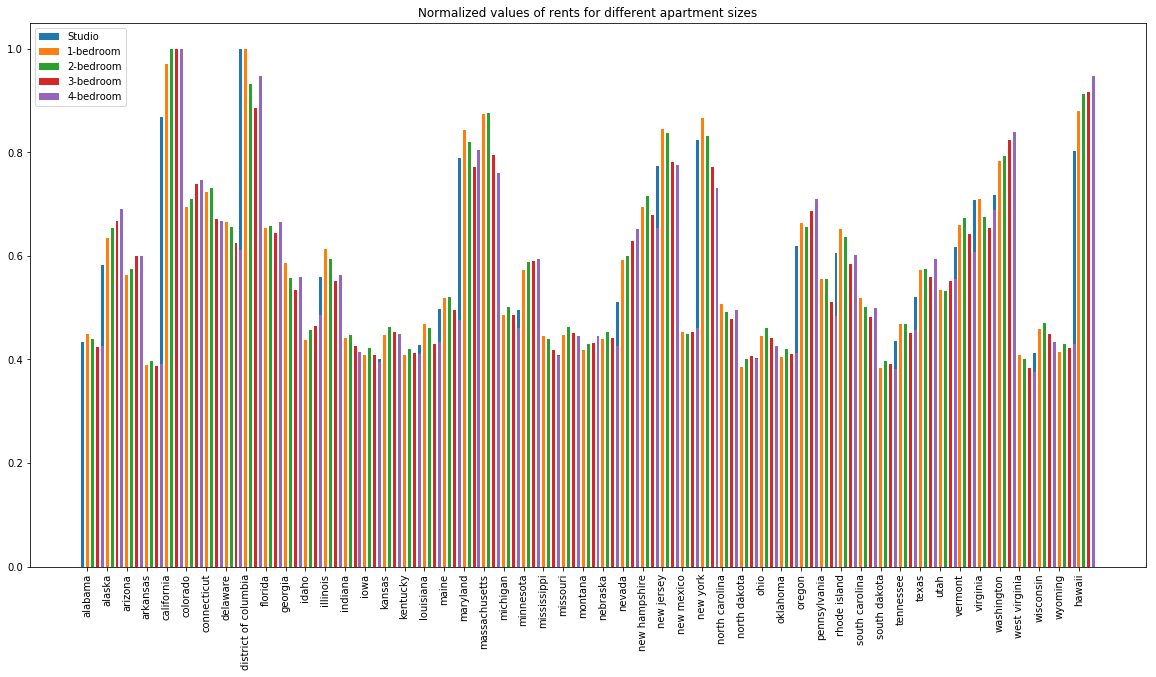

In [313]:
# We plot rents for different apartments
plt.figure(figsize=(20,10))
plt.title("Normalized values of rents for different apartment sizes")
barWidth = 0.25
r1 = np.arange(len(df_education_final.State))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
plt.bar(r1, (df_economy_final.Price_2018_Studio)/(df_economy_final.Price_2018_Studio.max()), width=0.15) 
plt.bar(r2, (df_economy_final.Price_2018_1br)/(df_economy_final.Price_2018_1br.max()), width=0.15) 
plt.bar(r3, (df_economy_final.Price_2018_2br)/(df_economy_final.Price_2018_2br.max()), width=0.15)
plt.bar(r4, (df_economy_final.Price_2018_3br)/(df_economy_final.Price_2018_3br.max()), width=0.15)
plt.bar(r5, (df_economy_final.Price_2018_4br)/(df_economy_final.Price_2018_4br.max()), width=0.15)
plt.xticks([r + barWidth for r in range(len(df_education_final.State))], df_education_final.State, 
           rotation='vertical')
plt.gca().legend(('Studio', '1-bedroom', '2-bedroom', '3-bedroom', '4-bedroom'))
plt.show()

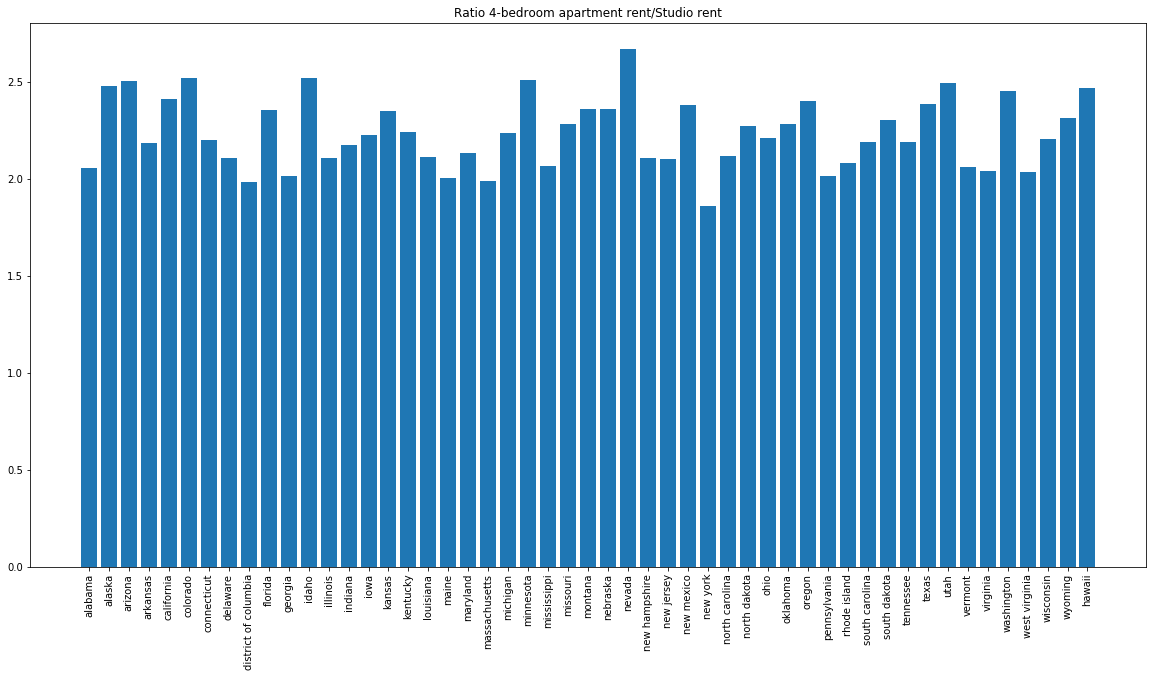

In [315]:
# We plot the ratio between 4-br rents and studio rents
plt.figure(figsize=(20,10))
plt.xticks(rotation='vertical')
plt.title("Ratio 4-bedroom apartment rent/Studio rent") 
plt.bar(df_economy_final.State, 
         (df_economy_final.Price_2018_4br)/(df_economy_final.Price_2018_Studio))
plt.show()

We can say that all our ideas have a confirmation!
- In general all rents are higher in states like D.C., California, New York, New Jersey and Massachussets, that not casually are the most urbanized ones. But there is an exception: **Hawaii**. This exception "confirms the rule" and is easily explainable considering the touristic attitude of these fantastic islands!
- And in general this trend is confirmed for all kinds of accomodation! But some slight differences exist...
- Let's look at the ratio between the average rent for 4-bedroom apartments and studios. Well, our expectations are respected! There is less difference between these parameters in more urbanized states (in particular New York, but also D.C. and Massachussets), and more difference in more rural states (as Nevada, Utah, Minnesota, Idaho... and California, we cannot predict everything! In fact, in California we have the highest rents for big apartments, while in D.C. small apartments are the most expensive)

Now let's see if we can notice a correlation between school fees and income, as previously speculated.

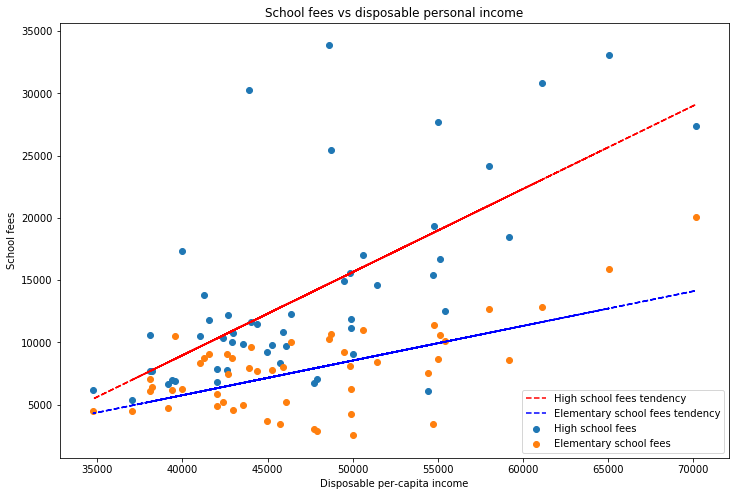

In [316]:
plt.figure(figsize=(12,8))
plt.title("School fees vs disposable personal income")
plt.xlabel("Disposable per-capita income")
plt.ylabel("School fees")
z = np.polyfit(df_economy_final.Per_capita_income, df_economy_final.High_School_Fee, 1)
p = np.poly1d(z)
plt.plot(df_economy_final.Per_capita_income,p(df_economy_final.Per_capita_income), "r--")
plt.scatter(df_economy_final.Per_capita_income, df_economy_final.High_School_Fee)
z = np.polyfit(df_economy_final.Per_capita_income, df_economy_final.Elementary_School_Fee, 1)
p = np.poly1d(z)
plt.plot(df_economy_final.Per_capita_income,p(df_economy_final.Per_capita_income), "b--")
plt.scatter(df_economy_final.Per_capita_income, df_economy_final.Elementary_School_Fee)
plt.gca().legend(('High school fees tendency', 'Elementary school fees tendency', 'High school fees', 
                  'Elementary school fees'))

We can notice a quite strong correlation between personal income and school fees. This indicates a quite "fair" education system, at least regarding the economic part! But as seen in the "Education" section, in general higher fees also correspond to a better educational level, so quality of schools in USA is strongly dependent on how much money are spent on the education of children, so not everybody has the same opportunities.

In [317]:
df_economy_final[['High_School_Fee','Elementary_School_Fee']].corr()

High_School_Fee  Elementary_School_Fee
High_School_Fee               1.000000               0.680079
Elementary_School_Fee         0.680079               1.000000

In [318]:
df_economy_final[['Price_2018_Studio', 'Price_2018_1br', 'Price_2018_2br',
                  'Price_2018_3br', 'Price_2018_4br']].corr()

Price_2018_Studio  Price_2018_1br  Price_2018_2br  \
Price_2018_Studio           1.000000        0.991603        0.976502   
Price_2018_1br              0.991603        1.000000        0.994290   
Price_2018_2br              0.976502        0.994290        1.000000   
Price_2018_3br              0.952433        0.975328        0.987982   
Price_2018_4br              0.948719        0.966230        0.974278   

                   Price_2018_3br  Price_2018_4br  
Price_2018_Studio        0.952433        0.948719  
Price_2018_1br           0.975328        0.966230  
Price_2018_2br           0.987982        0.974278  
Price_2018_3br           1.000000        0.992651  
Price_2018_4br           0.992651        1.000000

To conclude our analysis, let's compare the trends for income, number of McDos, rents and fees per state. We should notice a common trend for income, rents and fees, and a specular one for McDonald shops.
For clarity, we will use just 1-bedroom rents and High School Fees: our omissions are not that meaningful, as rents are all strongly correlated each other, and so are fees in High and Elementary schools.

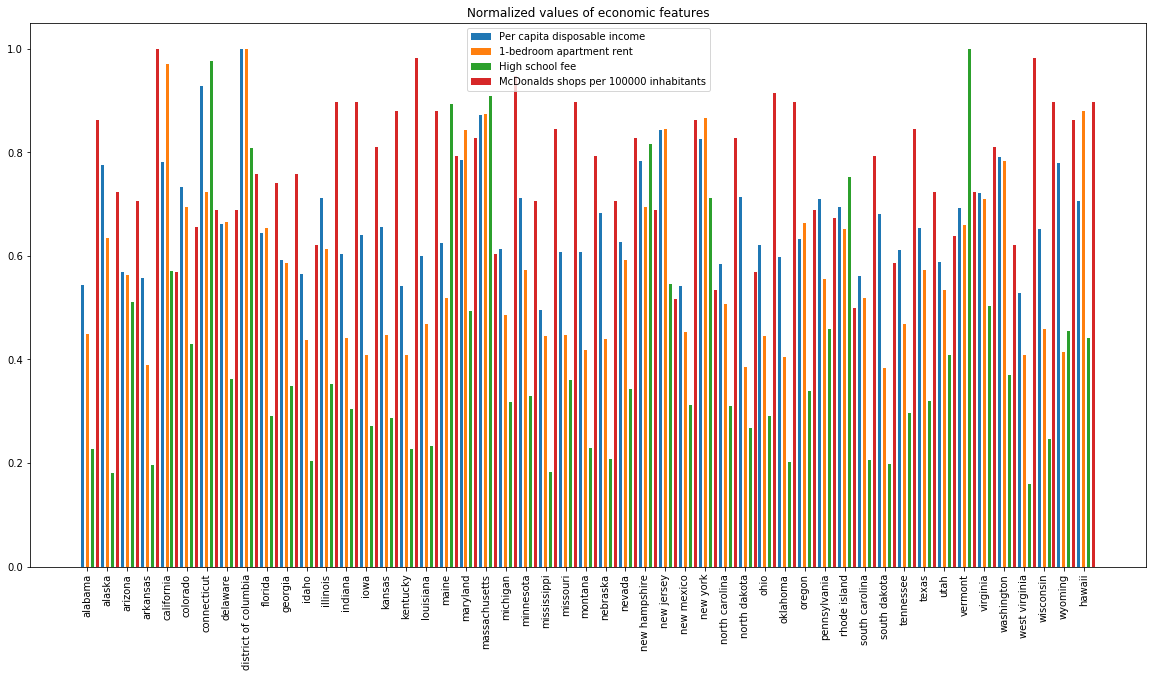

In [319]:
# We plot our economic features
plt.figure(figsize=(20,10))
plt.title("Normalized values of economic features")
barWidth = 0.25
r1 = np.arange(len(df_education_final.State))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
plt.bar(r1, (df_economy_final.Per_capita_income)/(df_economy_final.Per_capita_income.max()), width=0.15) 
plt.bar(r2, (df_economy_final.Price_2018_1br)/(df_economy_final.Price_2018_1br.max()), width=0.15) 
plt.bar(r3, (df_economy_final.High_School_Fee)/(df_economy_final.High_School_Fee.max()), width=0.15)
plt.bar(r4, (df_economy_final.mc_donalds_per_100k)/(df_economy_final.mc_donalds_per_100k.max()), width=0.15)
plt.xticks([r + barWidth for r in range(len(df_education_final.State))], df_education_final.State, 
           rotation='vertical')
plt.gca().legend(('Per capita disposable income', '1-bedroom apartment rent', 'High school fee',
                  'McDonalds shops per 100000 inhabitants'))
plt.show()

Even with some exceptions, these trends are respected! We expect good results in the economic score from District of Columbia, Massachussets, California, but also Connecticut or Vermont, and bad results from Arkansas, Mississippi or New Mexico!

### Things we still need to do
- Implement a ML model on our normalized features to obtain a "economy" score
- Once this score is calculated, generate a map showing the economy score for each state

## Are economy and security related?

As said whan talking about Homeless people, poverty is one of the main motivations that can push to criminality. The necessity for survival could bring to commit crimes.
This is not a way of justifying criminality, but let's see if we can assume this relation as true!

We evaluate the relationship between personal income and property crime rates, in order to analyse this correlation.

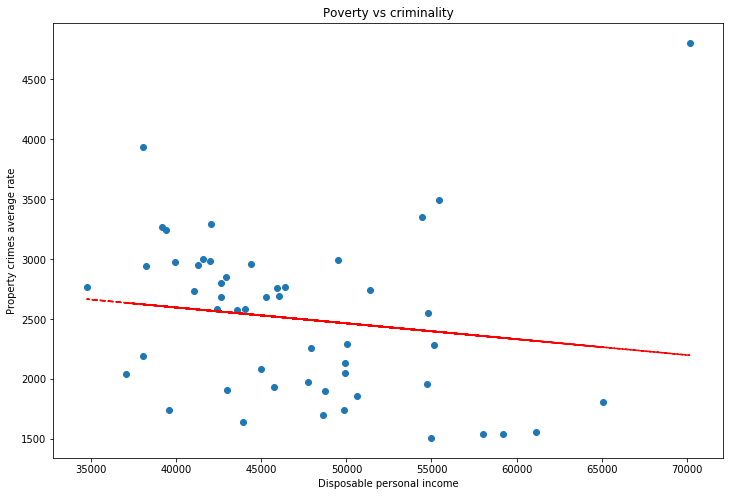

In [320]:
plt.figure(figsize=(12,8))
plt.title("Poverty vs criminality")
plt.xlabel("Disposable personal income")
plt.ylabel("Property crimes average rate")
z = np.polyfit(df_economy_final.Per_capita_income, df_security_final.Property_crime, 1)
p = np.poly1d(z)
plt.plot(df_economy_final.Per_capita_income,p(df_economy_final.Per_capita_income), "r--")
plt.scatter(df_economy_final.Per_capita_income, df_security_final.Property_crime)

The correlation is not as strong as expected! 

##### Inventiamo qualcosa per la datastory o balziamo il paragrafo

#### References

- [1] https://en.wikipedia.org/wiki/Human_Development_Index
- [2] https://en.wikipedia.org/wiki/Obesity
- [3] https://en.wikipedia.org/wiki/Utah
- [4] https://en.wikipedia.org/wiki/Word_of_Wisdom
- [5] https://en.wikipedia.org/wiki/Crime_in_the_United_States
- [6] https://link.springer.com/referenceworkentry/10.1007%2F1-4020-3266-8_61
- [7] https://en.wikipedia.org/wiki/Crime_in_Norway
- [8] https://www.investopedia.com/terms/d/disposableincome.asp